In [1]:
%load_ext autoreload
%autoreload 2

import gurobipy as gp
import networkx as nx
import numpy as np
from fairness import *

In [2]:
nV = 10
Adj = np.zeros((nV,nV), dtype=int)
for i in range(nV-1):
    Adj[i,i+1] = 1
    Adj[i+1,i] = 1
Adj[0,nV-1] = 1
Adj[nV-1,0] = 1
Adj[2,7]=1
Adj[7,2]=1
# Adj[2,9]=1
# Adj[9,2]=1
        

In [7]:
Adj2= Adj

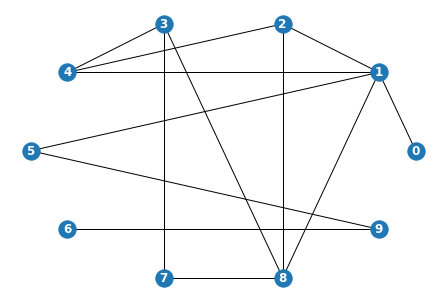

In [8]:
# Adj = makeGraph(nV,0.4)

# nV = 4
# Adj = np.array([[0,0,0,1],[0,0,0,1],[0,0,0,1],[1,1,1,0]],dtype=int)
f=1.0/4*Adj
drawGraph(Adj)

In [9]:
# f=2/3*Adj
M = getGurobiBasicModel_Diff(Adj,f)
M.optimize()
M2 = getMinimalGurobi(M, Adj)
M2.optimize()

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
Optimize a model with 11 rows, 22 columns and 56 nonzeros
Model fingerprint: 0x70325680
Model has 2 general constraints
Variable types: 12 continuous, 10 integer (0 binary)
Coefficient statistics:
  Matrix range     [2e-01, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve added 20 rows and 0 columns
Presolve time: 0.00s
Presolved: 31 rows, 22 columns, 96 nonzeros
Variable types: 0 continuous, 22 integer (0 binary)

Root relaxation: objective 0.000000e+00, 25 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00000    0   10          -    0.00000      -     -    0s
H    0     0                       2.2500000    0.00000   100%     -    0s
H    0     0                       0.7500000    0.00000   100%     -    0s
     0   

In [50]:

# N = getGurobiBasicModel_L1(Adj,f)
# N.optimize()
# N2 = getMinimalGurobi(N, Adj)
# N2.optimize()

In [10]:
# drawGraph(Adj)
print("With Diff Metric")
var = M2.getVars()
for x in var:
    if("x" in x.Varname):
        print(x.VarName, "-----", round(x.X,2))
print("Total rounds: ",round(M2.objval))
TotalWelfare = sum([M2.getVarByName("tau["+str(v)+"]").X for v in range(nV)])
print("Total Welfare in fair solution: ", TotalWelfare)
print("Total Unfairness in fair solution: ", M.objval)
utilPerV = TotalWelfare/round(M2.objval)
print("Utility per vehicle: ", utilPerV)
print("Average adjacency of placement: ", (utilPerV-1)/np.average(f,weights = Adj))

# print("With L1 Metric")
# var = N2.getVars()
# for x in var:
#     if("x" in x.Varname):
#         print(x.VarName, "-----", round(x.X,2))
# print("Total rounds: ",round(N2.objval))
# TotalWelfare = sum([N2.getVarByName("tau["+str(v)+"]").X for v in range(nV)])
# print("Total Welfare in fair solution: ", TotalWelfare)


With Diff Metric
x[0] ----- 13455.0
x[1] ----- 1136.0
x[2] ----- 9445.0
x[3] ----- 7163.0
x[4] ----- 9303.0
x[5] ----- 11472.0
x[6] ----- 11756.0
x[7] ----- 10264.0
x[8] ----- 6737.0
x[9] ----- 7932.0
Total rounds:  88663
Total Welfare in fair solution:  137389.99999999997
Total Unfairness in fair solution:  0.0
Utility per vehicle:  1.5495753583794816
Average adjacency of placement:  2.1983014335179263


In [11]:
k = 3
A, F = greedDiff(nV, Adj, f, M2, k, True, True)
nRounds = int(np.ceil(round(M2.objval)/k))

Round: 0 of 29555 : [1, 3, 9] fairness:  0.75
Round: 1 of 29555 : [0, 6, 7] fairness:  1.0
Round: 2 of 29555 : [2, 4, 5] fairness:  1.0
Round: 3 of 29555 : [0, 6, 7] fairness:  1.0
Round: 4 of 29555 : [2, 3, 5] fairness:  1.0
Round: 5 of 29555 : [4, 8, 9] fairness:  1.0
Round: 6 of 29555 : [0, 5, 6] fairness:  1.0
Round: 7 of 29555 : [4, 7, 8] fairness:  1.0
Round: 8 of 29555 : [0, 2, 9] fairness:  1.0
Round: 9 of 29555 : [5, 6, 7] fairness:  0.75
Round: 10 of 29555 : [0, 2, 3] fairness:  0.75
Round: 11 of 29555 : [3, 5, 6] fairness:  1.0
Round: 12 of 29555 : [0, 2, 7] fairness:  1.0
Round: 13 of 29555 : [4, 8, 9] fairness:  1.0
Round: 14 of 29555 : [0, 5, 6] fairness:  0.75
Round: 15 of 29555 : [4, 6, 7] fairness:  1.0
Round: 16 of 29555 : [0, 8, 9] fairness:  0.75
Round: 17 of 29555 : [2, 3, 5] fairness:  0.75
Round: 18 of 29555 : [0, 4, 6] fairness:  1.0
Round: 19 of 29555 : [5, 7, 8] fairness:  0.75
Round: 20 of 29555 : [2, 4, 9] fairness:  1.0
Round: 21 of 29555 : [0, 6, 7] fairne

Round: 181 of 29555 : [0, 5, 8] fairness:  0.75
Round: 182 of 29555 : [4, 6, 7] fairness:  0.75
Round: 183 of 29555 : [0, 2, 5] fairness:  1.0
Round: 184 of 29555 : [3, 6, 9] fairness:  0.75
Round: 185 of 29555 : [0, 4, 7] fairness:  0.75
Round: 186 of 29555 : [2, 5, 8] fairness:  0.75
Round: 187 of 29555 : [0, 3, 6] fairness:  0.75
Round: 188 of 29555 : [2, 7, 9] fairness:  0.75
Round: 189 of 29555 : [4, 5, 6] fairness:  1.0
Round: 190 of 29555 : [0, 1, 7] fairness:  0.75
Round: 191 of 29555 : [3, 8, 9] fairness:  0.75
Round: 192 of 29555 : [0, 5, 6] fairness:  1.0
Round: 193 of 29555 : [2, 4, 7] fairness:  0.75
Round: 194 of 29555 : [0, 5, 6] fairness:  0.75
Round: 195 of 29555 : [2, 3, 9] fairness:  0.75
Round: 196 of 29555 : [0, 4, 8] fairness:  0.75
Round: 197 of 29555 : [5, 6, 7] fairness:  0.5
Round: 198 of 29555 : [2, 4, 9] fairness:  1.0
Round: 199 of 29555 : [0, 6, 7] fairness:  1.0
Round: 200 of 29555 : [3, 5, 8] fairness:  0.75
Round: 201 of 29555 : [0, 4, 5] fairness:  1.0

Round: 356 of 29555 : [1, 3, 9] fairness:  1.0
Round: 357 of 29555 : [0, 7, 9] fairness:  1.0
Round: 358 of 29555 : [2, 3, 5] fairness:  1.25
Round: 359 of 29555 : [0, 4, 6] fairness:  1.25
Round: 360 of 29555 : [5, 6, 8] fairness:  1.0
Round: 361 of 29555 : [2, 3, 9] fairness:  1.25
Round: 362 of 29555 : [0, 2, 7] fairness:  1.25
Round: 363 of 29555 : [4, 5, 6] fairness:  1.0
Round: 364 of 29555 : [0, 7, 8] fairness:  1.0
Round: 365 of 29555 : [4, 5, 9] fairness:  1.0
Round: 366 of 29555 : [0, 6, 7] fairness:  0.75
Round: 367 of 29555 : [2, 3, 5] fairness:  0.75
Round: 368 of 29555 : [0, 2, 6] fairness:  1.25
Round: 369 of 29555 : [4, 5, 7] fairness:  1.25
Round: 370 of 29555 : [0, 8, 9] fairness:  1.0
Round: 371 of 29555 : [4, 6, 8] fairness:  0.75
Round: 372 of 29555 : [0, 5, 7] fairness:  1.0
Round: 373 of 29555 : [3, 4, 6] fairness:  0.75
Round: 374 of 29555 : [0, 2, 9] fairness:  0.75
Round: 375 of 29555 : [5, 6, 7] fairness:  1.0
Round: 376 of 29555 : [0, 4, 8] fairness:  0.75
R

Round: 526 of 29555 : [3, 5, 6] fairness:  0.75
Round: 527 of 29555 : [2, 8, 9] fairness:  1.0
Round: 528 of 29555 : [0, 4, 7] fairness:  0.7500000000001421
Round: 529 of 29555 : [0, 5, 6] fairness:  1.0
Round: 530 of 29555 : [2, 3, 9] fairness:  0.7499999999999432
Round: 531 of 29555 : [1, 6, 7] fairness:  0.7499999999998579
Round: 532 of 29555 : [0, 2, 5] fairness:  1.0
Round: 533 of 29555 : [3, 4, 9] fairness:  0.9999999999999432
Round: 534 of 29555 : [6, 7, 8] fairness:  0.75
Round: 535 of 29555 : [0, 4, 5] fairness:  0.5000000000001421
Round: 536 of 29555 : [2, 6, 7] fairness:  0.75
Round: 537 of 29555 : [0, 3, 5] fairness:  0.7500000000000568
Round: 538 of 29555 : [4, 8, 9] fairness:  0.7500000000001421
Round: 539 of 29555 : [0, 5, 6] fairness:  1.0
Round: 540 of 29555 : [2, 6, 7] fairness:  0.9999999999998579
Round: 541 of 29555 : [0, 4, 8] fairness:  0.7499999999999147
Round: 542 of 29555 : [5, 7, 9] fairness:  0.75
Round: 543 of 29555 : [0, 2, 3] fairness:  0.7499999997197051


Round: 669 of 29555 : [4, 7, 9] fairness:  0.9999974601182089
Round: 670 of 29555 : [2, 6, 8] fairness:  0.9999981609983024
Round: 671 of 29555 : [0, 4, 5] fairness:  0.9999985009227998
Round: 672 of 29555 : [6, 7, 9] fairness:  0.7500015000161397
Round: 673 of 29555 : [0, 5, 8] fairness:  0.7500032317017826
Round: 674 of 29555 : [2, 3, 6] fairness:  0.7500036123707332
Round: 675 of 29555 : [0, 4, 7] fairness:  0.7499992205611647
Round: 676 of 29555 : [2, 5, 9] fairness:  0.7500004660111586
Round: 677 of 29555 : [0, 3, 6] fairness:  0.7499975477369389
Round: 678 of 29555 : [4, 5, 7] fairness:  0.9999949472763205
Round: 679 of 29555 : [0, 8, 9] fairness:  0.7500007216966083
Round: 680 of 29555 : [2, 6, 7] fairness:  0.7500021614715138
Round: 681 of 29555 : [1, 3, 5] fairness:  0.7500002507766226
Round: 682 of 29555 : [0, 4, 6] fairness:  0.9999977070998511
Round: 683 of 29555 : [2, 7, 9] fairness:  0.7499985389415542
Round: 684 of 29555 : [0, 5, 8] fairness:  1.0000002507766226
Round: 6

Round: 808 of 29555 : [4, 5, 6] fairness:  0.9999979869524509
Round: 809 of 29555 : [2, 3, 9] fairness:  0.9999979869524509
Round: 810 of 29555 : [0, 5, 7] fairness:  0.9999971376554413
Round: 811 of 29555 : [4, 6, 8] fairness:  0.9999979869523941
Round: 812 of 29555 : [0, 2, 9] fairness:  0.9999918489662605
Round: 813 of 29555 : [5, 6, 7] fairness:  0.9999979869524509
Round: 814 of 29555 : [0, 2, 3] fairness:  0.7499793122888718
Round: 815 of 29555 : [4, 8, 9] fairness:  0.9999979869524509
Round: 816 of 29555 : [0, 5, 7] fairness:  1.2499951246078922
Round: 817 of 29555 : [2, 3, 6] fairness:  0.7500005836347441
Round: 818 of 29555 : [0, 5, 6] fairness:  0.7500000374976707
Round: 819 of 29555 : [4, 7, 8] fairness:  0.5000302926974314
Round: 820 of 29555 : [0, 5, 6] fairness:  0.7499989460618508
Round: 821 of 29555 : [2, 3, 9] fairness:  0.7500030040193337
Round: 822 of 29555 : [0, 4, 7] fairness:  0.7500021588009531
Round: 823 of 29555 : [5, 6, 8] fairness:  0.5000270799430382
Round: 8

Round: 941 of 29555 : [0, 3, 6] fairness:  0.7499854974696518
Round: 942 of 29555 : [2, 5, 7] fairness:  0.7499995344451236
Round: 943 of 29555 : [4, 8, 9] fairness:  1.0000066102967367
Round: 944 of 29555 : [0, 5, 6] fairness:  0.7500183792412827
Round: 945 of 29555 : [0, 4, 7] fairness:  0.9999774515044351
Round: 946 of 29555 : [2, 3, 6] fairness:  0.7499921077662748
Round: 947 of 29555 : [5, 8, 9] fairness:  0.9999827935367307
Round: 948 of 29555 : [0, 4, 7] fairness:  0.7500142027998891
Round: 949 of 29555 : [2, 5, 6] fairness:  0.750006610296623
Round: 950 of 29555 : [0, 3, 8] fairness:  0.7500397549588342
Round: 951 of 29555 : [6, 7, 9] fairness:  0.9999890474375661
Round: 952 of 29555 : [0, 4, 5] fairness:  0.7500048013620244
Round: 953 of 29555 : [2, 6, 7] fairness:  0.7499961232891792
Round: 954 of 29555 : [0, 3, 5] fairness:  0.7500126935957496
Round: 955 of 29555 : [4, 8, 9] fairness:  0.7499981910656288
Round: 956 of 29555 : [0, 2, 6] fairness:  0.7499962842074979
Round: 95

Round: 1079 of 29555 : [4, 6, 8] fairness:  0.9999915030254556
Round: 1080 of 29555 : [0, 5, 8] fairness:  0.7500261990884951
Round: 1081 of 29555 : [4, 7, 9] fairness:  0.9999818890674987
Round: 1082 of 29555 : [0, 2, 6] fairness:  0.7500057058287553
Round: 1083 of 29555 : [3, 5, 7] fairness:  0.9999952188139787
Round: 1084 of 29555 : [0, 2, 6] fairness:  0.7499855577610788
Round: 1085 of 29555 : [4, 8, 9] fairness:  0.7500214179067939
Round: 1086 of 29555 : [0, 5, 7] fairness:  0.7500037157870452
Round: 1087 of 29555 : [2, 3, 6] fairness:  0.5000214179067939
Round: 1088 of 29555 : [0, 4, 5] fairness:  0.5000317089937312
Round: 1089 of 29555 : [6, 7, 9] fairness:  0.9999915030269335
Round: 1090 of 29555 : [0, 2, 3] fairness:  0.749986401939509
Round: 1091 of 29555 : [4, 5, 8] fairness:  0.7500144422389212
Round: 1092 of 29555 : [0, 6, 7] fairness:  0.7500181109339792
Round: 1093 of 29555 : [2, 5, 9] fairness:  0.750013598060491
Round: 1094 of 29555 : [1, 3, 6] fairness:  0.75001048701

Round: 1213 of 29555 : [0, 6, 7] fairness:  0.9999884127822725
Round: 1214 of 29555 : [3, 5, 8] fairness:  0.7500200879167096
Round: 1215 of 29555 : [0, 2, 6] fairness:  0.9999960687146086
Round: 1216 of 29555 : [4, 7, 9] fairness:  0.4999740485561688
Round: 1217 of 29555 : [1, 3, 9] fairness:  0.9999844625218657
Round: 1218 of 29555 : [2, 6, 7] fairness:  1.2499844625218657
Round: 1219 of 29555 : [0, 3, 5] fairness:  1.2499888126817496
Round: 1220 of 29555 : [0, 2, 6] fairness:  0.9999984152187835
Round: 1221 of 29555 : [4, 5, 8] fairness:  1.0000209417382848
Round: 1222 of 29555 : [0, 7, 9] fairness:  0.9999984152187835
Round: 1223 of 29555 : [4, 6, 8] fairness:  1.249985707349424
Round: 1224 of 29555 : [2, 5, 7] fairness:  0.9999999999998863
Round: 1225 of 29555 : [0, 3, 9] fairness:  0.9999903974628523
Round: 1226 of 29555 : [4, 5, 6] fairness:  0.9999844625218657
Round: 1227 of 29555 : [0, 2, 7] fairness:  0.750004230930017
Round: 1228 of 29555 : [5, 6, 8] fairness:  1.00000264614

Round: 1346 of 29555 : [5, 6, 7] fairness:  0.9999911287791292
Round: 1347 of 29555 : [0, 2, 3] fairness:  0.49999945447245864
Round: 1348 of 29555 : [4, 6, 7] fairness:  0.9999783139136298
Round: 1349 of 29555 : [0, 5, 8] fairness:  0.749999500408876
Round: 1350 of 29555 : [2, 3, 9] fairness:  0.7500074589594306
Round: 1351 of 29555 : [1, 6, 7] fairness:  0.9999767057503277
Round: 1352 of 29555 : [0, 4, 5] fairness:  1.0000081014264879
Round: 1353 of 29555 : [6, 8, 9] fairness:  0.9999994553934357
Round: 1354 of 29555 : [0, 2, 3] fairness:  1.2499767057497593
Round: 1355 of 29555 : [4, 5, 7] fairness:  1.0000081014266016
Round: 1356 of 29555 : [0, 2, 6] fairness:  1.2499767057503277
Round: 1357 of 29555 : [5, 7, 9] fairness:  0.7500084590785718
Round: 1358 of 29555 : [0, 3, 6] fairness:  0.999999276069957
Round: 1359 of 29555 : [4, 5, 8] fairness:  0.9999994553935494
Round: 1360 of 29555 : [2, 6, 7] fairness:  1.0000010815820133
Round: 1361 of 29555 : [0, 4, 9] fairness:  0.7499706891

Round: 1484 of 29555 : [2, 6, 7] fairness:  0.7500000981486892
Round: 1485 of 29555 : [1, 3, 5] fairness:  0.7500414698995428
Round: 1486 of 29555 : [0, 2, 6] fairness:  1.0000030700891784
Round: 1487 of 29555 : [4, 7, 8] fairness:  1.000005453770882
Round: 1488 of 29555 : [0, 5, 9] fairness:  1.0000043870646778
Round: 1489 of 29555 : [4, 6, 7] fairness:  0.7499874893385368
Round: 1490 of 29555 : [0, 2, 3] fairness:  0.9999858622251168
Round: 1491 of 29555 : [5, 8, 9] fairness:  0.7499989332940231
Round: 1492 of 29555 : [0, 4, 6] fairness:  0.9999848018785542
Round: 1493 of 29555 : [2, 5, 7] fairness:  0.7500029719403756
Round: 1494 of 29555 : [0, 3, 6] fairness:  0.9999573055478095
Round: 1495 of 29555 : [4, 8, 9] fairness:  0.7499971483337049
Round: 1496 of 29555 : [0, 5, 7] fairness:  0.9999893032467071
Round: 1497 of 29555 : [4, 6, 8] fairness:  0.7500290257584084
Round: 1498 of 29555 : [2, 5, 7] fairness:  0.7500426944521905
Round: 1499 of 29555 : [0, 6, 9] fairness:  0.9999821997

Round: 1619 of 29555 : [2, 4, 7] fairness:  0.9999902445013049
Round: 1620 of 29555 : [0, 5, 6] fairness:  0.7499815360091588
Round: 1621 of 29555 : [2, 3, 9] fairness:  0.7499993846365669
Round: 1622 of 29555 : [0, 5, 7] fairness:  0.7500258532749058
Round: 1623 of 29555 : [4, 6, 8] fairness:  0.5000057956639239
Round: 1624 of 29555 : [0, 2, 9] fairness:  0.9999850509242378
Round: 1625 of 29555 : [4, 5, 7] fairness:  1.0000010256269434
Round: 1626 of 29555 : [0, 6, 8] fairness:  0.7499963340507065
Round: 1627 of 29555 : [3, 5, 6] fairness:  0.75
Round: 1628 of 29555 : [2, 4, 7] fairness:  0.9999983590098509
Round: 1629 of 29555 : [0, 5, 6] fairness:  0.9999744685769656
Round: 1630 of 29555 : [4, 8, 9] fairness:  0.9999983590092825
Round: 1631 of 29555 : [0, 2, 7] fairness:  0.9999957186872734
Round: 1632 of 29555 : [3, 5, 6] fairness:  0.7499983590098509
Round: 1633 of 29555 : [0, 7, 9] fairness:  0.7500159747024782
Round: 1634 of 29555 : [4, 5, 8] fairness:  0.7500248276484172
Round:

Round: 1757 of 29555 : [2, 7, 8] fairness:  0.7500319067559076
Round: 1758 of 29555 : [0, 4, 9] fairness:  0.9999681393338733
Round: 1759 of 29555 : [3, 5, 6] fairness:  0.9999872892481108
Round: 1760 of 29555 : [0, 2, 7] fairness:  0.7499845635149995
Round: 1761 of 29555 : [4, 5, 6] fairness:  0.9999769905715539
Round: 1762 of 29555 : [0, 2, 3] fairness:  0.9999787329570609
Round: 1763 of 29555 : [5, 6, 8] fairness:  0.7500154365076241
Round: 1764 of 29555 : [0, 7, 9] fairness:  0.9999911026714017
Round: 1765 of 29555 : [2, 4, 7] fairness:  0.9999845635149995
Round: 1766 of 29555 : [5, 6, 8] fairness:  0.7500319067554528
Round: 1767 of 29555 : [0, 4, 9] fairness:  0.7499968389374772
Round: 1768 of 29555 : [3, 5, 6] fairness:  0.7500297896045822
Round: 1769 of 29555 : [0, 2, 7] fairness:  0.4999824463641289
Round: 1770 of 29555 : [1, 3, 9] fairness:  0.7499837439613657
Round: 1771 of 29555 : [0, 2, 6] fairness:  0.9999961021965191
Round: 1772 of 29555 : [4, 5, 7] fairness:  1.249980704

Round: 1896 of 29555 : [0, 3, 6] fairness:  0.7500137198315997
Round: 1897 of 29555 : [4, 5, 8] fairness:  0.7500075084026321
Round: 1898 of 29555 : [0, 2, 9] fairness:  0.9999984656591323
Round: 1899 of 29555 : [3, 6, 7] fairness:  0.9999851707317475
Round: 1900 of 29555 : [0, 2, 5] fairness:  0.7500000437038352
Round: 1901 of 29555 : [4, 7, 9] fairness:  0.7499774011024556
Round: 1902 of 29555 : [5, 6, 8] fairness:  0.7500146496372508
Round: 1903 of 29555 : [0, 2, 3] fairness:  0.7499806503591344
Round: 1904 of 29555 : [1, 6, 7] fairness:  0.7499978040416408
Round: 1905 of 29555 : [0, 4, 9] fairness:  0.9999831107005548
Round: 1906 of 29555 : [5, 6, 8] fairness:  0.7500251591154665
Round: 1907 of 29555 : [0, 4, 7] fairness:  0.9999831107005548
Round: 1908 of 29555 : [2, 3, 9] fairness:  0.9999831107004411
Round: 1909 of 29555 : [0, 5, 6] fairness:  0.9999895817929882
Round: 1910 of 29555 : [2, 5, 7] fairness:  0.7500124723744648
Round: 1911 of 29555 : [4, 6, 8] fairness:  0.750033999

Round: 2034 of 29555 : [4, 8, 9] fairness:  0.9999831106189276
Round: 2035 of 29555 : [0, 5, 6] fairness:  0.9999922373624486
Round: 2036 of 29555 : [2, 3, 7] fairness:  0.9999847434895628
Round: 2037 of 29555 : [0, 5, 6] fairness:  0.7500187373227618
Round: 2038 of 29555 : [4, 8, 9] fairness:  0.9999747729044657
Round: 2039 of 29555 : [0, 2, 7] fairness:  0.9999856524430015
Round: 2040 of 29555 : [3, 5, 6] fairness:  0.5000187373227618
Round: 2041 of 29555 : [0, 2, 4] fairness:  1.0000000000001137
Round: 2042 of 29555 : [5, 6, 7] fairness:  0.7499894460678433
Round: 2043 of 29555 : [4, 8, 9] fairness:  0.9999990910455381
Round: 2044 of 29555 : [0, 3, 5] fairness:  0.749998367196099
Round: 2045 of 29555 : [2, 6, 7] fairness:  0.7499990910465613
Round: 2046 of 29555 : [0, 8, 9] fairness:  0.7500292912549185
Round: 2047 of 29555 : [4, 5, 6] fairness:  0.7500187373228755
Round: 2048 of 29555 : [0, 2, 7] fairness:  0.7500016328037873
Round: 2049 of 29555 : [3, 5, 6] fairness:  0.7500187373

Round: 2173 of 29555 : [0, 2, 5] fairness:  0.9999888682809797
Round: 2174 of 29555 : [4, 6, 8] fairness:  0.7500038725893319
Round: 2175 of 29555 : [0, 7, 9] fairness:  0.9999799698308607
Round: 2176 of 29555 : [2, 3, 5] fairness:  1.2499654933161537
Round: 2177 of 29555 : [4, 6, 7] fairness:  0.999992333930436
Round: 2178 of 29555 : [0, 5, 6] fairness:  0.999996521300659
Round: 2179 of 29555 : [0, 4, 8] fairness:  0.9999789712167058
Round: 2180 of 29555 : [2, 7, 9] fairness:  0.7499880125421896
Round: 2181 of 29555 : [3, 5, 6] fairness:  0.7499919572894669
Round: 2182 of 29555 : [0, 2, 8] fairness:  0.7500146104174519
Round: 2183 of 29555 : [3, 5, 6] fairness:  0.7500196535262376
Round: 2184 of 29555 : [1, 7, 9] fairness:  1.0000115386579864
Round: 2185 of 29555 : [0, 4, 6] fairness:  1.0000131012584461
Round: 2186 of 29555 : [2, 5, 7] fairness:  1.0000038725891045
Round: 2187 of 29555 : [0, 3, 9] fairness:  0.9999996233583488
Round: 2188 of 29555 : [4, 6, 8] fairness:  0.75002646397

Round: 2304 of 29555 : [2, 6, 7] fairness:  0.9999777842401727
Round: 2305 of 29555 : [0, 4, 5] fairness:  0.7499727330086898
Round: 2306 of 29555 : [5, 6, 8] fairness:  0.7500153154817326
Round: 2307 of 29555 : [0, 4, 7] fairness:  0.7500105293920569
Round: 2308 of 29555 : [2, 3, 9] fairness:  0.7500000000159162
Round: 2309 of 29555 : [0, 5, 6] fairness:  0.9999926487903394
Round: 2310 of 29555 : [4, 7, 8] fairness:  0.7500098282014278
Round: 2311 of 29555 : [0, 2, 9] fairness:  0.9999834824350273
Round: 2312 of 29555 : [3, 5, 6] fairness:  0.50001531548196
Round: 2313 of 29555 : [0, 2, 7] fairness:  0.9999834824350273
Round: 2314 of 29555 : [4, 5, 6] fairness:  0.9999926487903394
Round: 2315 of 29555 : [7, 8, 9] fairness:  0.9999992988093709
Round: 2316 of 29555 : [0, 4, 6] fairness:  0.7500023000766305
Round: 2317 of 29555 : [2, 3, 5] fairness:  0.7500015987889128
Round: 2318 of 29555 : [0, 8, 9] fairness:  0.7499901717985722
Round: 2319 of 29555 : [1, 6, 7] fairness:  0.75000187577

Round: 2441 of 29555 : [0, 4, 8] fairness:  0.7500356853345238
Round: 2442 of 29555 : [2, 6, 9] fairness:  0.7500171717704234
Round: 2443 of 29555 : [0, 5, 7] fairness:  0.7499923368636701
Round: 2444 of 29555 : [3, 4, 6] fairness:  0.7500050586600082
Round: 2445 of 29555 : [0, 8, 9] fairness:  0.9999826028097232
Round: 2446 of 29555 : [2, 5, 7] fairness:  0.5000137164804528
Round: 2447 of 29555 : [0, 4, 6] fairness:  0.7499997745808287
Round: 2448 of 29555 : [2, 5, 7] fairness:  0.7500097340532648
Round: 2449 of 29555 : [0, 3, 9] fairness:  0.9999778939672979
Round: 2450 of 29555 : [4, 6, 8] fairness:  0.7500013989342733
Round: 2451 of 29555 : [2, 5, 7] fairness:  0.7500173971895947
Round: 2452 of 29555 : [0, 3, 6] fairness:  0.7500212424379242
Round: 2453 of 29555 : [2, 5, 9] fairness:  0.7500072774998898
Round: 2454 of 29555 : [0, 4, 7] fairness:  0.7499878463577261
Round: 2455 of 29555 : [5, 6, 8] fairness:  0.7500083898930825
Round: 2456 of 29555 : [0, 3, 9] fairness:  0.999977681

Round: 2579 of 29555 : [0, 2, 9] fairness:  0.7500207881776078
Round: 2580 of 29555 : [3, 5, 6] fairness:  0.7500222864014177
Round: 2581 of 29555 : [1, 4, 7] fairness:  0.7500112667589747
Round: 2582 of 29555 : [0, 8, 9] fairness:  0.7500131541835344
Round: 2583 of 29555 : [2, 5, 6] fairness:  1.0000128863268856
Round: 2584 of 29555 : [0, 3, 7] fairness:  0.7500018874243324
Round: 2585 of 29555 : [4, 5, 6] fairness:  0.7500017660797766
Round: 2586 of 29555 : [0, 2, 7] fairness:  0.7500292271292892
Round: 2587 of 29555 : [4, 8, 9] fairness:  0.7500112667580652
Round: 2588 of 29555 : [0, 5, 6] fairness:  1.0000055745422287
Round: 2589 of 29555 : [2, 3, 7] fairness:  0.7500163408024036
Round: 2590 of 29555 : [0, 5, 6] fairness:  0.9999887332405706
Round: 2591 of 29555 : [4, 8, 9] fairness:  0.5000128863264308
Round: 2592 of 29555 : [0, 2, 3] fairness:  0.9999999999997726
Round: 2593 of 29555 : [5, 6, 7] fairness:  0.5000112874988645
Round: 2594 of 29555 : [4, 8, 9] fairness:  0.750025025

Round: 2713 of 29555 : [0, 7, 9] fairness:  0.9999794796797232
Round: 2714 of 29555 : [2, 5, 6] fairness:  0.999988262898114
Round: 2715 of 29555 : [4, 7, 8] fairness:  0.9999998660678102
Round: 2716 of 29555 : [0, 3, 9] fairness:  0.9999850588644676
Round: 2717 of 29555 : [2, 5, 6] fairness:  0.7499834248237676
Round: 2718 of 29555 : [0, 4, 7] fairness:  0.9999776466308958
Round: 2719 of 29555 : [5, 6, 8] fairness:  0.5000129867739815
Round: 2720 of 29555 : [0, 2, 3] fairness:  0.7500370954962818
Round: 2721 of 29555 : [4, 6, 9] fairness:  0.7500224203263315
Round: 2722 of 29555 : [0, 5, 7] fairness:  0.9999752761241325
Round: 2723 of 29555 : [2, 6, 8] fairness:  0.7500224203263315
Round: 2724 of 29555 : [0, 3, 5] fairness:  0.9999890010979016
Round: 2725 of 29555 : [4, 7, 9] fairness:  0.49997934574753344
Round: 2726 of 29555 : [2, 5, 6] fairness:  0.9999997991105829
Round: 2727 of 29555 : [0, 4, 8] fairness:  0.7500206542524666
Round: 2728 of 29555 : [0, 7, 9] fairness:  0.999992721

Round: 2849 of 29555 : [2, 3, 6] fairness:  0.7500272358754501
Round: 2850 of 29555 : [0, 5, 8] fairness:  0.7499993622309375
Round: 2851 of 29555 : [4, 7, 9] fairness:  0.7499987850922025
Round: 2852 of 29555 : [0, 2, 6] fairness:  0.7500212778727473
Round: 2853 of 29555 : [3, 5, 8] fairness:  0.7500216476209971
Round: 2854 of 29555 : [0, 4, 6] fairness:  0.7500284507832475
Round: 2855 of 29555 : [2, 7, 9] fairness:  0.7500094511578936
Round: 2856 of 29555 : [0, 3, 5] fairness:  0.7499787221270253
Round: 2857 of 29555 : [4, 6, 7] fairness:  0.7500006377679256
Round: 2858 of 29555 : [0, 5, 8] fairness:  0.9999778760166009
Round: 2859 of 29555 : [2, 6, 9] fairness:  0.7500284507832475
Round: 2860 of 29555 : [1, 3, 7] fairness:  0.7500167343266639
Round: 2861 of 29555 : [0, 4, 9] fairness:  1.0000040615011585
Round: 2862 of 29555 : [2, 5, 6] fairness:  1.000017949234234
Round: 2863 of 29555 : [0, 3, 7] fairness:  0.9999932851771973
Round: 2864 of 29555 : [2, 5, 6] fairness:  1.0000055880

Round: 2981 of 29555 : [0, 7, 9] fairness:  0.9999682390910039
Round: 2982 of 29555 : [4, 5, 8] fairness:  0.749997039739128
Round: 2983 of 29555 : [2, 6, 7] fairness:  0.9999973281953771
Round: 2984 of 29555 : [0, 3, 5] fairness:  0.7500019381247967
Round: 2985 of 29555 : [4, 6, 8] fairness:  0.7500322088380926
Round: 2986 of 29555 : [0, 2, 9] fairness:  0.750035687001855
Round: 2987 of 29555 : [5, 6, 7] fairness:  0.9999994066993168
Round: 2988 of 29555 : [0, 3, 4] fairness:  0.7500236895264152
Round: 2989 of 29555 : [2, 7, 9] fairness:  0.9999614657356233
Round: 2990 of 29555 : [0, 5, 6] fairness:  0.9999985795179782
Round: 2991 of 29555 : [4, 5, 8] fairness:  0.7500385342643767
Round: 2992 of 29555 : [0, 6, 8] fairness:  0.7500344327113453
Round: 2993 of 29555 : [4, 7, 9] fairness:  0.9999665368729893
Round: 2994 of 29555 : [0, 2, 3] fairness:  0.999964137539564
Round: 2995 of 29555 : [5, 6, 7] fairness:  0.999964312998145
Round: 2996 of 29555 : [0, 2, 9] fairness:  0.9999763104731

Round: 3119 of 29555 : [5, 6, 7] fairness:  0.9999905520840002
Round: 3120 of 29555 : [0, 2, 3] fairness:  0.7500184614093541
Round: 3121 of 29555 : [4, 5, 6] fairness:  0.9999884300398207
Round: 3122 of 29555 : [0, 7, 8] fairness:  0.7500211498509088
Round: 3123 of 29555 : [1, 6, 9] fairness:  0.7500198281463781
Round: 3124 of 29555 : [2, 3, 5] fairness:  1.000023173885893
Round: 3125 of 29555 : [0, 4, 7] fairness:  0.9999871947750307
Round: 3126 of 29555 : [6, 8, 9] fairness:  0.9999873278482028
Round: 3127 of 29555 : [0, 2, 5] fairness:  1.0000114719507565
Round: 3128 of 29555 : [4, 6, 7] fairness:  0.7500359791108622
Round: 3129 of 29555 : [0, 3, 5] fairness:  0.7499885615116
Round: 3130 of 29555 : [2, 7, 9] fairness:  0.7500117019349091
Round: 3131 of 29555 : [0, 4, 6] fairness:  0.9999977755551299
Round: 3132 of 29555 : [3, 5, 8] fairness:  0.7500349356650986
Round: 3133 of 29555 : [0, 2, 6] fairness:  0.7500242771759531
Round: 3134 of 29555 : [4, 5, 7] fairness:  0.7500326218023

Round: 3259 of 29555 : [4, 6, 8] fairness:  0.7500115931934488
Round: 3260 of 29555 : [0, 7, 9] fairness:  0.999983849035516
Round: 3261 of 29555 : [3, 4, 5] fairness:  0.7499992987711721
Round: 3262 of 29555 : [2, 6, 8] fairness:  0.750038006208797
Round: 3263 of 29555 : [0, 5, 7] fairness:  0.7499965402898852
Round: 3264 of 29555 : [2, 3, 6] fairness:  0.7500365175144452
Round: 3265 of 29555 : [0, 4, 9] fairness:  0.7500186230436157
Round: 3266 of 29555 : [5, 6, 7] fairness:  0.9999996334245225
Round: 3267 of 29555 : [0, 4, 8] fairness:  0.7500084442015122
Round: 3268 of 29555 : [2, 5, 9] fairness:  0.9999788454235841
Round: 3269 of 29555 : [0, 3, 7] fairness:  0.9999992987711721
Round: 3270 of 29555 : [2, 5, 6] fairness:  0.7500023484626581
Round: 3271 of 29555 : [0, 4, 7] fairness:  0.9999761054550618
Round: 3272 of 29555 : [6, 8, 9] fairness:  0.7499742751510894
Round: 3273 of 29555 : [0, 4, 5] fairness:  0.9999738835772405
Round: 3274 of 29555 : [3, 6, 8] fairness:  0.75000853160

Round: 3395 of 29555 : [0, 6, 9] fairness:  0.9999744716762962
Round: 3396 of 29555 : [2, 5, 7] fairness:  0.9999850646765935
Round: 3397 of 29555 : [0, 3, 6] fairness:  0.7500136641683639
Round: 3398 of 29555 : [4, 8, 9] fairness:  0.9999744716762962
Round: 3399 of 29555 : [0, 5, 7] fairness:  0.9999831029017514
Round: 3400 of 29555 : [2, 3, 6] fairness:  0.7500037043546399
Round: 3401 of 29555 : [0, 4, 5] fairness:  1.000001158347004
Round: 3402 of 29555 : [2, 6, 7] fairness:  0.7500001514381438
Round: 3403 of 29555 : [0, 8, 9] fairness:  0.7500048469771627
Round: 3404 of 29555 : [4, 5, 7] fairness:  0.749975104863779
Round: 3405 of 29555 : [0, 6, 8] fairness:  0.7500038660107293
Round: 3406 of 29555 : [2, 3, 9] fairness:  0.7500218007921831
Round: 3407 of 29555 : [4, 5, 7] fairness:  0.9999827637088856
Round: 3408 of 29555 : [0, 2, 6] fairness:  0.7500159161279498
Round: 3409 of 29555 : [1, 3, 9] fairness:  0.7500168209635376
Round: 3410 of 29555 : [0, 6, 7] fairness:  1.00002489513

Round: 3526 of 29555 : [5, 6, 8] fairness:  0.9999459499426848
Round: 3527 of 29555 : [0, 2, 5] fairness:  0.9999616252027863
Round: 3528 of 29555 : [4, 6, 7] fairness:  0.7500171173483068
Round: 3529 of 29555 : [0, 3, 9] fairness:  0.9999215556433683
Round: 3530 of 29555 : [0, 5, 8] fairness:  0.9999904185649484
Round: 3531 of 29555 : [2, 6, 7] fairness:  0.9999928223051029
Round: 3532 of 29555 : [0, 4, 9] fairness:  0.9999828827442343
Round: 3533 of 29555 : [2, 3, 5] fairness:  0.9999924640867448
Round: 3534 of 29555 : [4, 6, 7] fairness:  0.9999855115547689
Round: 3535 of 29555 : [0, 5, 8] fairness:  0.9999568514062958
Round: 3536 of 29555 : [2, 3, 6] fairness:  0.7500464800780264
Round: 3537 of 29555 : [0, 7, 9] fairness:  0.7499919441424936
Round: 3538 of 29555 : [4, 5, 6] fairness:  0.9999868755674015
Round: 3539 of 29555 : [0, 2, 7] fairness:  0.9999783338598718
Round: 3540 of 29555 : [4, 8, 9] fairness:  0.7500417845797074
Round: 3541 of 29555 : [0, 5, 6] fairness:  0.999990418

Round: 3663 of 29555 : [2, 7, 9] fairness:  0.7499959681117616
Round: 3664 of 29555 : [1, 3, 6] fairness:  0.7500377982007649
Round: 3665 of 29555 : [0, 4, 9] fairness:  1.2499838914600332
Round: 3666 of 29555 : [2, 5, 7] fairness:  1.0000039863125494
Round: 3667 of 29555 : [0, 6, 8] fairness:  1.0000377982005375
Round: 3668 of 29555 : [2, 3, 5] fairness:  1.0000039863125494
Round: 3669 of 29555 : [4, 6, 7] fairness:  1.0000136509104323
Round: 3670 of 29555 : [0, 5, 8] fairness:  1.000053893830227
Round: 3671 of 29555 : [2, 6, 9] fairness:  1.000009581431641
Round: 3672 of 29555 : [0, 4, 7] fairness:  1.0000377982003101
Round: 3673 of 29555 : [0, 3, 5] fairness:  1.0000039863125494
Round: 3674 of 29555 : [2, 6, 9] fairness:  0.9999541114609656
Round: 3675 of 29555 : [4, 5, 7] fairness:  0.9999808960124028
Round: 3676 of 29555 : [0, 6, 8] fairness:  0.749998824807335
Round: 3677 of 29555 : [2, 3, 5] fairness:  0.750009581431641
Round: 3678 of 29555 : [0, 4, 7] fairness:  1.0000539067398

Round: 3798 of 29555 : [3, 5, 9] fairness:  0.9999638759177287
Round: 3799 of 29555 : [0, 6, 7] fairness:  0.9999993499434368
Round: 3800 of 29555 : [1, 2, 3] fairness:  0.7500664186084123
Round: 3801 of 29555 : [0, 5, 6] fairness:  1.0000098470627563
Round: 3802 of 29555 : [4, 7, 9] fairness:  0.9999839728081952
Round: 3803 of 29555 : [0, 2, 8] fairness:  1.0000431239959653
Round: 3804 of 29555 : [3, 5, 6] fairness:  0.7500098470595731
Round: 3805 of 29555 : [2, 7, 9] fairness:  0.9999983378647812
Round: 3806 of 29555 : [0, 4, 5] fairness:  0.9999839728095594
Round: 3807 of 29555 : [6, 7, 8] fairness:  0.9999971528518472
Round: 3808 of 29555 : [0, 4, 9] fairness:  0.7499767053884625
Round: 3809 of 29555 : [2, 3, 5] fairness:  0.7500053276585277
Round: 3810 of 29555 : [0, 6, 7] fairness:  0.7499848746151656
Round: 3811 of 29555 : [4, 5, 8] fairness:  0.7500093121063856
Round: 3812 of 29555 : [0, 2, 6] fairness:  0.7500664186084123
Round: 3813 of 29555 : [3, 7, 9] fairness:  0.750039139

Round: 3931 of 29555 : [2, 4, 7] fairness:  0.750078335219996
Round: 3932 of 29555 : [0, 5, 6] fairness:  0.9999775501671593
Round: 3933 of 29555 : [4, 8, 9] fairness:  0.750012036741964
Round: 3934 of 29555 : [1, 3, 7] fairness:  0.7500766378684602
Round: 3935 of 29555 : [0, 2, 9] fairness:  1.0000437065498318
Round: 3936 of 29555 : [3, 5, 6] fairness:  0.7500149568784309
Round: 3937 of 29555 : [0, 2, 7] fairness:  0.7500437065500591
Round: 3938 of 29555 : [4, 5, 6] fairness:  0.999997082604068
Round: 3939 of 29555 : [0, 8, 9] fairness:  0.7499898808662238
Round: 3940 of 29555 : [2, 5, 7] fairness:  1.0000041920143303
Round: 3941 of 29555 : [0, 3, 6] fairness:  0.999980043194455
Round: 3942 of 29555 : [4, 8, 9] fairness:  0.74998240910395
Round: 3943 of 29555 : [5, 6, 7] fairness:  0.9999503557523894
Round: 3944 of 29555 : [0, 2, 4] fairness:  0.5000590469724102
Round: 3945 of 29555 : [3, 5, 6] fairness:  0.7500004243686362
Round: 3946 of 29555 : [0, 2, 7] fairness:  0.750049644247610

Round: 4066 of 29555 : [1, 3, 6] fairness:  0.7500478332497096
Round: 4067 of 29555 : [0, 5, 7] fairness:  0.7499759747502139
Round: 4068 of 29555 : [2, 3, 6] fairness:  0.7500471848350116
Round: 4069 of 29555 : [0, 4, 9] fairness:  0.999976336667487
Round: 4070 of 29555 : [5, 7, 8] fairness:  0.5000275596437405
Round: 4071 of 29555 : [0, 4, 6] fairness:  0.7500718584976767
Round: 4072 of 29555 : [2, 5, 7] fairness:  0.5000820134803234
Round: 4073 of 29555 : [0, 3, 9] fairness:  0.750009596805512
Round: 4074 of 29555 : [5, 6, 8] fairness:  0.9999281415023233
Round: 4075 of 29555 : [0, 2, 4] fairness:  0.999982037161999
Round: 4076 of 29555 : [5, 6, 7] fairness:  0.7499528151645336
Round: 4077 of 29555 : [4, 8, 9] fairness:  0.9999359493576776
Round: 4078 of 29555 : [0, 6, 7] fairness:  0.9999965563783917
Round: 4079 of 29555 : [2, 3, 5] fairness:  0.7499596126901906
Round: 4080 of 29555 : [0, 4, 9] fairness:  0.9999179865196766
Round: 4081 of 29555 : [2, 6, 7] fairness:  0.750034234124

Round: 4197 of 29555 : [4, 7, 9] fairness:  0.7499766913786061
Round: 4198 of 29555 : [0, 5, 8] fairness:  0.999968519020058
Round: 4199 of 29555 : [4, 6, 7] fairness:  0.5000931730942284
Round: 4200 of 29555 : [2, 5, 9] fairness:  0.9999498287475035
Round: 4201 of 29555 : [0, 3, 8] fairness:  0.7500348037956428
Round: 4202 of 29555 : [4, 6, 7] fairness:  0.7500708342297457
Round: 4203 of 29555 : [0, 2, 5] fairness:  0.7500799761494363
Round: 4204 of 29555 : [3, 6, 9] fairness:  0.750008921579365
Round: 4205 of 29555 : [0, 2, 7] fairness:  1.000045952527671
Round: 4206 of 29555 : [4, 5, 8] fairness:  0.9999998104160568
Round: 4207 of 29555 : [0, 6, 9] fairness:  0.9999068269057716
Round: 4208 of 29555 : [4, 5, 7] fairness:  0.749919054092743
Round: 4209 of 29555 : [0, 6, 8] fairness:  0.7500001895839432
Round: 4210 of 29555 : [2, 3, 5] fairness:  0.7499291657702543
Round: 4211 of 29555 : [4, 7, 9] fairness:  0.9999274898830208
Round: 4212 of 29555 : [0, 2, 6] fairness:  0.7500459525272

Round: 4334 of 29555 : [2, 5, 6] fairness:  0.9999941049229619
Round: 4335 of 29555 : [0, 7, 9] fairness:  0.9999638154522472
Round: 4336 of 29555 : [4, 5, 8] fairness:  0.999947962518263
Round: 4337 of 29555 : [0, 3, 6] fairness:  0.7500137274923873
Round: 4338 of 29555 : [2, 7, 9] fairness:  0.9998897355710596
Round: 4339 of 29555 : [0, 4, 5] fairness:  0.7499538575953011
Round: 4340 of 29555 : [2, 6, 7] fairness:  0.7499956046926854
Round: 4341 of 29555 : [0, 3, 9] fairness:  0.9998897355710596
Round: 4342 of 29555 : [4, 5, 8] fairness:  0.7500152272625655
Round: 4343 of 29555 : [0, 6, 7] fairness:  0.7500346847773471
Round: 4344 of 29555 : [2, 4, 5] fairness:  0.7500361845477528
Round: 4345 of 29555 : [0, 6, 8] fairness:  0.7500799749582256
Round: 4346 of 29555 : [3, 7, 9] fairness:  0.7500823269522243
Round: 4347 of 29555 : [1, 4, 9] fairness:  0.9999720625235113
Round: 4348 of 29555 : [2, 5, 7] fairness:  1.2500361845475254
Round: 4349 of 29555 : [0, 3, 6] fairness:  0.7500613696

Round: 4469 of 29555 : [0, 2, 5] fairness:  1.249975586673827
Round: 4470 of 29555 : [4, 6, 7] fairness:  1.2499755866715532
Round: 4471 of 29555 : [0, 8, 9] fairness:  1.0000578674939788
Round: 4472 of 29555 : [2, 3, 5] fairness:  0.9999755866724627
Round: 4473 of 29555 : [4, 6, 7] fairness:  1.0000058300101955
Round: 4474 of 29555 : [0, 5, 8] fairness:  0.9999755866724627
Round: 4475 of 29555 : [4, 7, 9] fairness:  1.0000302433377328
Round: 4476 of 29555 : [0, 2, 6] fairness:  1.0000578674907956
Round: 4477 of 29555 : [0, 3, 5] fairness:  0.9999697566613577
Round: 4478 of 29555 : [2, 6, 7] fairness:  0.7500822808196972
Round: 4479 of 29555 : [4, 8, 9] fairness:  1.0000578674930694
Round: 4480 of 29555 : [0, 5, 6] fairness:  0.999994449062342
Round: 4481 of 29555 : [2, 3, 5] fairness:  0.9999755866733722
Round: 4482 of 29555 : [0, 4, 7] fairness:  0.9999755866715532
Round: 4483 of 29555 : [6, 8, 9] fairness:  0.7500540029454896
Round: 4484 of 29555 : [0, 5, 7] fairness:  0.99999999999

Round: 4602 of 29555 : [0, 4, 5] fairness:  0.9999697566613577
Round: 4603 of 29555 : [2, 7, 9] fairness:  0.7499858363507883
Round: 4604 of 29555 : [1, 3, 6] fairness:  0.7500578675048928
Round: 4605 of 29555 : [0, 7, 9] fairness:  0.9999740276666671
Round: 4606 of 29555 : [4, 5, 8] fairness:  1.0000038645484892
Round: 4607 of 29555 : [0, 2, 6] fairness:  1.000057867502619
Round: 4608 of 29555 : [4, 5, 7] fairness:  1.0000038645484892
Round: 4609 of 29555 : [0, 3, 6] fairness:  0.9999755866688247
Round: 4610 of 29555 : [5, 8, 9] fairness:  1.000018028195882
Round: 4611 of 29555 : [0, 2, 7] fairness:  0.9999980345382937
Round: 4612 of 29555 : [4, 5, 6] fairness:  0.9999755866688247
Round: 4613 of 29555 : [2, 3, 9] fairness:  0.9999219901719698
Round: 4614 of 29555 : [0, 6, 7] fairness:  0.9999717221203355
Round: 4615 of 29555 : [4, 5, 8] fairness:  0.7500058300101955
Round: 4616 of 29555 : [0, 6, 8] fairness:  0.7500424415279667
Round: 4617 of 29555 : [4, 7, 9] fairness:  0.99993418836

Round: 4734 of 29555 : [0, 4, 7] fairness:  0.750029260647807
Round: 4735 of 29555 : [3, 6, 8] fairness:  0.7500822808351586
Round: 4736 of 29555 : [0, 2, 5] fairness:  0.7500792382893451
Round: 4737 of 29555 : [3, 6, 9] fairness:  0.7500197146000573
Round: 4738 of 29555 : [1, 2, 7] fairness:  0.750058113196701
Round: 4739 of 29555 : [0, 4, 9] fairness:  1.000058113196701
Round: 4740 of 29555 : [5, 6, 7] fairness:  0.9998915011392455
Round: 4741 of 29555 : [0, 2, 3] fairness:  0.750058113196701
Round: 4742 of 29555 : [5, 6, 8] fairness:  0.999970739352193
Round: 4743 of 29555 : [0, 4, 7] fairness:  0.7501084988607545
Round: 4744 of 29555 : [2, 5, 9] fairness:  0.7500050930098041
Round: 4745 of 29555 : [0, 3, 6] fairness:  0.9999707394285906
Round: 4746 of 29555 : [4, 5, 8] fairness:  0.9999758323619972
Round: 4747 of 29555 : [2, 6, 7] fairness:  0.9999868190420784
Round: 4748 of 29555 : [0, 4, 9] fairness:  0.7499999999995453
Round: 4749 of 29555 : [5, 7, 8] fairness:  0.75002926064780

Round: 4871 of 29555 : [0, 5, 6] fairness:  0.749975734121108
Round: 4872 of 29555 : [2, 3, 5] fairness:  0.9999471928326784
Round: 4873 of 29555 : [0, 6, 7] fairness:  1.000000026494945
Round: 4874 of 29555 : [4, 8, 9] fairness:  0.749921028330391
Round: 4875 of 29555 : [0, 4, 5] fairness:  1.0000056456974562
Round: 4876 of 29555 : [2, 6, 7] fairness:  0.7499757606160529
Round: 4877 of 29555 : [0, 8, 9] fairness:  0.9999160536494855
Round: 4878 of 29555 : [3, 4, 5] fairness:  1.0000298850814033
Round: 4879 of 29555 : [2, 6, 7] fairness:  0.9999869713205953
Round: 4880 of 29555 : [0, 5, 6] fairness:  0.9999701149185967
Round: 4881 of 29555 : [0, 4, 8] fairness:  0.9999701414103583
Round: 4882 of 29555 : [2, 7, 9] fairness:  0.9999819966401446
Round: 4883 of 29555 : [3, 5, 6] fairness:  0.7499999470132934
Round: 4884 of 29555 : [0, 4, 8] fairness:  0.7499999735036909
Round: 4885 of 29555 : [5, 6, 7] fairness:  0.7500129756922433
Round: 4886 of 29555 : [0, 2, 9] fairness:  0.999916053649

Round: 5004 of 29555 : [2, 5, 8] fairness:  0.9999993279216142
Round: 5005 of 29555 : [0, 3, 9] fairness:  0.7499746806101939
Round: 5006 of 29555 : [4, 6, 7] fairness:  0.7500637434341115
Round: 5007 of 29555 : [0, 2, 5] fairness:  0.7499746806101939
Round: 5008 of 29555 : [4, 7, 9] fairness:  0.999999876653419
Round: 5009 of 29555 : [0, 6, 8] fairness:  0.7500637187713437
Round: 5010 of 29555 : [2, 3, 5] fairness:  0.7499848883267077
Round: 5011 of 29555 : [0, 6, 7] fairness:  0.7500890381611498
Round: 5012 of 29555 : [4, 5, 8] fairness:  0.7501066612389877
Round: 5013 of 29555 : [0, 2, 9] fairness:  0.9999848883267077
Round: 5014 of 29555 : [3, 5, 6] fairness:  0.9999109618388502
Round: 5015 of 29555 : [0, 4, 7] fairness:  0.7500818905846245
Round: 5016 of 29555 : [5, 6, 8] fairness:  0.750017499734895
Round: 5017 of 29555 : [2, 7, 9] fairness:  0.7500246473114203
Round: 5018 of 29555 : [0, 4, 6] fairness:  0.9999978206246851
Round: 5019 of 29555 : [1, 3, 9] fairness:  0.99997468060

Round: 5137 of 29555 : [4, 6, 8] fairness:  0.7500691089517204
Round: 5138 of 29555 : [2, 5, 7] fairness:  0.9999858480764487
Round: 5139 of 29555 : [0, 4, 9] fairness:  0.7500267108644039
Round: 5140 of 29555 : [5, 6, 8] fairness:  0.9999347260518334
Round: 5141 of 29555 : [0, 4, 7] fairness:  0.7500267108634944
Round: 5142 of 29555 : [2, 3, 6] fairness:  0.7501027854373206
Round: 5143 of 29555 : [0, 5, 9] fairness:  0.9999057466357044
Round: 5144 of 29555 : [6, 7, 8] fairness:  0.9999732891351414
Round: 5145 of 29555 : [0, 4, 5] fairness:  0.9999488779753847
Round: 5146 of 29555 : [2, 3, 9] fairness:  0.9998950990075173
Round: 5147 of 29555 : [0, 6, 7] fairness:  0.7500164204748216
Round: 5148 of 29555 : [4, 5, 8] fairness:  0.7499488779753847
Round: 5149 of 29555 : [0, 2, 6] fairness:  0.9999689050291636
Round: 5150 of 29555 : [3, 7, 9] fairness:  0.7500691089517204
Round: 5151 of 29555 : [0, 2, 5] fairness:  0.9999710205843257
Round: 5152 of 29555 : [4, 6, 8] fairness:  0.749997884

Round: 5273 of 29555 : [0, 7, 9] fairness:  0.9999395970371552
Round: 5274 of 29555 : [2, 3, 5] fairness:  0.9999294643189387
Round: 5275 of 29555 : [0, 2, 6] fairness:  0.9999580536982648
Round: 5276 of 29555 : [4, 7, 8] fairness:  1.00006040296239
Round: 5277 of 29555 : [0, 5, 9] fairness:  0.7499342171627177
Round: 5278 of 29555 : [3, 4, 6] fairness:  0.75002289216809
Round: 5279 of 29555 : [0, 5, 8] fairness:  0.9999065721513034
Round: 5280 of 29555 : [2, 6, 7] fairness:  0.5001027716093631
Round: 5281 of 29555 : [0, 4, 9] fairness:  0.7500002107235559
Round: 5282 of 29555 : [2, 5, 7] fairness:  0.9999856987083149
Round: 5283 of 29555 : [0, 3, 6] fairness:  0.7499766854871268
Round: 5284 of 29555 : [1, 7, 9] fairness:  0.7499997892764441
Round: 5285 of 29555 : [2, 3, 5] fairness:  0.9999998710495674
Round: 5286 of 29555 : [0, 4, 6] fairness:  1.2499737813891443
Round: 5287 of 29555 : [7, 8, 9] fairness:  0.7500934278486966
Round: 5288 of 29555 : [0, 4, 6] fairness:  1.0000936385722

Round: 5410 of 29555 : [1, 3, 9] fairness:  0.7500162723963513
Round: 5411 of 29555 : [2, 6, 7] fairness:  1.0000237593917518
Round: 5412 of 29555 : [0, 3, 5] fairness:  0.9999738457036074
Round: 5413 of 29555 : [0, 2, 6] fairness:  0.9999738457036074
Round: 5414 of 29555 : [4, 8, 9] fairness:  1.00006797959486
Round: 5415 of 29555 : [0, 5, 7] fairness:  0.999973628398493
Round: 5416 of 29555 : [2, 3, 6] fairness:  1.0000679795939504
Round: 5417 of 29555 : [4, 5, 8] fairness:  0.9999968353408804
Round: 5418 of 29555 : [0, 7, 9] fairness:  0.7499997826894287
Round: 5419 of 29555 : [4, 5, 6] fairness:  0.7499968353408804
Round: 5420 of 29555 : [0, 2, 7] fairness:  0.7499997826894287
Round: 5421 of 29555 : [3, 5, 6] fairness:  0.9999730759705017
Round: 5422 of 29555 : [0, 4, 8] fairness:  1.0000774651794018
Round: 5423 of 29555 : [2, 7, 9] fairness:  0.9999835102917132
Round: 5424 of 29555 : [0, 5, 6] fairness:  0.7499770103650008
Round: 5425 of 29555 : [4, 8, 9] fairness:  0.999895610772

Round: 5546 of 29555 : [2, 4, 5] fairness:  1.0000011504234863
Round: 5547 of 29555 : [0, 6, 7] fairness:  0.7500639737068013
Round: 5548 of 29555 : [4, 5, 8] fairness:  1.0000679435247548
Round: 5549 of 29555 : [2, 6, 9] fairness:  0.9999994668119143
Round: 5550 of 29555 : [0, 5, 7] fairness:  0.9999998817870619
Round: 5551 of 29555 : [2, 3, 6] fairness:  0.9999994668119143
Round: 5552 of 29555 : [0, 4, 7] fairness:  0.750095223216249
Round: 5553 of 29555 : [5, 8, 9] fairness:  0.7500006172354006
Round: 5554 of 29555 : [0, 3, 6] fairness:  0.7500147932651089
Round: 5555 of 29555 : [4, 5, 8] fairness:  0.7500423816754846
Round: 5556 of 29555 : [0, 2, 7] fairness:  1.0000956501480687
Round: 5557 of 29555 : [4, 6, 9] fairness:  0.7500920089182728
Round: 5558 of 29555 : [0, 5, 7] fairness:  0.750041954743665
Round: 5559 of 29555 : [2, 3, 6] fairness:  0.5000667931012686
Round: 5560 of 29555 : [0, 8, 9] fairness:  0.7500922975659705
Round: 5561 of 29555 : [4, 5, 7] fairness:  0.75004195474

Round: 5685 of 29555 : [4, 6, 7] fairness:  0.7500266138413281
Round: 5686 of 29555 : [0, 5, 8] fairness:  0.7500926763550524
Round: 5687 of 29555 : [0, 4, 9] fairness:  1.0000132719528665
Round: 5688 of 29555 : [2, 3, 6] fairness:  0.9999997786458152
Round: 5689 of 29555 : [2, 5, 7] fairness:  0.9999848009747438
Round: 5690 of 29555 : [0, 3, 6] fairness:  0.750063923077505
Round: 5691 of 29555 : [4, 7, 9] fairness:  0.7500952996297201
Round: 5692 of 29555 : [0, 5, 8] fairness:  0.7500266138786174
Round: 5693 of 29555 : [2, 6, 7] fairness:  0.7500922265703593
Round: 5694 of 29555 : [0, 4, 5] fairness:  0.7500924549640331
Round: 5695 of 29555 : [3, 6, 9] fairness:  0.7500151990252562
Round: 5696 of 29555 : [0, 2, 7] fairness:  0.7500955209861786
Round: 5697 of 29555 : [5, 6, 8] fairness:  0.9999736075124019
Round: 5698 of 29555 : [0, 4, 9] fairness:  0.7500151990257109
Round: 5699 of 29555 : [2, 3, 5] fairness:  0.9999044790138214
Round: 5700 of 29555 : [1, 6, 7] fairness:  0.7499980729

Round: 5820 of 29555 : [7, 8, 9] fairness:  0.7500955986065492
Round: 5821 of 29555 : [2, 5, 6] fairness:  0.9999340267877415
Round: 5822 of 29555 : [0, 3, 4] fairness:  0.7500683250250404
Round: 5823 of 29555 : [5, 6, 8] fairness:  0.7500255450236182
Round: 5824 of 29555 : [0, 2, 7] fairness:  0.75009151823906
Round: 5825 of 29555 : [4, 5, 6] fairness:  0.7500661288386254
Round: 5826 of 29555 : [0, 7, 9] fairness:  0.5000424389309046
Round: 5827 of 29555 : [2, 3, 5] fairness:  0.9999312484846996
Round: 5828 of 29555 : [0, 6, 8] fairness:  0.9999982934177751
Round: 5829 of 29555 : [4, 7, 9] fairness:  0.5000424389309046
Round: 5830 of 29555 : [0, 2, 5] fairness:  0.9999314809283533
Round: 5831 of 29555 : [3, 4, 6] fairness:  0.7500017065822249
Round: 5832 of 29555 : [1, 7, 9] fairness:  0.7499978017153808
Round: 5833 of 29555 : [0, 6, 8] fairness:  0.7500665532311359
Round: 5834 of 29555 : [2, 3, 5] fairness:  0.7499999615806701
Round: 5835 of 29555 : [0, 4, 7] fairness:  1.00006603181

Round: 5954 of 29555 : [3, 5, 6] fairness:  0.7500155957186507
Round: 5955 of 29555 : [0, 2, 9] fairness:  0.999973483615122
Round: 5956 of 29555 : [4, 7, 8] fairness:  0.7500273205641861
Round: 5957 of 29555 : [0, 5, 6] fairness:  0.999973483615122
Round: 5958 of 29555 : [4, 8, 9] fairness:  0.9999065560709823
Round: 5959 of 29555 : [2, 6, 7] fairness:  0.7500956613848757
Round: 5960 of 29555 : [0, 3, 5] fairness:  0.5000000000004547
Round: 5961 of 29555 : [4, 6, 7] fairness:  0.7500941661464822
Round: 5962 of 29555 : [0, 2, 5] fairness:  0.5000661233652863
Round: 5963 of 29555 : [1, 3, 9] fairness:  0.7499977042616592
Round: 5964 of 29555 : [0, 6, 8] fairness:  0.9999711878758717
Round: 5965 of 29555 : [4, 7, 9] fairness:  1.0000030216342566
Round: 5966 of 29555 : [0, 2, 5] fairness:  0.9999977042616592
Round: 5967 of 29555 : [3, 6, 7] fairness:  0.7500964655632743
Round: 5968 of 29555 : [2, 4, 5] fairness:  0.7500265163853328
Round: 5969 of 29555 : [0, 6, 8] fairness:  0.75006684926

Round: 6087 of 29555 : [0, 4, 6] fairness:  0.7500421483828177
Round: 6088 of 29555 : [2, 5, 7] fairness:  0.9999311309111363
Round: 6089 of 29555 : [0, 3, 9] fairness:  0.7500157997869792
Round: 6090 of 29555 : [2, 3, 6] fairness:  0.7500688690874995
Round: 6091 of 29555 : [1, 5, 7] fairness:  0.7499975256378093
Round: 6092 of 29555 : [0, 2, 6] fairness:  0.9999712746976002
Round: 6093 of 29555 : [4, 8, 9] fairness:  0.9999705528439335
Round: 6094 of 29555 : [0, 5, 7] fairness:  0.9999976273215907
Round: 6095 of 29555 : [3, 4, 6] fairness:  0.7500002405727173
Round: 6096 of 29555 : [0, 8, 9] fairness:  0.7500664964104544
Round: 6097 of 29555 : [2, 5, 7] fairness:  0.9999974898978508
Round: 6098 of 29555 : [0, 4, 6] fairness:  0.7500689707735546
Round: 6099 of 29555 : [2, 3, 5] fairness:  0.9999974898978508
Round: 6100 of 29555 : [6, 7, 9] fairness:  0.9999346435511143
Round: 6101 of 29555 : [0, 4, 8] fairness:  0.7500954622855716
Round: 6102 of 29555 : [5, 6, 7] fairness:  0.750042629

Round: 6221 of 29555 : [4, 6, 8] fairness:  1.2499733327163085
Round: 6222 of 29555 : [0, 7, 9] fairness:  0.999902457058397
Round: 6223 of 29555 : [4, 5, 7] fairness:  1.000042124913307
Round: 6224 of 29555 : [0, 6, 8] fairness:  0.7499845423749321
Round: 6225 of 29555 : [2, 5, 6] fairness:  0.999959563588618
Round: 6226 of 29555 : [0, 4, 7] fairness:  0.7500571065365875
Round: 6227 of 29555 : [2, 3, 9] fairness:  0.7500724780720702
Round: 6228 of 29555 : [0, 5, 6] fairness:  0.9999704598994867
Round: 6229 of 29555 : [4, 7, 8] fairness:  0.5000992379468698
Round: 6230 of 29555 : [0, 5, 6] fairness:  0.7499892953205745
Round: 6231 of 29555 : [2, 3, 9] fairness:  0.7499133479182092
Round: 6232 of 29555 : [0, 4, 8] fairness:  0.9999555455779046
Round: 6233 of 29555 : [5, 6, 7] fairness:  0.4999845369243303
Round: 6234 of 29555 : [0, 4, 9] fairness:  0.9999822074155418
Round: 6235 of 29555 : [2, 5, 7] fairness:  0.999942953545542
Round: 6236 of 29555 : [3, 6, 8] fairness:  0.7500318685570

Round: 6353 of 29555 : [0, 7, 9] fairness:  0.9999838741391613
Round: 6354 of 29555 : [2, 5, 6] fairness:  0.9999910682013251
Round: 6355 of 29555 : [0, 3, 8] fairness:  0.9999555455769951
Round: 6356 of 29555 : [4, 6, 7] fairness:  0.7500991713682197
Round: 6357 of 29555 : [2, 5, 9] fairness:  0.9999452164743161
Round: 6358 of 29555 : [0, 4, 7] fairness:  0.7500421249178544
Round: 6359 of 29555 : [5, 6, 8] fairness:  0.7500023284560484
Round: 6360 of 29555 : [0, 2, 3] fairness:  0.7500571119817323
Round: 6361 of 29555 : [4, 5, 6] fairness:  1.0000000000009095
Round: 6362 of 29555 : [0, 7, 9] fairness:  0.7499862025952098
Round: 6363 of 29555 : [2, 3, 6] fairness:  0.9999710165220677
Round: 6364 of 29555 : [0, 5, 8] fairness:  0.7499555455779046
Round: 6365 of 29555 : [4, 7, 9] fairness:  0.7499290906134775
Round: 6366 of 29555 : [0, 2, 6] fairness:  0.7500570454017179
Round: 6367 of 29555 : [3, 5, 8] fairness:  0.749986858560078
Round: 6368 of 29555 : [4, 6, 7] fairness:  1.0000112602

Round: 6486 of 29555 : [3, 4, 5] fairness:  0.9999910668720986
Round: 6487 of 29555 : [0, 6, 8] fairness:  0.750057043547713
Round: 6488 of 29555 : [2, 5, 9] fairness:  0.9999601034819534
Round: 6489 of 29555 : [0, 4, 7] fairness:  0.9999887350154495
Round: 6490 of 29555 : [5, 6, 8] fairness:  0.7500000026361704
Round: 6491 of 29555 : [2, 7, 9] fairness:  0.99994745408776
Round: 6492 of 29555 : [0, 3, 6] fairness:  0.9999690392451157
Round: 6493 of 29555 : [0, 4, 5] fairness:  0.9999838675703359
Round: 6494 of 29555 : [2, 6, 7] fairness:  0.7500089331283561
Round: 6495 of 29555 : [4, 8, 9] fairness:  0.7500021657801881
Round: 6496 of 29555 : [0, 3, 5] fairness:  0.4999910668702796
Round: 6497 of 29555 : [2, 6, 7] fairness:  0.5000969427032942
Round: 6498 of 29555 : [0, 4, 5] fairness:  0.75001313513485
Round: 6499 of 29555 : [3, 8, 9] fairness:  0.9999910668716439
Round: 6500 of 29555 : [0, 2, 6] fairness:  0.999973901418798
Round: 6501 of 29555 : [4, 5, 7] fairness:  0.750030960754884

Round: 6625 of 29555 : [0, 2, 6] fairness:  0.9999591388614135
Round: 6626 of 29555 : [4, 8, 9] fairness:  0.749986706839536
Round: 6627 of 29555 : [0, 5, 7] fairness:  0.9999988888853295
Round: 6628 of 29555 : [2, 3, 6] fairness:  0.7499697965849919
Round: 6629 of 29555 : [4, 5, 7] fairness:  0.7500946207146626
Round: 6630 of 29555 : [0, 6, 9] fairness:  0.999982937657478
Round: 6631 of 29555 : [2, 3, 8] fairness:  0.7500824311077849
Round: 6632 of 29555 : [0, 4, 5] fairness:  0.7500302034077322
Round: 6633 of 29555 : [6, 7, 9] fairness:  0.7499463925191776
Round: 6634 of 29555 : [0, 4, 8] fairness:  0.7500955721757236
Round: 6635 of 29555 : [2, 5, 6] fairness:  0.9999696444970141
Round: 6636 of 29555 : [0, 3, 7] fairness:  0.7500547110371372
Round: 6637 of 29555 : [2, 5, 9] fairness:  0.749999999990905
Round: 6638 of 29555 : [4, 6, 7] fairness:  0.7500409480485359
Round: 6639 of 29555 : [0, 5, 8] fairness:  0.7499441778481923
Round: 6640 of 29555 : [1, 3, 6] fairness:  0.750058245008

Round: 6762 of 29555 : [4, 7, 8] fairness:  0.5000954193246798
Round: 6763 of 29555 : [2, 5, 6] fairness:  0.7500111858985292
Round: 6764 of 29555 : [0, 3, 9] fairness:  0.7499056243746054
Round: 6765 of 29555 : [4, 5, 7] fairness:  0.9999452780984939
Round: 6766 of 29555 : [0, 2, 6] fairness:  0.7499837273157937
Round: 6767 of 29555 : [3, 8, 9] fairness:  0.749999961978574
Round: 6768 of 29555 : [0, 1, 7] fairness:  0.9999936021913527
Round: 6769 of 29555 : [4, 5, 6] fairness:  0.9999935005034786
Round: 6770 of 29555 : [2, 7, 9] fairness:  0.9999464743209501
Round: 6771 of 29555 : [0, 3, 6] fairness:  0.7500658697781546
Round: 6772 of 29555 : [4, 5, 8] fairness:  0.7500047500680012
Round: 6773 of 29555 : [0, 2, 6] fairness:  0.999963900113471
Round: 6774 of 29555 : [4, 5, 7] fairness:  0.7500943756208471
Round: 6775 of 29555 : [0, 8, 9] fairness:  0.7500047880894272
Round: 6776 of 29555 : [2, 3, 6] fairness:  0.7500821424623609
Round: 6777 of 29555 : [0, 5, 7] fairness:  0.74995915005

Round: 6897 of 29555 : [2, 5, 7] fairness:  0.7500408651576436
Round: 6898 of 29555 : [0, 8, 9] fairness:  0.9999865706095079
Round: 6899 of 29555 : [4, 5, 6] fairness:  0.9999453721788996
Round: 6900 of 29555 : [0, 4, 7] fairness:  0.7500408340338254
Round: 6901 of 29555 : [2, 3, 9] fairness:  0.7500339467378581
Round: 6902 of 29555 : [0, 6, 8] fairness:  0.7500798724158813
Round: 6903 of 29555 : [2, 5, 7] fairness:  0.7500025153049137
Round: 6904 of 29555 : [1, 3, 6] fairness:  0.7500166044187608
Round: 6905 of 29555 : [0, 4, 9] fairness:  0.7500933018100113
Round: 6906 of 29555 : [2, 5, 7] fairness:  0.9999938751270747
Round: 6907 of 29555 : [0, 3, 6] fairness:  0.7500546278201909
Round: 6908 of 29555 : [4, 5, 8] fairness:  0.7500921685318644
Round: 6909 of 29555 : [0, 7, 9] fairness:  0.7500297096703434
Round: 6910 of 29555 : [2, 5, 6] fairness:  0.7499453721798091
Round: 6911 of 29555 : [0, 4, 7] fairness:  0.7500275185016108
Round: 6912 of 29555 : [5, 6, 8] fairness:  0.999945372

Round: 7031 of 29555 : [3, 8, 9] fairness:  0.7500535991780453
Round: 7032 of 29555 : [0, 2, 5] fairness:  1.000003108540568
Round: 7033 of 29555 : [4, 6, 7] fairness:  0.5000635792407593
Round: 7034 of 29555 : [0, 3, 5] fairness:  0.9999963822583595
Round: 7035 of 29555 : [2, 6, 8] fairness:  0.7500815416192381
Round: 7036 of 29555 : [4, 7, 9] fairness:  0.9999925083520793
Round: 7037 of 29555 : [0, 5, 6] fairness:  0.750003253781415
Round: 7038 of 29555 : [0, 2, 7] fairness:  0.9999675593148822
Round: 7039 of 29555 : [4, 8, 9] fairness:  0.7500799470849415
Round: 7040 of 29555 : [3, 5, 6] fairness:  0.7499925083520793
Round: 7041 of 29555 : [0, 2, 7] fairness:  0.7500935315101742
Round: 7042 of 29555 : [4, 5, 6] fairness:  0.7499993798742253
Round: 7043 of 29555 : [0, 8, 9] fairness:  0.7499448062903866
Round: 7044 of 29555 : [4, 5, 7] fairness:  0.7499464008219547
Round: 7045 of 29555 : [0, 3, 6] fairness:  0.9999963822588143
Round: 7046 of 29555 : [2, 8, 9] fairness:  0.75007994708

Round: 7169 of 29555 : [4, 7, 9] fairness:  0.9999438931108671
Round: 7170 of 29555 : [0, 2, 8] fairness:  0.7500801021169536
Round: 7171 of 29555 : [5, 6, 7] fairness:  0.7499843317764316
Round: 7172 of 29555 : [0, 3, 4] fairness:  0.7500536356224075
Round: 7173 of 29555 : [2, 5, 6] fairness:  0.7499796216843606
Round: 7174 of 29555 : [0, 7, 9] fairness:  0.9999735335081823
Round: 7175 of 29555 : [4, 5, 8] fairness:  0.9999326942224798
Round: 7176 of 29555 : [2, 3, 6] fairness:  0.7500078308657976
Round: 7177 of 29555 : [0, 7, 9] fairness:  0.7499043438974695
Round: 7178 of 29555 : [2, 5, 6] fairness:  0.9999715354369982
Round: 7179 of 29555 : [0, 4, 7] fairness:  0.7500075819766607
Round: 7180 of 29555 : [3, 8, 9] fairness:  0.7500614664913883
Round: 7181 of 29555 : [1, 5, 6] fairness:  1.0000078308653428
Round: 7182 of 29555 : [0, 2, 3] fairness:  0.9999737823964097
Round: 7183 of 29555 : [4, 7, 9] fairness:  1.000007830866707
Round: 7184 of 29555 : [0, 6, 8] fairness:  1.0000801021

Round: 7306 of 29555 : [0, 6, 8] fairness:  0.9999722633046986
Round: 7307 of 29555 : [2, 5, 7] fairness:  0.7500580307346354
Round: 7308 of 29555 : [0, 3, 9] fairness:  0.9999681771646465
Round: 7309 of 29555 : [4, 6, 7] fairness:  0.7500872116006576
Round: 7310 of 29555 : [0, 2, 5] fairness:  0.9999837099016986
Round: 7311 of 29555 : [4, 8, 9] fairness:  0.7500357721296496
Round: 7312 of 29555 : [5, 6, 7] fairness:  0.7499386816139122
Round: 7313 of 29555 : [0, 2, 3] fairness:  0.7499967123480928
Round: 7314 of 29555 : [1, 6, 7] fairness:  0.7500890550809345
Round: 7315 of 29555 : [3, 5, 9] fairness:  0.9999960507016112
Round: 7316 of 29555 : [0, 2, 4] fairness:  0.9999967123480928
Round: 7317 of 29555 : [5, 6, 8] fairness:  1.000000506370725
Round: 7318 of 29555 : [0, 4, 7] fairness:  1.000065774054292
Round: 7319 of 29555 : [6, 8, 9] fairness:  0.7500162900983014
Round: 7320 of 29555 : [0, 3, 5] fairness:  1.0000068521894718
Round: 7321 of 29555 : [2, 6, 7] fairness:  0.99996422786

Round: 7440 of 29555 : [0, 3, 6] fairness:  0.7500652327144053
Round: 7441 of 29555 : [1, 7, 9] fairness:  0.7500890201072252
Round: 7442 of 29555 : [2, 5, 6] fairness:  0.9999686748165004
Round: 7443 of 29555 : [0, 3, 4] fairness:  0.9999842191700736
Round: 7444 of 29555 : [5, 6, 8] fairness:  0.9999785303862154
Round: 7445 of 29555 : [0, 2, 7] fairness:  1.0000748224069866
Round: 7446 of 29555 : [4, 5, 9] fairness:  0.9999842191705284
Round: 7447 of 29555 : [0, 6, 7] fairness:  0.9999819013905835
Round: 7448 of 29555 : [2, 3, 8] fairness:  0.750090603233275
Round: 7449 of 29555 : [4, 5, 9] fairness:  1.0000023177799449
Round: 7450 of 29555 : [0, 6, 7] fairness:  0.5000237873923652
Round: 7451 of 29555 : [2, 3, 5] fairness:  0.9999960535983519
Round: 7452 of 29555 : [0, 6, 8] fairness:  0.999984455645972
Round: 7453 of 29555 : [4, 7, 9] fairness:  0.7500237873928199
Round: 7454 of 29555 : [0, 2, 5] fairness:  0.7500057694237512
Round: 7455 of 29555 : [4, 6, 8] fairness:  0.75001809861

Round: 7574 of 29555 : [0, 7, 8] fairness:  0.7500805254148872
Round: 7575 of 29555 : [4, 5, 6] fairness:  0.5000616109732618
Round: 7576 of 29555 : [1, 3, 9] fairness:  0.7500041385856093
Round: 7577 of 29555 : [0, 2, 7] fairness:  0.750061927095885
Round: 7578 of 29555 : [5, 6, 8] fairness:  0.999991522394339
Round: 7579 of 29555 : [0, 4, 9] fairness:  0.9999753430024612
Round: 7580 of 29555 : [2, 5, 7] fairness:  1.0000057878833104
Round: 7581 of 29555 : [0, 3, 6] fairness:  0.7499687854901822
Round: 7582 of 29555 : [4, 8, 9] fairness:  0.9999144313310353
Round: 7583 of 29555 : [0, 5, 7] fairness:  0.9999973600270096
Round: 7584 of 29555 : [2, 3, 6] fairness:  0.7499671361933906
Round: 7585 of 29555 : [0, 2, 5] fairness:  0.9999978020873641
Round: 7586 of 29555 : [4, 6, 7] fairness:  0.5000594130597165
Round: 7587 of 29555 : [0, 8, 9] fairness:  0.9999687854897275
Round: 7588 of 29555 : [3, 5, 6] fairness:  0.9999671361933906
Round: 7589 of 29555 : [2, 4, 7] fairness:  0.74999835070

Round: 7705 of 29555 : [2, 3, 4] fairness:  0.7500925340964386
Round: 7706 of 29555 : [0, 5, 6] fairness:  0.7499701536430621
Round: 7707 of 29555 : [2, 7, 9] fairness:  0.7500000673176146
Round: 7708 of 29555 : [0, 4, 5] fairness:  0.9999462355658579
Round: 7709 of 29555 : [3, 6, 8] fairness:  0.7499929363148112
Round: 7710 of 29555 : [0, 7, 9] fairness:  0.75
Round: 7711 of 29555 : [1, 2, 6] fairness:  0.7500544732674825
Round: 7712 of 29555 : [4, 5, 7] fairness:  0.7500058115365391
Round: 7713 of 29555 : [0, 3, 9] fairness:  0.7499431949868267
Round: 7714 of 29555 : [2, 5, 6] fairness:  0.9999241670866468
Round: 7715 of 29555 : [0, 3, 8] fairness:  0.9999708678383286
Round: 7716 of 29555 : [4, 6, 7] fairness:  1.000053764435961
Round: 7717 of 29555 : [0, 2, 5] fairness:  0.7500568050131733
Round: 7718 of 29555 : [4, 7, 9] fairness:  0.7500350881937266
Round: 7719 of 29555 : [5, 6, 8] fairness:  0.9999461682482433
Round: 7720 of 29555 : [0, 2, 3] fairness:  0.7500567376973777
Round: 

Round: 7840 of 29555 : [0, 2, 9] fairness:  0.9999936611993689
Round: 7841 of 29555 : [3, 5, 8] fairness:  0.75002328526989
Round: 7842 of 29555 : [4, 6, 7] fairness:  0.7500471367134196
Round: 7843 of 29555 : [0, 2, 5] fairness:  0.7500601008696322
Round: 7844 of 29555 : [0, 7, 9] fairness:  0.999995879547896
Round: 7845 of 29555 : [2, 3, 6] fairness:  0.7500570436554881
Round: 7846 of 29555 : [4, 5, 8] fairness:  0.7500275675420198
Round: 7847 of 29555 : [0, 6, 7] fairness:  0.7500964871333053
Round: 7848 of 29555 : [4, 5, 9] fairness:  0.7499549511749137
Round: 7849 of 29555 : [0, 2, 3] fairness:  0.7500430162613156
Round: 7850 of 29555 : [5, 6, 8] fairness:  0.9999078144614941
Round: 7851 of 29555 : [0, 4, 7] fairness:  0.7500964871333053
Round: 7852 of 29555 : [2, 6, 9] fairness:  0.7499871930267545
Round: 7853 of 29555 : [0, 3, 5] fairness:  0.9999528537805418
Round: 7854 of 29555 : [2, 6, 7] fairness:  0.7499765243874208
Round: 7855 of 29555 : [1, 3, 9] fairness:  0.750016936932

Round: 7974 of 29555 : [0, 2, 9] fairness:  0.9999743934122307
Round: 7975 of 29555 : [5, 6, 7] fairness:  0.9999569932469967
Round: 7976 of 29555 : [0, 3, 4] fairness:  0.7500595924257141
Round: 7977 of 29555 : [2, 5, 7] fairness:  0.7500334524474965
Round: 7978 of 29555 : [6, 8, 9] fairness:  0.9999410762602565
Round: 7979 of 29555 : [0, 4, 5] fairness:  0.9999173782753132
Round: 7980 of 29555 : [2, 6, 7] fairness:  0.7500023929919735
Round: 7981 of 29555 : [0, 4, 8] fairness:  0.7500939003375606
Round: 7982 of 29555 : [3, 5, 9] fairness:  0.7499508307228098
Round: 7983 of 29555 : [0, 6, 7] fairness:  0.7500256065868598
Round: 7984 of 29555 : [2, 3, 5] fairness:  0.7500104231485238
Round: 7985 of 29555 : [0, 4, 6] fairness:  0.7500219244693653
Round: 7986 of 29555 : [2, 7, 9] fairness:  0.7499867635733608
Round: 7987 of 29555 : [0, 5, 8] fairness:  0.7500054528677538
Round: 7988 of 29555 : [4, 6, 7] fairness:  0.5000869233194862
Round: 7989 of 29555 : [1, 3, 9] fairness:  0.750003570

Round: 8113 of 29555 : [0, 3, 5] fairness:  0.9999508307237193
Round: 8114 of 29555 : [0, 6, 8] fairness:  0.9999976070080265
Round: 8115 of 29555 : [2, 4, 7] fairness:  0.7501151757392108
Round: 8116 of 29555 : [5, 6, 9] fairness:  0.9999333059968194
Round: 8117 of 29555 : [0, 2, 3] fairness:  0.7499843749437787
Round: 8118 of 29555 : [1, 6, 7] fairness:  0.7500605812401773
Round: 8119 of 29555 : [0, 3, 5] fairness:  0.9999801974918228
Round: 8120 of 29555 : [4, 8, 9] fairness:  0.7500114119643513
Round: 8121 of 29555 : [2, 6, 7] fairness:  0.7501037082515722
Round: 8122 of 29555 : [0, 4, 5] fairness:  0.9999855524156374
Round: 8123 of 29555 : [6, 8, 9] fairness:  0.9999921585003904
Round: 8124 of 29555 : [0, 5, 7] fairness:  1.0000011774727682
Round: 8125 of 29555 : [2, 3, 4] fairness:  0.7500423475939897
Round: 8126 of 29555 : [0, 5, 6] fairness:  0.9999855524165469
Round: 8127 of 29555 : [2, 7, 9] fairness:  0.9999135036882763
Round: 8128 of 29555 : [0, 3, 8] fairness:  1.000006057

Round: 8245 of 29555 : [2, 5, 7] fairness:  0.7499805060624567
Round: 8246 of 29555 : [4, 8, 9] fairness:  0.999991173698163
Round: 8247 of 29555 : [0, 5, 6] fairness:  0.9999020312247922
Round: 8248 of 29555 : [1, 3, 7] fairness:  0.7500033515166251
Round: 8249 of 29555 : [0, 2, 6] fairness:  0.9999645410853191
Round: 8250 of 29555 : [4, 7, 9] fairness:  0.7500979687752078
Round: 8251 of 29555 : [0, 5, 8] fairness:  1.0000000000436557
Round: 8252 of 29555 : [2, 3, 6] fairness:  0.7500602042637183
Round: 8253 of 29555 : [4, 5, 7] fairness:  1.0000399241807827
Round: 8254 of 29555 : [0, 6, 9] fairness:  0.9999881404723965
Round: 8255 of 29555 : [2, 3, 5] fairness:  0.999997876731868
Round: 8256 of 29555 : [0, 4, 8] fairness:  0.9999957171062306
Round: 8257 of 29555 : [6, 7, 9] fairness:  0.9999365814464909
Round: 8258 of 29555 : [0, 2, 5] fairness:  0.7499805060610925
Round: 8259 of 29555 : [4, 6, 8] fairness:  0.9999622354866915
Round: 8260 of 29555 : [0, 5, 7] fairness:  0.75000428293

Round: 8379 of 29555 : [2, 3, 5] fairness:  0.9999947758428789
Round: 8380 of 29555 : [0, 4, 6] fairness:  0.9999648693401468
Round: 8381 of 29555 : [1, 7, 9] fairness:  0.750064742505856
Round: 8382 of 29555 : [5, 6, 8] fairness:  0.9999703650041738
Round: 8383 of 29555 : [0, 4, 7] fairness:  0.750064742505856
Round: 8384 of 29555 : [2, 5, 9] fairness:  0.9999929602790871
Round: 8385 of 29555 : [0, 3, 6] fairness:  0.7500021007767828
Round: 8386 of 29555 : [4, 7, 8] fairness:  0.7501069128857125
Round: 8387 of 29555 : [2, 5, 6] fairness:  1.0000102891899587
Round: 8388 of 29555 : [0, 3, 9] fairness:  0.7499651408616046
Round: 8389 of 29555 : [4, 5, 7] fairness:  1.0000049745258366
Round: 8390 of 29555 : [0, 2, 6] fairness:  0.7500022817907848
Round: 8391 of 29555 : [0, 5, 8] fairness:  0.999960166335768
Round: 8392 of 29555 : [4, 7, 9] fairness:  0.7499876456140555
Round: 8393 of 29555 : [2, 3, 6] fairness:  0.7500049745258366
Round: 8394 of 29555 : [0, 5, 8] fairness:  0.749997718206

Round: 8517 of 29555 : [0, 3, 8] fairness:  0.7500747359063098
Round: 8518 of 29555 : [2, 5, 6] fairness:  0.9999526008878092
Round: 8519 of 29555 : [0, 7, 9] fairness:  0.9999581350725748
Round: 8520 of 29555 : [3, 4, 5] fairness:  0.9999945948279674
Round: 8521 of 29555 : [0, 6, 8] fairness:  0.750015629409063
Round: 8522 of 29555 : [2, 7, 9] fairness:  0.9999682302964175
Round: 8523 of 29555 : [0, 4, 5] fairness:  0.9999876342994867
Round: 8524 of 29555 : [2, 6, 7] fairness:  0.7499875052853895
Round: 8525 of 29555 : [0, 3, 9] fairness:  0.9999601210747642
Round: 8526 of 29555 : [4, 5, 8] fairness:  0.9999945948270579
Round: 8527 of 29555 : [2, 6, 7] fairness:  0.9999924798121356
Round: 8528 of 29555 : [0, 5, 6] fairness:  0.9999705007730881
Round: 8529 of 29555 : [3, 4, 9] fairness:  0.9999358574245889
Round: 8530 of 29555 : [0, 2, 7] fairness:  0.7500591064949731
Round: 8531 of 29555 : [5, 6, 8] fairness:  0.7499705007730881
Round: 8532 of 29555 : [0, 4, 7] fairness:  0.7501065056

Round: 8649 of 29555 : [1, 6, 9] fairness:  0.750082693089098
Round: 8650 of 29555 : [2, 3, 5] fairness:  0.749996376254785
Round: 8651 of 29555 : [0, 6, 7] fairness:  0.7500826930895528
Round: 8652 of 29555 : [4, 5, 8] fairness:  0.7500902165834304
Round: 8653 of 29555 : [0, 2, 9] fairness:  0.99998029872404
Round: 8654 of 29555 : [3, 6, 7] fairness:  0.7501127034552155
Round: 8655 of 29555 : [0, 4, 5] fairness:  0.5001222885116476
Round: 8656 of 29555 : [2, 7, 9] fairness:  0.7500300103656627
Round: 8657 of 29555 : [0, 5, 6] fairness:  0.9999850953595342
Round: 8658 of 29555 : [3, 4, 8] fairness:  0.7500320717458635
Round: 8659 of 29555 : [0, 2, 9] fairness:  0.9999814716143192
Round: 8660 of 29555 : [5, 6, 7] fairness:  0.7499097834102031
Round: 8661 of 29555 : [1, 3, 6] fairness:  0.7500185283856808
Round: 8662 of 29555 : [0, 2, 7] fairness:  1.0000690368865435
Round: 8663 of 29555 : [3, 5, 9] fairness:  1.2499691009684284
Round: 8664 of 29555 : [0, 2, 6] fairness:  1.2499679280790

Round: 8788 of 29555 : [3, 5, 6] fairness:  0.7500191410722437
Round: 8789 of 29555 : [0, 2, 7] fairness:  0.999974816255417
Round: 8790 of 29555 : [4, 6, 8] fairness:  1.0000719038857824
Round: 8791 of 29555 : [0, 5, 9] fairness:  0.7499531382559326
Round: 8792 of 29555 : [4, 6, 7] fairness:  0.7500027790765671
Round: 8793 of 29555 : [0, 5, 8] fairness:  0.7499999999995453
Round: 8794 of 29555 : [2, 3, 9] fairness:  0.7499029123705441
Round: 8795 of 29555 : [4, 6, 7] fairness:  0.7500468617431579
Round: 8796 of 29555 : [0, 2, 5] fairness:  0.7499808589245731
Round: 8797 of 29555 : [1, 3, 6] fairness:  0.9999560126539109
Round: 8798 of 29555 : [0, 7, 9] fairness:  0.7499775953342578
Round: 8799 of 29555 : [4, 5, 8] fairness:  0.999977690655669
Round: 8800 of 29555 : [0, 6, 7] fairness:  1.0000468617436127
Round: 8801 of 29555 : [2, 3, 9] fairness:  0.7500891375166248
Round: 8802 of 29555 : [0, 2, 5] fairness:  0.9999748162572359
Round: 8803 of 29555 : [4, 6, 7] fairness:  0.75002445707

Round: 8925 of 29555 : [2, 3, 5] fairness:  1.0000028744016163
Round: 8926 of 29555 : [0, 6, 8] fairness:  1.2499552597410002
Round: 8927 of 29555 : [4, 7, 9] fairness:  0.9999280961155819
Round: 8928 of 29555 : [0, 2, 6] fairness:  1.000095180180324
Round: 8929 of 29555 : [3, 4, 5] fairness:  0.7500476146578876
Round: 8930 of 29555 : [0, 5, 7] fairness:  0.9999804697354193
Round: 8931 of 29555 : [2, 6, 8] fairness:  0.7500719038825991
Round: 8932 of 29555 : [0, 4, 9] fairness:  0.9999560124560958
Round: 8933 of 29555 : [5, 6, 7] fairness:  0.7500060426673372
Round: 8934 of 29555 : [0, 2, 3] fairness:  0.7499775953347125
Round: 8935 of 29555 : [4, 8, 9] fairness:  0.7501176110990855
Round: 8936 of 29555 : [5, 6, 7] fairness:  0.9999280961155819
Round: 8937 of 29555 : [0, 2, 3] fairness:  0.7500891375120773
Round: 8938 of 29555 : [0, 5, 6] fairness:  0.999977595333803
Round: 8939 of 29555 : [4, 7, 8] fairness:  0.7501187656289403
Round: 8940 of 29555 : [0, 5, 9] fairness:  1.0
Round: 89

Round: 9063 of 29555 : [4, 8, 9] fairness:  0.7499999999990905
Round: 9064 of 29555 : [0, 5, 6] fairness:  0.7499833116844457
Round: 9065 of 29555 : [2, 3, 7] fairness:  0.7501194884407596
Round: 9066 of 29555 : [0, 4, 9] fairness:  0.750024577530894
Round: 9067 of 29555 : [5, 6, 8] fairness:  0.5000032056859709
Round: 9068 of 29555 : [0, 4, 7] fairness:  0.7500222803346333
Round: 9069 of 29555 : [2, 5, 6] fairness:  0.7499833116844457
Round: 9070 of 29555 : [0, 3, 9] fairness:  0.9999766315822853
Round: 9071 of 29555 : [4, 6, 8] fairness:  0.9999998795174179
Round: 9072 of 29555 : [0, 5, 7] fairness:  1.0
Round: 9073 of 29555 : [2, 3, 9] fairness:  0.7499965255838106
Round: 9074 of 29555 : [1, 6, 7] fairness:  0.7500727202495909
Round: 9075 of 29555 : [0, 2, 5] fairness:  1.2499798372664372
Round: 9076 of 29555 : [4, 6, 8] fairness:  1.24995513925478
Round: 9077 of 29555 : [0, 7, 9] fairness:  1.00007272025141
Round: 9078 of 29555 : [2, 3, 5] fairness:  0.9999775400719955
Round: 9079 

Round: 9199 of 29555 : [4, 6, 8] fairness:  0.7500214840547414
Round: 9200 of 29555 : [0, 5, 8] fairness:  0.7500954333436312
Round: 9201 of 29555 : [4, 7, 9] fairness:  0.7500461976578663
Round: 9202 of 29555 : [0, 2, 6] fairness:  0.750003963970812
Round: 9203 of 29555 : [2, 3, 5] fairness:  0.9999548498144577
Round: 9204 of 29555 : [0, 7, 9] fairness:  0.7499785159452586
Round: 9205 of 29555 : [4, 6, 8] fairness:  0.7500978586404017
Round: 9206 of 29555 : [0, 3, 5] fairness:  0.7500172473355633
Round: 9207 of 29555 : [2, 6, 7] fairness:  0.5001217975186592
Round: 9208 of 29555 : [4, 5, 9] fairness:  0.9999236254125208
Round: 9209 of 29555 : [0, 6, 8] fairness:  0.9999760611217425
Round: 9210 of 29555 : [2, 5, 7] fairness:  0.9999236254143398
Round: 9211 of 29555 : [0, 3, 4] fairness:  0.7501204196942126
Round: 9212 of 29555 : [6, 7, 9] fairness:  0.7500453659604318
Round: 9213 of 29555 : [0, 2, 5] fairness:  0.7499061053304104
Round: 9214 of 29555 : [1, 3, 6] fairness:  0.75
Round: 

Round: 9338 of 29555 : [2, 5, 6] fairness:  1.0000001189855539
Round: 9339 of 29555 : [0, 7, 8] fairness:  1.2499545338914686
Round: 9340 of 29555 : [4, 5, 6] fairness:  1.0000001189855539
Round: 9341 of 29555 : [0, 2, 3] fairness:  1.000073669943049
Round: 9342 of 29555 : [4, 7, 9] fairness:  0.7501219551368195
Round: 9343 of 29555 : [0, 5, 6] fairness:  1.2499787462120366
Round: 9344 of 29555 : [2, 7, 8] fairness:  0.7501219551395479
Round: 9345 of 29555 : [0, 4, 9] fairness:  1.000076489030107
Round: 9346 of 29555 : [3, 5, 6] fairness:  0.7499956924211801
Round: 9347 of 29555 : [0, 2, 7] fairness:  0.7501219551395479
Round: 9348 of 29555 : [5, 6, 8] fairness:  0.9999545338905591
Round: 9349 of 29555 : [0, 4, 9] fairness:  0.7499829348053026
Round: 9350 of 29555 : [2, 3, 5] fairness:  0.9999785718964631
Round: 9351 of 29555 : [0, 6, 7] fairness:  0.9999786272273923
Round: 9352 of 29555 : [4, 8, 9] fairness:  0.750002819087058
Round: 9353 of 29555 : [5, 6, 7] fairness:  0.999926504371

Round: 9471 of 29555 : [7, 8, 9] fairness:  1.0000328316045852
Round: 9472 of 29555 : [4, 5, 6] fairness:  0.999995817582203
Round: 9473 of 29555 : [0, 2, 6] fairness:  0.9999967638332237
Round: 9474 of 29555 : [3, 5, 7] fairness:  0.7500520700205016
Round: 9475 of 29555 : [0, 2, 8] fairness:  1.0000682666222929
Round: 9476 of 29555 : [4, 6, 9] fairness:  0.750095590017736
Round: 9477 of 29555 : [0, 5, 7] fairness:  0.7499733429958724
Round: 9478 of 29555 : [2, 3, 6] fairness:  0.750095590017736
Round: 9479 of 29555 : [0, 8, 9] fairness:  1.2498732918165842
Round: 9480 of 29555 : [4, 5, 7] fairness:  0.5000520700205016
Round: 9481 of 29555 : [0, 4, 6] fairness:  0.7501306107451455
Round: 9482 of 29555 : [2, 5, 7] fairness:  0.7500295954378089
Round: 9483 of 29555 : [0, 8, 9] fairness:  0.9999775254127599
Round: 9484 of 29555 : [3, 5, 6] fairness:  0.9998732918165842
Round: 9485 of 29555 : [0, 4, 8] fairness:  0.7500203123463507
Round: 9486 of 29555 : [2, 7, 9] fairness:  1.000003236166

Round: 9610 of 29555 : [2, 3, 5] fairness:  0.7500916868366403
Round: 9611 of 29555 : [0, 8, 9] fairness:  0.7499701055867263
Round: 9612 of 29555 : [4, 6, 7] fairness:  0.7501219480445798
Round: 9613 of 29555 : [0, 2, 5] fairness:  0.7500729928833607
Round: 9614 of 29555 : [3, 8, 9] fairness:  0.9999951441941448
Round: 9615 of 29555 : [0, 4, 6] fairness:  0.7501306107451455
Round: 9616 of 29555 : [2, 5, 7] fairness:  0.9999764502445032
Round: 9617 of 29555 : [0, 5, 6] fairness:  0.9999027922103778
Round: 9618 of 29555 : [4, 7, 9] fairness:  0.9999083131660882
Round: 9619 of 29555 : [0, 2, 3] fairness:  0.9999813060494489
Round: 9620 of 29555 : [5, 6, 8] fairness:  0.7498780519554202
Round: 9621 of 29555 : [4, 7, 9] fairness:  0.9999291693538908
Round: 9622 of 29555 : [0, 6, 8] fairness:  0.5001020635954774
Round: 9623 of 29555 : [2, 3, 5] fairness:  0.7500208561914405
Round: 9624 of 29555 : [0, 6, 7] fairness:  0.9999913373003437
Round: 9625 of 29555 : [1, 4, 9] fairness:  0.750072169

Round: 9746 of 29555 : [4, 5, 8] fairness:  0.9999139373721846
Round: 9747 of 29555 : [0, 3, 6] fairness:  0.750013838729501
Round: 9748 of 29555 : [2, 7, 9] fairness:  0.9998724824545207
Round: 9749 of 29555 : [0, 4, 5] fairness:  0.9999027922085588
Round: 9750 of 29555 : [3, 6, 8] fairness:  0.7500186939532796
Round: 9751 of 29555 : [0, 2, 7] fairness:  0.7501219480445798
Round: 9752 of 29555 : [4, 5, 9] fairness:  0.7499076474305184
Round: 9753 of 29555 : [0, 6, 8] fairness:  0.7499704045239923
Round: 9754 of 29555 : [4, 5, 7] fairness:  0.7499214861609289
Round: 9755 of 29555 : [0, 2, 6] fairness:  0.9999888548345552
Round: 9756 of 29555 : [3, 7, 9] fairness:  0.7501219480445798
Round: 9757 of 29555 : [0, 2, 5] fairness:  0.999993728141817
Round: 9758 of 29555 : [4, 6, 8] fairness:  0.5000972017642198
Round: 9759 of 29555 : [3, 5, 9] fairness:  0.9999139132596611
Round: 9760 of 29555 : [0, 2, 7] fairness:  0.99998616126868
Round: 9761 of 29555 : [4, 5, 6] fairness:  0.9999139132596

Round: 9877 of 29555 : [0, 7, 8] fairness:  0.7501049848970069
Round: 9878 of 29555 : [4, 5, 6] fairness:  0.7500469470978715
Round: 9879 of 29555 : [0, 3, 9] fairness:  0.7500235416437135
Round: 9880 of 29555 : [2, 5, 7] fairness:  0.9999139132596611
Round: 9881 of 29555 : [0, 6, 8] fairness:  0.999961747848829
Round: 9882 of 29555 : [2, 3, 9] fairness:  0.9999690216445742
Round: 9883 of 29555 : [0, 4, 5] fairness:  0.9998979445163059
Round: 9884 of 29555 : [4, 6, 7] fairness:  0.750046947093324
Round: 9885 of 29555 : [0, 8, 9] fairness:  0.7500055223190429
Round: 9886 of 29555 : [2, 5, 7] fairness:  1.0000029294133128
Round: 9887 of 29555 : [0, 3, 6] fairness:  0.7499690216445742
Round: 9888 of 29555 : [4, 5, 6] fairness:  0.750023541644623
Round: 9889 of 29555 : [0, 2, 7] fairness:  0.750080564421296
Round: 9890 of 29555 : [1, 3, 9] fairness:  0.7500072737966548
Round: 9891 of 29555 : [5, 6, 8] fairness:  0.9999415555630549
Round: 9892 of 29555 : [0, 4, 7] fairness:  0.9999960755621

Round: 10017 of 29555 : [0, 2, 6] fairness:  1.0000832843425087
Round: 10018 of 29555 : [3, 5, 7] fairness:  0.7500072737975643
Round: 10019 of 29555 : [0, 2, 9] fairness:  1.000000000001819
Round: 10020 of 29555 : [4, 6, 8] fairness:  1.0000832843470562
Round: 10021 of 29555 : [0, 5, 7] fairness:  0.9999927262042547
Round: 10022 of 29555 : [4, 6, 8] fairness:  1.0000832843479657
Round: 10023 of 29555 : [3, 5, 9] fairness:  0.9999248347421599
Round: 10024 of 29555 : [0, 2, 6] fairness:  0.9999970705857777
Round: 10025 of 29555 : [4, 5, 7] fairness:  0.7499798077142259
Round: 10026 of 29555 : [0, 6, 8] fairness:  0.7500235416437135
Round: 10027 of 29555 : [2, 3, 9] fairness:  0.999898363684224
Round: 10028 of 29555 : [0, 5, 7] fairness:  0.9999617478461005
Round: 10029 of 29555 : [4, 6, 8] fairness:  0.7501034766337398
Round: 10030 of 29555 : [0, 5, 7] fairness:  1.0000264710579359
Round: 10031 of 29555 : [2, 4, 9] fairness:  0.7499725339157521
Round: 10032 of 29555 : [0, 3, 6] fairness

Round: 10149 of 29555 : [0, 3, 5] fairness:  0.9999927262151687
Round: 10150 of 29555 : [4, 6, 8] fairness:  1.0000914331067179
Round: 10151 of 29555 : [0, 7, 9] fairness:  0.7501209536430906
Round: 10152 of 29555 : [2, 5, 6] fairness:  0.9999714462001066
Round: 10153 of 29555 : [0, 4, 7] fairness:  0.7501209536430906
Round: 10154 of 29555 : [5, 8, 9] fairness:  0.9999439801276822
Round: 10155 of 29555 : [2, 3, 6] fairness:  0.7500072737893788
Round: 10156 of 29555 : [0, 4, 5] fairness:  0.9999623307057846
Round: 10157 of 29555 : [2, 6, 7] fairness:  0.9999837321665836
Round: 10158 of 29555 : [0, 3, 9] fairness:  0.75
Round: 10159 of 29555 : [4, 5, 8] fairness:  0.750000000003638
Round: 10160 of 29555 : [0, 6, 7] fairness:  0.5000337448473147
Round: 10161 of 29555 : [4, 5, 8] fairness:  0.7500914331076274
Round: 10162 of 29555 : [0, 2, 9] fairness:  0.9999725339284851
Round: 10163 of 29555 : [3, 6, 7] fairness:  0.7501034766346493
Round: 10164 of 29555 : [0, 2, 5] fairness:  0.74999272

Round: 10288 of 29555 : [4, 5, 6] fairness:  0.7501272606905331
Round: 10289 of 29555 : [0, 8, 9] fairness:  0.9999825230033821
Round: 10290 of 29555 : [2, 5, 7] fairness:  0.99997253393758
Round: 10291 of 29555 : [0, 3, 6] fairness:  0.9999641724107278
Round: 10292 of 29555 : [4, 7, 9] fairness:  0.7500337448309438
Round: 10293 of 29555 : [2, 5, 6] fairness:  0.7500072737866503
Round: 10294 of 29555 : [0, 4, 8] fairness:  0.750017039931663
Round: 10295 of 29555 : [5, 6, 7] fairness:  0.7500239785049416
Round: 10296 of 29555 : [0, 2, 3] fairness:  0.7500914331021704
Round: 10297 of 29555 : [4, 7, 9] fairness:  0.7501393042139171
Round: 10298 of 29555 : [0, 5, 6] fairness:  1.0000013106655388
Round: 10299 of 29555 : [2, 8, 9] fairness:  0.9999085668996486
Round: 10300 of 29555 : [0, 4, 7] fairness:  0.7501393042139171
Round: 10301 of 29555 : [3, 5, 6] fairness:  0.500052532308473
Round: 10302 of 29555 : [0, 2, 8] fairness:  0.7501034766282828
Round: 10303 of 29555 : [3, 5, 6] fairness: 

Round: 10421 of 29555 : [0, 6, 8] fairness:  0.7501034767137753
Round: 10422 of 29555 : [4, 5, 7] fairness:  0.7500712409419066
Round: 10423 of 29555 : [0, 3, 9] fairness:  0.7500162678252309
Round: 10424 of 29555 : [2, 5, 6] fairness:  0.9998790463532714
Round: 10425 of 29555 : [4, 7, 8] fairness:  0.9999999998117346
Round: 10426 of 29555 : [0, 5, 6] fairness:  0.7499879565430092
Round: 10427 of 29555 : [2, 3, 9] fairness:  0.7499999999627107
Round: 10428 of 29555 : [0, 4, 7] fairness:  0.7500285538226308
Round: 10429 of 29555 : [5, 6, 8] fairness:  0.7499999998099156
Round: 10430 of 29555 : [0, 2, 9] fairness:  0.9999662551908841
Round: 10431 of 29555 : [4, 6, 7] fairness:  0.7501107504131141
Round: 10432 of 29555 : [0, 3, 5] fairness:  0.5000162678243214
Round: 10433 of 29555 : [2, 7, 9] fairness:  0.7499287590562744
Round: 10434 of 29555 : [0, 6, 8] fairness:  0.9999714461764597
Round: 10435 of 29555 : [3, 4, 5] fairness:  0.7500201922593988
Round: 10436 of 29555 : [1, 6, 7] fairne

Round: 10550 of 29555 : [4, 5, 6] fairness:  0.9998892503144816
Round: 10551 of 29555 : [0, 3, 7] fairness:  0.7500448971040896
Round: 10552 of 29555 : [4, 6, 8] fairness:  0.7501039614435285
Round: 10553 of 29555 : [0, 2, 9] fairness:  0.7501146290314864
Round: 10554 of 29555 : [5, 6, 7] fairness:  0.9999709613866798
Round: 10555 of 29555 : [0, 2, 3] fairness:  0.7501146290314864
Round: 10556 of 29555 : [4, 5, 9] fairness:  0.9999037181278254
Round: 10557 of 29555 : [1, 6, 7] fairness:  0.9999807776066518
Round: 10558 of 29555 : [0, 2, 3] fairness:  1.0000847390538183
Round: 10559 of 29555 : [5, 6, 7] fairness:  1.0000199014530153
Round: 10560 of 29555 : [4, 8, 9] fairness:  1.249970110022332
Round: 10561 of 29555 : [0, 2, 5] fairness:  0.9999807776066518
Round: 10562 of 29555 : [0, 3, 6] fairness:  0.9999807776075613
Round: 10563 of 29555 : [4, 7, 8] fairness:  1.0001107496855184
Round: 10564 of 29555 : [0, 5, 9] fairness:  1.0000057732586356
Round: 10565 of 29555 : [2, 6, 7] fairnes

Round: 10680 of 29555 : [3, 5, 6] fairness:  0.9999961213816277
Round: 10681 of 29555 : [0, 2, 7] fairness:  0.5001238629001818
Round: 10682 of 29555 : [4, 5, 6] fairness:  0.9999961213816277
Round: 10683 of 29555 : [0, 8, 9] fairness:  0.9998969291655158
Round: 10684 of 29555 : [4, 5, 7] fairness:  0.9999210342029983
Round: 10685 of 29555 : [0, 2, 3] fairness:  1.0000290386142296
Round: 10686 of 29555 : [5, 6, 7] fairness:  0.9999210342029983
Round: 10687 of 29555 : [0, 2, 9] fairness:  0.9998892495896143
Round: 10688 of 29555 : [4, 6, 8] fairness:  0.7500290386169581
Round: 10689 of 29555 : [0, 3, 5] fairness:  0.9998761370998182
Round: 10690 of 29555 : [2, 6, 7] fairness:  0.5001030708372127
Round: 10691 of 29555 : [0, 3, 9] fairness:  0.7499748400041426
Round: 10692 of 29555 : [4, 5, 8] fairness:  0.7499932110304144
Round: 10693 of 29555 : [2, 6, 7] fairness:  0.9999893324184086
Round: 10694 of 29555 : [0, 4, 5] fairness:  0.7501321094505329
Round: 10695 of 29555 : [6, 8, 9] fairne

Round: 10818 of 29555 : [4, 5, 8] fairness:  0.9999932110367808
Round: 10819 of 29555 : [0, 2, 6] fairness:  0.999987485980455
Round: 10820 of 29555 : [3, 5, 7] fairness:  0.9998892495868859
Round: 10821 of 29555 : [0, 2, 6] fairness:  0.7500786736527516
Round: 10822 of 29555 : [4, 7, 9] fairness:  0.5000270068576356
Round: 10823 of 29555 : [0, 5, 8] fairness:  0.9999932110367808
Round: 10824 of 29555 : [2, 3, 6] fairness:  0.7500962818739936
Round: 10825 of 29555 : [0, 7, 9] fairness:  0.9999748395794086
Round: 10826 of 29555 : [4, 5, 6] fairness:  0.5000243971835516
Round: 10827 of 29555 : [0, 2, 3] fairness:  0.7499981535629558
Round: 10828 of 29555 : [1, 7, 9] fairness:  0.7499758354897494
Round: 10829 of 29555 : [4, 5, 6] fairness:  0.9999826244556971
Round: 10830 of 29555 : [0, 7, 8] fairness:  0.750030122238968
Round: 10831 of 29555 : [2, 5, 6] fairness:  0.9999776823551656
Round: 10832 of 29555 : [0, 3, 4] fairness:  1.0000789063296907
Round: 10833 of 29555 : [2, 7, 9] fairness

Round: 10950 of 29555 : [0, 2, 5] fairness:  0.7500131529968712
Round: 10951 of 29555 : [3, 8, 9] fairness:  0.7500152184838953
Round: 10952 of 29555 : [1, 6, 7] fairness:  0.9999581088532068
Round: 10953 of 29555 : [0, 4, 5] fairness:  1.2499999999990905
Round: 10954 of 29555 : [2, 6, 7] fairness:  0.7500849659973028
Round: 10955 of 29555 : [0, 3, 9] fairness:  0.7501164717086795
Round: 10956 of 29555 : [2, 4, 5] fairness:  0.9999835642465769
Round: 10957 of 29555 : [6, 7, 8] fairness:  1.00001071236602
Round: 10958 of 29555 : [0, 2, 5] fairness:  1.0000795864416432
Round: 10959 of 29555 : [3, 6, 9] fairness:  0.9999869213097554
Round: 10960 of 29555 : [0, 4, 7] fairness:  0.7501253413947779
Round: 10961 of 29555 : [5, 6, 8] fairness:  0.9999869213097554
Round: 10962 of 29555 : [0, 4, 9] fairness:  0.9999204135583568
Round: 10963 of 29555 : [2, 5, 7] fairness:  0.7499703369712734
Round: 10964 of 29555 : [0, 3, 6] fairness:  0.7500165843384821
Round: 10965 of 29555 : [4, 5, 8] fairness

Round: 11088 of 29555 : [2, 3, 8] fairness:  0.7501037492902469
Round: 11089 of 29555 : [0, 4, 9] fairness:  1.000080568359408
Round: 11090 of 29555 : [5, 6, 7] fairness:  0.7500275781549135
Round: 11091 of 29555 : [0, 2, 3] fairness:  0.7501231131109307
Round: 11092 of 29555 : [5, 6, 8] fairness:  0.9999670681236239
Round: 11093 of 29555 : [4, 7, 9] fairness:  0.9999017440077296
Round: 11094 of 29555 : [0, 2, 5] fairness:  0.7499702231452829
Round: 11095 of 29555 : [4, 6, 7] fairness:  0.750030846912523
Round: 11096 of 29555 : [0, 8, 9] fairness:  0.9998844651499894
Round: 11097 of 29555 : [2, 3, 5] fairness:  0.7499979150370564
Round: 11098 of 29555 : [0, 6, 7] fairness:  0.9999908888958089
Round: 11099 of 29555 : [2, 4, 5] fairness:  0.9999769328051116
Round: 11100 of 29555 : [0, 3, 6] fairness:  0.5001155348500106
Round: 11101 of 29555 : [1, 7, 9] fairness:  0.9999768190682516
Round: 11102 of 29555 : [3, 5, 6] fairness:  1.0000403460526286
Round: 11103 of 29555 : [0, 2, 7] fairness

Round: 11223 of 29555 : [0, 5, 6] fairness:  0.9999768190655232
Round: 11224 of 29555 : [3, 8, 9] fairness:  0.500040346058995
Round: 11225 of 29555 : [0, 2, 7] fairness:  0.7501275700578844
Round: 11226 of 29555 : [4, 5, 6] fairness:  0.500072990089393
Round: 11227 of 29555 : [0, 8, 9] fairness:  0.7499827211422598
Round: 11228 of 29555 : [4, 5, 7] fairness:  0.999970223139826
Round: 11229 of 29555 : [2, 3, 6] fairness:  0.750030846912523
Round: 11230 of 29555 : [0, 7, 9] fairness:  0.7501275700578844
Round: 11231 of 29555 : [2, 5, 6] fairness:  0.9999017440113676
Round: 11232 of 29555 : [0, 4, 8] fairness:  0.7499806361720402
Round: 11233 of 29555 : [3, 5, 6] fairness:  0.7500045109609346
Round: 11234 of 29555 : [0, 2, 7] fairness:  0.7500751887873776
Round: 11235 of 29555 : [4, 5, 6] fairness:  0.750102766949567
Round: 11236 of 29555 : [0, 8, 9] fairness:  0.7499872321031944
Round: 11237 of 29555 : [2, 3, 7] fairness:  0.7501037492838805
Round: 11238 of 29555 : [0, 4, 9] fairness:  

Round: 11356 of 29555 : [4, 6, 8] fairness:  0.7501231131127497
Round: 11357 of 29555 : [0, 2, 5] fairness:  0.9999529982906097
Round: 11358 of 29555 : [4, 7, 9] fairness:  0.750032931889109
Round: 11359 of 29555 : [0, 6, 8] fairness:  0.7501103452141251
Round: 11360 of 29555 : [2, 3, 5] fairness:  0.7499955430521368
Round: 11361 of 29555 : [0, 7, 9] fairness:  0.7499954890372464
Round: 11362 of 29555 : [4, 5, 6] fairness:  0.7499248112144414
Round: 11363 of 29555 : [0, 2, 7] fairness:  0.7500020849684006
Round: 11364 of 29555 : [5, 6, 8] fairness:  0.9998768868881598
Round: 11365 of 29555 : [3, 4, 9] fairness:  0.9999017440059106
Round: 11366 of 29555 : [0, 2, 7] fairness:  0.7500172248455783
Round: 11367 of 29555 : [5, 6, 8] fairness:  0.9999979148315106
Round: 11368 of 29555 : [0, 4, 9] fairness:  0.9998778690160179
Round: 11369 of 29555 : [2, 3, 6] fairness:  0.9999827751553312
Round: 11370 of 29555 : [0, 5, 7] fairness:  0.4999691530756536
Round: 11371 of 29555 : [1, 3, 6] fairnes

Round: 11491 of 29555 : [0, 2, 8] fairness:  0.750096170827419
Round: 11492 of 29555 : [3, 6, 9] fairness:  0.9999736640365882
Round: 11493 of 29555 : [0, 4, 7] fairness:  0.7501231131118402
Round: 11494 of 29555 : [2, 5, 6] fairness:  0.7500065961266955
Round: 11495 of 29555 : [0, 4, 7] fairness:  0.750136681175718
Round: 11496 of 29555 : [5, 8, 9] fairness:  0.7498768868881598
Round: 11497 of 29555 : [0, 2, 3] fairness:  0.9999954890390654
Round: 11498 of 29555 : [5, 6, 7] fairness:  0.9999908888839855
Round: 11499 of 29555 : [1, 4, 9] fairness:  0.999976819256517
Round: 11500 of 29555 : [0, 3, 6] fairness:  0.999997801299287
Round: 11501 of 29555 : [2, 5, 7] fairness:  0.999976819256517
Round: 11502 of 29555 : [0, 8, 9] fairness:  1.2499438871664097
Round: 11503 of 29555 : [4, 6, 8] fairness:  0.7501037490856106
Round: 11504 of 29555 : [4, 5, 7] fairness:  1.249974734090756
Round: 11505 of 29555 : [0, 2, 6] fairness:  1.2499574552284685
Round: 11506 of 29555 : [0, 3, 9] fairness:  0

Round: 11623 of 29555 : [0, 3, 6] fairness:  0.9999886116384005
Round: 11624 of 29555 : [4, 5, 8] fairness:  0.9998850546344329
Round: 11625 of 29555 : [0, 2, 6] fairness:  0.9999737157486379
Round: 11626 of 29555 : [4, 7, 9] fairness:  0.7498994180787122
Round: 11627 of 29555 : [0, 5, 8] fairness:  0.7498805918221478
Round: 11628 of 29555 : [4, 6, 7] fairness:  0.5000538588747077
Round: 11629 of 29555 : [0, 2, 3] fairness:  0.7501457931775803
Round: 11630 of 29555 : [5, 8, 9] fairness:  0.9999955371777105
Round: 11631 of 29555 : [0, 6, 7] fairness:  0.9999998992516339
Round: 11632 of 29555 : [2, 4, 5] fairness:  0.7499724253775639
Round: 11633 of 29555 : [0, 3, 6] fairness:  0.7501005819231068
Round: 11634 of 29555 : [1, 7, 9] fairness:  0.7499955645698719
Round: 11635 of 29555 : [2, 5, 6] fairness:  0.9999850033600524
Round: 11636 of 29555 : [0, 4, 7] fairness:  0.9999725535035395
Round: 11637 of 29555 : [3, 8, 9] fairness:  0.5001456924292143
Round: 11638 of 29555 : [2, 5, 6] fairne

Round: 11753 of 29555 : [3, 5, 6] fairness:  0.7501049678558047
Round: 11754 of 29555 : [0, 2, 9] fairness:  0.9999970854514686
Round: 11755 of 29555 : [4, 7, 8] fairness:  0.7501448302109566
Round: 11756 of 29555 : [0, 5, 6] fairness:  0.9999776242593725
Round: 11757 of 29555 : [2, 3, 9] fairness:  0.7499397771134682
Round: 11758 of 29555 : [1, 6, 7] fairness:  0.7501193056777993
Round: 11759 of 29555 : [0, 3, 5] fairness:  0.999999999990905
Round: 11760 of 29555 : [4, 8, 9] fairness:  0.9999999997980922
Round: 11761 of 29555 : [2, 6, 7] fairness:  1.0000043603022277
Round: 11762 of 29555 : [0, 2, 5] fairness:  0.9999496958398595
Round: 11763 of 29555 : [0, 3, 9] fairness:  0.999970115162796
Round: 11764 of 29555 : [4, 6, 7] fairness:  0.75013732111438
Round: 11765 of 29555 : [0, 5, 8] fairness:  0.999970115162796
Round: 11766 of 29555 : [4, 6, 7] fairness:  0.7501472398416809
Round: 11767 of 29555 : [2, 5, 9] fairness:  0.999899392446423
Round: 11768 of 29555 : [0, 3, 8] fairness:  0

Round: 11886 of 29555 : [0, 2, 3] fairness:  0.7501315053441431
Round: 11887 of 29555 : [5, 6, 7] fairness:  0.7501255028919331
Round: 11888 of 29555 : [0, 4, 9] fairness:  0.7500588262082601
Round: 11889 of 29555 : [2, 3, 6] fairness:  0.7501458431661376
Round: 11890 of 29555 : [1, 7, 9] fairness:  0.7500881070109244
Round: 11891 of 29555 : [0, 5, 8] fairness:  1.0000010900539564
Round: 11892 of 29555 : [2, 3, 6] fairness:  0.7500881070109244
Round: 11893 of 29555 : [0, 7, 9] fairness:  1.249868494655857
Round: 11894 of 29555 : [2, 4, 5] fairness:  0.9999677112737118
Round: 11895 of 29555 : [0, 3, 6] fairness:  0.7501392699241478
Round: 11896 of 29555 : [2, 5, 7] fairness:  0.9999702470950069
Round: 11897 of 29555 : [4, 6, 8] fairness:  1.2499677113246435
Round: 11898 of 29555 : [0, 5, 9] fairness:  0.9999482662960872
Round: 11899 of 29555 : [4, 7, 8] fairness:  0.9999974642296365
Round: 11900 of 29555 : [0, 5, 6] fairness:  0.9999488370858671
Round: 11901 of 29555 : [2, 3, 9] fairnes

Round: 12022 of 29555 : [2, 5, 7] fairness:  0.9999691051698392
Round: 12023 of 29555 : [0, 3, 6] fairness:  0.7500269968722932
Round: 12024 of 29555 : [4, 8, 9] fairness:  0.7501378648321406
Round: 12025 of 29555 : [0, 5, 6] fairness:  0.9999780005837238
Round: 12026 of 29555 : [4, 7, 8] fairness:  0.7501108679598474
Round: 12027 of 29555 : [0, 2, 9] fairness:  1.0000865425754455
Round: 12028 of 29555 : [3, 5, 6] fairness:  0.9998747232002643
Round: 12029 of 29555 : [0, 2, 7] fairness:  0.7501176151481559
Round: 12030 of 29555 : [4, 5, 6] fairness:  0.750005056765076
Round: 12031 of 29555 : [0, 7, 8] fairness:  0.7501379241411996
Round: 12032 of 29555 : [4, 5, 9] fairness:  0.7500015126743165
Round: 12033 of 29555 : [2, 3, 6] fairness:  0.7500299543407891
Round: 12034 of 29555 : [0, 5, 7] fairness:  0.749914970104328
Round: 12035 of 29555 : [4, 6, 8] fairness:  0.7500299543407891
Round: 12036 of 29555 : [0, 2, 9] fairness:  0.7499471650635314
Round: 12037 of 29555 : [3, 5, 7] fairness

Round: 12151 of 29555 : [3, 6, 8] fairness:  1.0001315857134614
Round: 12152 of 29555 : [4, 5, 7] fairness:  1.0000145095436892
Round: 12153 of 29555 : [0, 5, 6] fairness:  0.9999731124844402
Round: 12154 of 29555 : [0, 2, 3] fairness:  0.9999966172863424
Round: 12155 of 29555 : [4, 8, 9] fairness:  0.9999966173118082
Round: 12156 of 29555 : [5, 6, 7] fairness:  0.7500111268545879
Round: 12157 of 29555 : [0, 4, 8] fairness:  0.7501064032940121
Round: 12158 of 29555 : [5, 6, 7] fairness:  1.0000567799033888
Round: 12159 of 29555 : [0, 2, 9] fairness:  0.999948371217215
Round: 12160 of 29555 : [4, 5, 7] fairness:  0.9999218115053736
Round: 12161 of 29555 : [2, 3, 6] fairness:  1.0000145095409607
Round: 12162 of 29555 : [0, 8, 9] fairness:  0.9999714348678026
Round: 12163 of 29555 : [0, 4, 5] fairness:  0.9999752587364128
Round: 12164 of 29555 : [2, 6, 7] fairness:  0.7499466027820745
Round: 12165 of 29555 : [0, 3, 9] fairness:  0.9998665079501734
Round: 12166 of 29555 : [4, 5, 8] fairnes

Round: 12284 of 29555 : [0, 4, 9] fairness:  0.9999745822060504
Round: 12285 of 29555 : [5, 6, 7] fairness:  0.9999247024079523
Round: 12286 of 29555 : [0, 2, 8] fairness:  0.9999745822024124
Round: 12287 of 29555 : [3, 5, 6] fairness:  0.9999984213691278
Round: 12288 of 29555 : [0, 4, 7] fairness:  0.7501320774490523
Round: 12289 of 29555 : [2, 5, 6] fairness:  0.7500804487335699
Round: 12290 of 29555 : [4, 7, 9] fairness:  0.750031496725569
Round: 12291 of 29555 : [0, 6, 8] fairness:  0.7501051288800227
Round: 12292 of 29555 : [2, 3, 5] fairness:  0.7500167850066646
Round: 12293 of 29555 : [0, 7, 9] fairness:  0.9999984213700372
Round: 12294 of 29555 : [4, 6, 8] fairness:  0.7501051288800227
Round: 12295 of 29555 : [0, 2, 5] fairness:  0.7499483712845176
Round: 12296 of 29555 : [4, 7, 9] fairness:  0.74989413347339
Round: 12297 of 29555 : [0, 3, 6] fairness:  0.7501313398024649
Round: 12298 of 29555 : [2, 5, 8] fairness:  0.749996292825017
Round: 12299 of 29555 : [0, 6, 7] fairness: 

Round: 12415 of 29555 : [2, 6, 9] fairness:  0.9998809967682973
Round: 12416 of 29555 : [0, 3, 5] fairness:  0.7500107125115392
Round: 12417 of 29555 : [2, 6, 7] fairness:  0.9999629430931236
Round: 12418 of 29555 : [0, 4, 8] fairness:  1.0000852724569995
Round: 12419 of 29555 : [3, 5, 9] fairness:  0.7500549263850189
Round: 12420 of 29555 : [0, 2, 6] fairness:  0.9999850723106647
Round: 12421 of 29555 : [4, 5, 7] fairness:  0.7499838507483219
Round: 12422 of 29555 : [0, 6, 8] fairness:  0.7499850723106647
Round: 12423 of 29555 : [4, 7, 9] fairness:  0.7499955554121698
Round: 12424 of 29555 : [0, 2, 5] fairness:  0.9999850723133932
Round: 12425 of 29555 : [3, 6, 8] fairness:  0.7501014217086777
Round: 12426 of 29555 : [4, 5, 7] fairness:  0.7500183597867363
Round: 12427 of 29555 : [0, 2, 9] fairness:  0.7499894109305387
Round: 12428 of 29555 : [3, 5, 6] fairness:  0.9998854413561276
Round: 12429 of 29555 : [0, 2, 7] fairness:  0.7499786984180901
Round: 12430 of 29555 : [4, 6, 8] fairne

Round: 12549 of 29555 : [2, 8, 9] fairness:  0.9998809967682973
Round: 12550 of 29555 : [0, 5, 7] fairness:  0.9999523540200244
Round: 12551 of 29555 : [2, 4, 6] fairness:  0.9999599884476993
Round: 12552 of 29555 : [0, 5, 7] fairness:  0.999955782910547
Round: 12553 of 29555 : [4, 6, 8] fairness:  0.999955782908728
Round: 12554 of 29555 : [0, 3, 9] fairness:  0.5001145586438724
Round: 12555 of 29555 : [2, 5, 7] fairness:  0.7500336248231179
Round: 12556 of 29555 : [0, 3, 6] fairness:  0.7499965711112964
Round: 12557 of 29555 : [4, 8, 9] fairness:  0.7501294863322983
Round: 12558 of 29555 : [0, 2, 5] fairness:  1.000018697125597
Round: 12559 of 29555 : [4, 6, 7] fairness:  0.7501329152182734
Round: 12560 of 29555 : [5, 6, 8] fairness:  0.9999868598479225
Round: 12561 of 29555 : [0, 7, 9] fairness:  0.9999210083160506
Round: 12562 of 29555 : [2, 3, 5] fairness:  0.9998854413561276
Round: 12563 of 29555 : [0, 4, 6] fairness:  0.7499663751768821
Round: 12564 of 29555 : [2, 7, 9] fairness:

Round: 12680 of 29555 : [2, 3, 9] fairness:  0.7498941369103704
Round: 12681 of 29555 : [4, 5, 8] fairness:  0.9999894077218414
Round: 12682 of 29555 : [0, 6, 7] fairness:  0.500054939250731
Round: 12683 of 29555 : [2, 5, 6] fairness:  0.9999813028744029
Round: 12684 of 29555 : [0, 4, 7] fairness:  0.7501339309319519
Round: 12685 of 29555 : [3, 8, 9] fairness:  0.7500149276984303
Round: 12686 of 29555 : [0, 2, 5] fairness:  0.9999894077218414
Round: 12687 of 29555 : [4, 6, 7] fairness:  0.7501339309319519
Round: 12688 of 29555 : [0, 8, 9] fairness:  0.7501014184999804
Round: 12689 of 29555 : [4, 5, 6] fairness:  0.7500034288868846
Round: 12690 of 29555 : [0, 2, 3] fairness:  0.7500034288777897
Round: 12691 of 29555 : [5, 6, 7] fairness:  0.5001003061079246
Round: 12692 of 29555 : [0, 8, 9] fairness:  0.99998164342378
Round: 12693 of 29555 : [2, 4, 7] fairness:  0.7501294863432122
Round: 12694 of 29555 : [3, 5, 6] fairness:  0.7500149276984303
Round: 12695 of 29555 : [0, 2, 9] fairness:

Round: 12812 of 29555 : [2, 6, 8] fairness:  0.7500958615155469
Round: 12813 of 29555 : [0, 3, 5] fairness:  0.7499816434228705
Round: 12814 of 29555 : [4, 7, 9] fairness:  0.750054939243455
Round: 12815 of 29555 : [2, 5, 6] fairness:  0.9998809967655689
Round: 12816 of 29555 : [0, 3, 8] fairness:  0.7500336248167514
Round: 12817 of 29555 : [4, 5, 6] fairness:  0.9998854413552181
Round: 12818 of 29555 : [0, 2, 7] fairness:  0.7500897138288565
Round: 12819 of 29555 : [6, 8, 9] fairness:  0.9999813028707649
Round: 12820 of 29555 : [0, 4, 5] fairness:  0.9999557829005425
Round: 12821 of 29555 : [2, 3, 7] fairness:  0.7501339309219475
Round: 12822 of 29555 : [0, 5, 6] fairness:  0.7500044445896492
Round: 12823 of 29555 : [4, 7, 9] fairness:  0.5000583681221542
Round: 12824 of 29555 : [0, 2, 6] fairness:  0.999994443012838
Round: 12825 of 29555 : [3, 5, 8] fairness:  0.5001339309219475
Round: 12826 of 29555 : [1, 7, 9] fairness:  0.9999707105926063
Round: 12827 of 29555 : [0, 4, 6] fairness

Round: 12943 of 29555 : [0, 6, 8] fairness:  0.7501014333392959
Round: 12944 of 29555 : [4, 5, 7] fairness:  0.7500897138215805
Round: 12945 of 29555 : [0, 3, 9] fairness:  0.7500336336188411
Round: 12946 of 29555 : [2, 5, 6] fairness:  0.9998704974586872
Round: 12947 of 29555 : [0, 4, 7] fairness:  0.750037059288843
Round: 12948 of 29555 : [6, 8, 9] fairness:  0.9998660584233221
Round: 12949 of 29555 : [2, 3, 5] fairness:  0.999960002401167
Round: 12950 of 29555 : [0, 6, 7] fairness:  0.9999629405083397
Round: 12951 of 29555 : [1, 4, 9] fairness:  0.999983841449648
Round: 12952 of 29555 : [0, 3, 7] fairness:  1.0001295025413128
Round: 12953 of 29555 : [2, 5, 6] fairness:  0.9999838414487385
Round: 12954 of 29555 : [0, 2, 3] fairness:  1.0001295025404033
Round: 12955 of 29555 : [5, 6, 7] fairness:  1.0000280691992884
Round: 12956 of 29555 : [4, 8, 9] fairness:  1.0000120257845992
Round: 12957 of 29555 : [0, 2, 5] fairness:  0.9999908668014541
Round: 12958 of 29555 : [4, 6, 7] fairness:

Round: 13072 of 29555 : [0, 2, 9] fairness:  0.9999971077622831
Round: 13073 of 29555 : [3, 5, 6] fairness:  0.9999501844567931
Round: 13074 of 29555 : [4, 7, 8] fairness:  0.9999764025151308
Round: 13075 of 29555 : [0, 2, 9] fairness:  0.7501037432839439
Round: 13076 of 29555 : [3, 5, 6] fairness:  0.7500028922377169
Round: 13077 of 29555 : [0, 2, 7] fairness:  0.7500737082773412
Round: 13078 of 29555 : [4, 5, 6] fairness:  0.7499829920907359
Round: 13079 of 29555 : [0, 8, 9] fairness:  0.9998545352618748
Round: 13080 of 29555 : [4, 5, 7] fairness:  0.7499262917217493
Round: 13081 of 29555 : [0, 2, 6] fairness:  0.9999971077622831
Round: 13082 of 29555 : [3, 7, 9] fairness:  0.7499910861797616
Round: 13083 of 29555 : [0, 2, 5] fairness:  0.7500405674818467
Round: 13084 of 29555 : [4, 6, 8] fairness:  0.7499434752708112
Round: 13085 of 29555 : [0, 3, 5] fairness:  0.9999907898509264
Round: 13086 of 29555 : [2, 6, 7] fairness:  0.7500826220975796
Round: 13087 of 29555 : [1, 3, 9] fairne

Round: 13211 of 29555 : [0, 4, 5] fairness:  0.9999132646253202
Round: 13212 of 29555 : [2, 6, 7] fairness:  0.749946367510347
Round: 13213 of 29555 : [0, 3, 9] fairness:  0.7498637454173149
Round: 13214 of 29555 : [2, 5, 6] fairness:  0.9999593946095047
Round: 13215 of 29555 : [0, 4, 7] fairness:  0.7500235974839597
Round: 13216 of 29555 : [3, 8, 9] fairness:  0.7501273407660847
Round: 13217 of 29555 : [1, 5, 6] fairness:  0.9999600988603561
Round: 13218 of 29555 : [0, 4, 7] fairness:  1.0000137313509185
Round: 13219 of 29555 : [2, 5, 6] fairness:  0.9999836963470443
Round: 13220 of 29555 : [0, 3, 7] fairness:  0.7501483569703851
Round: 13221 of 29555 : [4, 8, 9] fairness:  0.750053632489653
Round: 13222 of 29555 : [0, 2, 6] fairness:  1.0000874396291692
Round: 13223 of 29555 : [4, 5, 7] fairness:  0.7501362545826851
Round: 13224 of 29555 : [0, 8, 9] fairness:  1.0000007042544894
Round: 13225 of 29555 : [3, 5, 6] fairness:  1.000053632487834
Round: 13226 of 29555 : [0, 2, 7] fairness:

Round: 13347 of 29555 : [0, 4, 6] fairness:  0.9999878976168475
Round: 13348 of 29555 : [5, 7, 9] fairness:  0.749863745500079
Round: 13349 of 29555 : [0, 2, 3] fairness:  0.7499869728953854
Round: 13350 of 29555 : [1, 6, 7] fairness:  0.75009858186786
Round: 13351 of 29555 : [4, 5, 9] fairness:  0.9999836963488633
Round: 13352 of 29555 : [0, 6, 8] fairness:  0.9999600988594466
Round: 13353 of 29555 : [2, 3, 7] fairness:  0.7501483568867116
Round: 13354 of 29555 : [0, 4, 5] fairness:  1.000097877627013
Round: 13355 of 29555 : [6, 8, 9] fairness:  0.749967488767652
Round: 13356 of 29555 : [0, 5, 7] fairness:  1.0000137313509185
Round: 13357 of 29555 : [2, 4, 6] fairness:  0.9999593946131426
Round: 13358 of 29555 : [0, 3, 9] fairness:  0.9998494145993391
Round: 13359 of 29555 : [2, 5, 7] fairness:  0.5000007042463039
Round: 13360 of 29555 : [0, 3, 6] fairness:  0.750032511232348
Round: 13361 of 29555 : [4, 5, 8] fairness:  0.7499878976132095
Round: 13362 of 29555 : [2, 7, 9] fairness:  0

Round: 13482 of 29555 : [4, 7, 9] fairness:  0.7501435214244339
Round: 13483 of 29555 : [5, 6, 8] fairness:  0.9999665455652575
Round: 13484 of 29555 : [0, 2, 3] fairness:  0.7501342486348221
Round: 13485 of 29555 : [4, 5, 9] fairness:  0.9999515356466873
Round: 13486 of 29555 : [0, 6, 7] fairness:  0.5000136145063152
Round: 13487 of 29555 : [4, 5, 8] fairness:  0.9999515356466873
Round: 13488 of 29555 : [0, 6, 7] fairness:  1.0000620789287495
Round: 13489 of 29555 : [2, 3, 9] fairness:  0.7499910778060439
Round: 13490 of 29555 : [0, 2, 5] fairness:  0.7500000026275302
Round: 13491 of 29555 : [4, 6, 7] fairness:  0.5000328702881234
Round: 13492 of 29555 : [0, 8, 9] fairness:  0.7500008400256775
Round: 13493 of 29555 : [4, 5, 6] fairness:  0.9999604552131132
Round: 13494 of 29555 : [0, 2, 3] fairness:  0.9999999999326974
Round: 13495 of 29555 : [5, 6, 7] fairness:  0.9999844032399778
Round: 13496 of 29555 : [0, 4, 8] fairness:  0.7501427981742381
Round: 13497 of 29555 : [2, 7, 9] fairne

Round: 13615 of 29555 : [0, 4, 7] fairness:  1.0000951736046773
Round: 13616 of 29555 : [2, 5, 9] fairness:  1.0
Round: 13617 of 29555 : [0, 3, 6] fairness:  0.750008329544471
Round: 13618 of 29555 : [4, 7, 9] fairness:  0.9999186507584454
Round: 13619 of 29555 : [2, 5, 8] fairness:  1.000015806797819
Round: 13620 of 29555 : [0, 3, 6] fairness:  0.7499994073768903
Round: 13621 of 29555 : [2, 5, 7] fairness:  0.9999865981253606
Round: 13622 of 29555 : [0, 4, 6] fairness:  0.5000951736083152
Round: 13623 of 29555 : [5, 6, 8] fairness:  0.9999596525794914
Round: 13624 of 29555 : [0, 3, 9] fairness:  0.9999994073787093
Round: 13625 of 29555 : [2, 4, 7] fairness:  0.7499910778342382
Round: 13626 of 29555 : [0, 7, 9] fairness:  0.7501430085567335
Round: 13627 of 29555 : [4, 5, 6] fairness:  0.999889442085987
Round: 13628 of 29555 : [0, 2, 8] fairness:  0.7500809296980151
Round: 13629 of 29555 : [3, 5, 6] fairness:  0.7499910778151389
Round: 13630 of 29555 : [0, 4, 7] fairness:  0.75014342808

Round: 13752 of 29555 : [4, 5, 6] fairness:  0.999867968759645
Round: 13753 of 29555 : [0, 4, 7] fairness:  0.7501450109430152
Round: 13754 of 29555 : [2, 3, 9] fairness:  0.7500592561800659
Round: 13755 of 29555 : [5, 6, 8] fairness:  0.9998596329951397
Round: 13756 of 29555 : [0, 2, 7] fairness:  0.7500873609969858
Round: 13757 of 29555 : [3, 5, 6] fairness:  0.9998596329951397
Round: 13758 of 29555 : [0, 4, 9] fairness:  0.7498979907168177
Round: 13759 of 29555 : [2, 6, 7] fairness:  0.9999807077720106
Round: 13760 of 29555 : [0, 5, 8] fairness:  0.9998580267611032
Round: 13761 of 29555 : [3, 4, 9] fairness:  0.7499932532991807
Round: 13762 of 29555 : [1, 6, 7] fairness:  0.9999539972450293
Round: 13763 of 29555 : [0, 2, 5] fairness:  0.9999923549676168
Round: 13764 of 29555 : [3, 6, 8] fairness:  0.9999916640354058
Round: 13765 of 29555 : [0, 4, 9] fairness:  1.2499555865151706
Round: 13766 of 29555 : [2, 5, 7] fairness:  0.9999539972459388
Round: 13767 of 29555 : [0, 3, 6] fairnes

Round: 13888 of 29555 : [2, 6, 9] fairness:  0.9999405137541544
Round: 13889 of 29555 : [0, 5, 7] fairness:  0.999999999996362
Round: 13890 of 29555 : [2, 3, 6] fairness:  0.7499773679537611
Round: 13891 of 29555 : [4, 7, 9] fairness:  0.9998852952257948
Round: 13892 of 29555 : [0, 5, 8] fairness:  0.49991693981610297
Round: 13893 of 29555 : [1, 3, 6] fairness:  0.7500119044270832
Round: 13894 of 29555 : [0, 2, 7] fairness:  1.0001039771568685
Round: 13895 of 29555 : [4, 5, 9] fairness:  1.0000119044298117
Round: 13896 of 29555 : [0, 6, 8] fairness:  0.9999534555163336
Round: 13897 of 29555 : [4, 7, 9] fairness:  0.9999910730311967
Round: 13898 of 29555 : [2, 3, 5] fairness:  1.0000115615312097
Round: 13899 of 29555 : [0, 6, 8] fairness:  0.7501056063565557
Round: 13900 of 29555 : [4, 5, 7] fairness:  1.0000115615312097
Round: 13901 of 29555 : [0, 2, 6] fairness:  0.9999534555163336
Round: 13902 of 29555 : [3, 5, 9] fairness:  0.9998581481613655
Round: 13903 of 29555 : [0, 6, 8] fairne

Round: 14019 of 29555 : [0, 6, 7] fairness:  0.7500637980028841
Round: 14020 of 29555 : [2, 3, 5] fairness:  0.7500636427985228
Round: 14021 of 29555 : [1, 6, 7] fairness:  0.9999569194151263
Round: 14022 of 29555 : [0, 4, 9] fairness:  1.0000126347895275
Round: 14023 of 29555 : [2, 5, 7] fairness:  1.0000179443923116
Round: 14024 of 29555 : [0, 3, 6] fairness:  1.0000351219096046
Round: 14025 of 29555 : [4, 8, 9] fairness:  0.7500583331957387
Round: 14026 of 29555 : [0, 2, 6] fairness:  1.000092728265372
Round: 14027 of 29555 : [5, 7, 8] fairness:  0.9999674959144613
Round: 14028 of 29555 : [0, 4, 9] fairness:  0.750092728258096
Round: 14029 of 29555 : [5, 6, 8] fairness:  1.000023211287953
Round: 14030 of 29555 : [2, 4, 7] fairness:  1.2499594132850689
Round: 14031 of 29555 : [0, 3, 9] fairness:  0.9999956911888148
Round: 14032 of 29555 : [2, 5, 6] fairness:  1.2498564184534189
Round: 14033 of 29555 : [0, 4, 7] fairness:  0.7501358088438792
Round: 14034 of 29555 : [3, 5, 6] fairness:

Round: 14149 of 29555 : [0, 3, 5] fairness:  0.9999245252647597
Round: 14150 of 29555 : [2, 6, 7] fairness:  0.7500407594252465
Round: 14151 of 29555 : [0, 4, 8] fairness:  0.7501386175445077
Round: 14152 of 29555 : [5, 6, 9] fairness:  0.9998927318501956
Round: 14153 of 29555 : [0, 3, 8] fairness:  0.7500647974839012
Round: 14154 of 29555 : [2, 5, 7] fairness:  1.0000276573155134
Round: 14155 of 29555 : [0, 4, 6] fairness:  0.500148027575051
Round: 14156 of 29555 : [1, 7, 9] fairness:  0.7500160988402058
Round: 14157 of 29555 : [2, 3, 6] fairness:  0.7501388905066051
Round: 14158 of 29555 : [0, 4, 5] fairness:  0.999988441520145
Round: 14159 of 29555 : [7, 8, 9] fairness:  0.7500682440304445
Round: 14160 of 29555 : [0, 5, 6] fairness:  1.0000160988411153
Round: 14161 of 29555 : [2, 3, 4] fairness:  0.7500590067083976
Round: 14162 of 29555 : [0, 6, 7] fairness:  0.7501438569515813
Round: 14163 of 29555 : [2, 5, 9] fairness:  0.9998925591189618
Round: 14164 of 29555 : [0, 4, 8] fairness

Round: 14287 of 29555 : [0, 5, 8] fairness:  1.0000145508165588
Round: 14288 of 29555 : [4, 6, 7] fairness:  0.7501530446761535
Round: 14289 of 29555 : [2, 3, 5] fairness:  0.9999961887360769
Round: 14290 of 29555 : [0, 6, 9] fairness:  0.9999754396203571
Round: 14291 of 29555 : [2, 5, 7] fairness:  0.9998972953953853
Round: 14292 of 29555 : [0, 4, 8] fairness:  1.0000145508129208
Round: 14293 of 29555 : [3, 5, 6] fairness:  0.9998536182647513
Round: 14294 of 29555 : [0, 2, 9] fairness:  0.999939650363558
Round: 14295 of 29555 : [4, 6, 7] fairness:  0.9999754396185381
Round: 14296 of 29555 : [0, 5, 8] fairness:  0.7499549809244854
Round: 14297 of 29555 : [4, 7, 9] fairness:  0.7499259568430716
Round: 14298 of 29555 : [0, 6, 8] fairness:  0.7500696056713423
Round: 14299 of 29555 : [2, 3, 5] fairness:  0.5000245603814619
Round: 14300 of 29555 : [0, 4, 6] fairness:  0.9999933370590952
Round: 14301 of 29555 : [2, 7, 9] fairness:  0.7500767760639064
Round: 14302 of 29555 : [0, 3, 5] fairnes

Round: 14424 of 29555 : [0, 7, 9] fairness:  0.999865018789933
Round: 14425 of 29555 : [2, 3, 5] fairness:  0.9999390619514088
Round: 14426 of 29555 : [0, 4, 6] fairness:  0.7499899904360063
Round: 14427 of 29555 : [5, 7, 8] fairness:  0.9998622858856834
Round: 14428 of 29555 : [0, 4, 9] fairness:  0.7500145508138303
Round: 14429 of 29555 : [2, 3, 6] fairness:  0.7499961887360769
Round: 14430 of 29555 : [0, 5, 7] fairness:  0.7499218557886707
Round: 14431 of 29555 : [4, 6, 8] fairness:  0.500139837567076
Round: 14432 of 29555 : [0, 2, 9] fairness:  0.9999237313895719
Round: 14433 of 29555 : [5, 6, 7] fairness:  0.9999404300970127
Round: 14434 of 29555 : [0, 4, 8] fairness:  0.7500038112639231
Round: 14435 of 29555 : [3, 5, 9] fairness:  0.9999232239324556
Round: 14436 of 29555 : [2, 6, 7] fairness:  0.9999317624760806
Round: 14437 of 29555 : [0, 4, 5] fairness:  0.9998972953962948
Round: 14438 of 29555 : [2, 3, 6] fairness:  0.9999317624760806
Round: 14439 of 29555 : [0, 7, 9] fairness

Round: 14555 of 29555 : [2, 4, 9] fairness:  0.9999926027894617
Round: 14556 of 29555 : [0, 5, 7] fairness:  0.9999218557886707
Round: 14557 of 29555 : [0, 2, 6] fairness:  1.0000000000045475
Round: 14558 of 29555 : [4, 8, 9] fairness:  0.9999463132953679
Round: 14559 of 29555 : [3, 5, 6] fairness:  0.9999317624742616
Round: 14560 of 29555 : [0, 2, 7] fairness:  0.7499377915346486
Round: 14561 of 29555 : [3, 5, 6] fairness:  0.999939159679343
Round: 14562 of 29555 : [0, 4, 8] fairness:  0.7501436488282707
Round: 14563 of 29555 : [2, 7, 9] fairness:  0.9999303943259292
Round: 14564 of 29555 : [0, 5, 6] fairness:  0.999939159679343
Round: 14565 of 29555 : [4, 7, 9] fairness:  0.9999000282978159
Round: 14566 of 29555 : [0, 2, 3] fairness:  0.7500767760666349
Round: 14567 of 29555 : [5, 6, 8] fairness:  0.7499637200735378
Round: 14568 of 29555 : [0, 4, 7] fairness:  0.5001463817279728
Round: 14569 of 29555 : [2, 5, 6] fairness:  0.999930394362309
Round: 14570 of 29555 : [0, 3, 9] fairness:

Round: 14691 of 29555 : [0, 4, 5] fairness:  0.7499971483503032
Round: 14692 of 29555 : [2, 7, 9] fairness:  0.7499972717123455
Round: 14693 of 29555 : [5, 6, 8] fairness:  0.9999549585218119
Round: 14694 of 29555 : [0, 3, 4] fairness:  0.750067666223913
Round: 14695 of 29555 : [5, 6, 7] fairness:  0.9999300498657249
Round: 14696 of 29555 : [0, 2, 9] fairness:  0.7499013926508269
Round: 14697 of 29555 : [2, 3, 6] fairness:  0.9999290295936589
Round: 14698 of 29555 : [0, 5, 7] fairness:  0.9998596553550669
Round: 14699 of 29555 : [4, 8, 9] fairness:  0.9998563511726388
Round: 14700 of 29555 : [0, 4, 6] fairness:  0.9999938441687846
Round: 14701 of 29555 : [2, 5, 7] fairness:  0.7499713427823735
Round: 14702 of 29555 : [0, 6, 8] fairness:  0.9999276652606568
Round: 14703 of 29555 : [4, 5, 7] fairness:  0.7500014873166947
Round: 14704 of 29555 : [0, 3, 9] fairness:  0.7500735031799195
Round: 14705 of 29555 : [2, 5, 6] fairness:  0.9999013926508269
Round: 14706 of 29555 : [0, 3, 8] fairnes

Round: 14820 of 29555 : [2, 5, 6] fairness:  0.9999786196385685
Round: 14821 of 29555 : [0, 3, 8] fairness:  0.7501431049031453
Round: 14822 of 29555 : [4, 5, 7] fairness:  0.7501430017537132
Round: 14823 of 29555 : [0, 2, 9] fairness:  0.9999998664352461
Round: 14824 of 29555 : [5, 6, 7] fairness:  0.9998556709588229
Round: 14825 of 29555 : [0, 4, 8] fairness:  0.7500711890079401
Round: 14826 of 29555 : [3, 5, 6] fairness:  0.9999275917180057
Round: 14827 of 29555 : [0, 2, 9] fairness:  0.9999997508648448
Round: 14828 of 29555 : [4, 6, 7] fairness:  0.7499786196385685
Round: 14829 of 29555 : [0, 5, 8] fairness:  0.750071322572694
Round: 14830 of 29555 : [2, 3, 9] fairness:  0.9998561231595886
Round: 14831 of 29555 : [4, 6, 7] fairness:  0.749999374048457
Round: 14832 of 29555 : [0, 5, 8] fairness:  0.7500215139261854
Round: 14833 of 29555 : [4, 6, 7] fairness:  0.7500715717078492
Round: 14834 of 29555 : [0, 2, 5] fairness:  0.7499998968505679
Round: 14835 of 29555 : [2, 3, 9] fairness

Round: 14955 of 29555 : [0, 2, 4] fairness:  0.7501441573340344
Round: 14956 of 29555 : [5, 6, 8] fairness:  0.7499503051894862
Round: 14957 of 29555 : [0, 7, 9] fairness:  0.9998558981424139
Round: 14958 of 29555 : [2, 3, 5] fairness:  0.9998552614606524
Round: 14959 of 29555 : [0, 4, 6] fairness:  0.7500003871109584
Round: 14960 of 29555 : [1, 7, 9] fairness:  0.7500189748316188
Round: 14961 of 29555 : [2, 3, 5] fairness:  1.0000190273340195
Round: 14962 of 29555 : [0, 6, 7] fairness:  0.9999994187955963
Round: 14963 of 29555 : [4, 8, 9] fairness:  0.9998560922358593
Round: 14964 of 29555 : [0, 2, 6] fairness:  1.0000920072425288
Round: 14965 of 29555 : [4, 5, 7] fairness:  0.7499975447008183
Round: 14966 of 29555 : [0, 3, 5] fairness:  1.0000190273340195
Round: 14967 of 29555 : [2, 6, 8] fairness:  0.7500913705634957
Round: 14968 of 29555 : [0, 3, 9] fairness:  0.9999995921634763
Round: 14969 of 29555 : [5, 6, 7] fairness:  1.2499995921634763
Round: 14970 of 29555 : [0, 2, 4] fairne

Round: 15086 of 29555 : [2, 3, 7] fairness:  0.9999998420998963
Round: 15087 of 29555 : [0, 5, 6] fairness:  0.500071738081715
Round: 15088 of 29555 : [4, 8, 9] fairness:  0.75
Round: 15089 of 29555 : [0, 5, 7] fairness:  0.9999271882761605
Round: 15090 of 29555 : [2, 3, 6] fairness:  0.7499998421017153
Round: 15091 of 29555 : [0, 4, 9] fairness:  0.7500497075689054
Round: 15092 of 29555 : [1, 6, 7] fairness:  0.7500915248574529
Round: 15093 of 29555 : [2, 3, 5] fairness:  0.9999998421035343
Round: 15094 of 29555 : [0, 8, 9] fairness:  0.7500187131390703
Round: 15095 of 29555 : [4, 6, 7] fairness:  0.7501440907235519
Round: 15096 of 29555 : [0, 2, 5] fairness:  0.7500187131390703
Round: 15097 of 29555 : [5, 6, 7] fairness:  0.9999054589525258
Round: 15098 of 29555 : [0, 2, 3] fairness:  0.7500904512207853
Round: 15099 of 29555 : [4, 8, 9] fairness:  0.7500187131390703
Round: 15100 of 29555 : [0, 5, 6] fairness:  0.9999473671887245
Round: 15101 of 29555 : [4, 7, 8] fairness:  0.75009045

Round: 15215 of 29555 : [2, 6, 8] fairness:  0.9999500731219086
Round: 15216 of 29555 : [4, 5, 7] fairness:  0.9999999955252861
Round: 15217 of 29555 : [0, 4, 6] fairness:  0.7501447119011573
Round: 15218 of 29555 : [0, 5, 8] fairness:  0.7501433461693523
Round: 15219 of 29555 : [2, 7, 9] fairness:  0.9999505010455323
Round: 15220 of 29555 : [0, 3, 6] fairness:  0.7501441995291316
Round: 15221 of 29555 : [2, 3, 5] fairness:  0.7501434306168449
Round: 15222 of 29555 : [1, 7, 9] fairness:  0.9999469980994036
Round: 15223 of 29555 : [0, 4, 6] fairness:  0.7500917100060178
Round: 15224 of 29555 : [2, 5, 7] fairness:  0.7500908566426006
Round: 15225 of 29555 : [0, 3, 9] fairness:  0.7500723533821656
Round: 15226 of 29555 : [4, 6, 8] fairness:  0.7501442839784431
Round: 15227 of 29555 : [2, 5, 7] fairness:  0.9999999955252861
Round: 15228 of 29555 : [0, 4, 6] fairness:  0.7501447118993383
Round: 15229 of 29555 : [5, 8, 9] fairness:  0.9999475104768862
Round: 15230 of 29555 : [0, 6, 7] fairne

Round: 15346 of 29555 : [0, 6, 8] fairness:  0.7500218653831325
Round: 15347 of 29555 : [2, 3, 5] fairness:  0.7499503294284295
Round: 15348 of 29555 : [0, 6, 7] fairness:  0.9999996803871909
Round: 15349 of 29555 : [2, 4, 9] fairness:  0.7500723063931218
Round: 15350 of 29555 : [0, 3, 5] fairness:  0.500071535956522
Round: 15351 of 29555 : [2, 6, 7] fairness:  0.7500716771946827
Round: 15352 of 29555 : [1, 8, 9] fairness:  0.9999487275435968
Round: 15353 of 29555 : [0, 3, 5] fairness:  1.2499487274035346
Round: 15354 of 29555 : [4, 6, 7] fairness:  0.7499995285988916
Round: 15355 of 29555 : [0, 2, 9] fairness:  0.7500919406929825
Round: 15356 of 29555 : [4, 5, 6] fairness:  0.9999983981188052
Round: 15357 of 29555 : [0, 7, 8] fairness:  0.7500919406948015
Round: 15358 of 29555 : [4, 5, 6] fairness:  0.9999491989465241
Round: 15359 of 29555 : [0, 2, 3] fairness:  1.0000913141693673
Round: 15360 of 29555 : [5, 7, 9] fairness:  0.9999064574258227
Round: 15361 of 29555 : [2, 3, 6] fairnes

Round: 15480 of 29555 : [0, 2, 6] fairness:  0.9999301830957847
Round: 15481 of 29555 : [5, 6, 7] fairness:  0.9999295682309821
Round: 15482 of 29555 : [0, 4, 8] fairness:  0.750096713532912
Round: 15483 of 29555 : [3, 5, 9] fairness:  0.999925963644273
Round: 15484 of 29555 : [0, 2, 7] fairness:  0.7500704317690179
Round: 15485 of 29555 : [1, 3, 6] fairness:  0.7501482090456193
Round: 15486 of 29555 : [2, 5, 6] fairness:  0.9999496307045774
Round: 15487 of 29555 : [0, 7, 9] fairness:  1.24994829292973
Round: 15488 of 29555 : [0, 4, 8] fairness:  0.9999992770908648
Round: 15489 of 29555 : [4, 7, 9] fairness:  0.7501438532581233
Round: 15490 of 29555 : [2, 5, 6] fairness:  0.9999485044518224
Round: 15491 of 29555 : [0, 3, 5] fairness:  0.9999259636451825
Round: 15492 of 29555 : [4, 6, 7] fairness:  0.7500517070347996
Round: 15493 of 29555 : [0, 8, 9] fairness:  0.999922734109532
Round: 15494 of 29555 : [2, 3, 5] fairness:  0.9999259636451825
Round: 15495 of 29555 : [0, 6, 7] fairness:  

Round: 15615 of 29555 : [2, 5, 6] fairness:  1.0000012462187442
Round: 15616 of 29555 : [0, 3, 7] fairness:  1.0001528946568214
Round: 15617 of 29555 : [4, 8, 9] fairness:  1.0000756287699915
Round: 15618 of 29555 : [2, 5, 6] fairness:  0.9999471464789167
Round: 15619 of 29555 : [0, 4, 7] fairness:  0.7501501901524534
Round: 15620 of 29555 : [6, 8, 9] fairness:  0.9999270757343766
Round: 15621 of 29555 : [0, 2, 5] fairness:  0.9999580550520477
Round: 15622 of 29555 : [4, 6, 7] fairness:  0.9999270757343766
Round: 15623 of 29555 : [0, 3, 5] fairness:  0.7500012462187442
Round: 15624 of 29555 : [2, 7, 9] fairness:  0.7500431911666965
Round: 15625 of 29555 : [0, 6, 8] fairness:  0.9999270757343766
Round: 15626 of 29555 : [3, 4, 5] fairness:  0.750002704504368
Round: 15627 of 29555 : [0, 8, 9] fairness:  0.7500188245257959
Round: 15628 of 29555 : [4, 6, 7] fairness:  0.7501496651202615
Round: 15629 of 29555 : [0, 2, 5] fairness:  0.5000729242656234
Round: 15630 of 29555 : [5, 6, 7] fairnes

Round: 15749 of 29555 : [4, 5, 7] fairness:  0.7500200707308977
Round: 15750 of 29555 : [0, 8, 9] fairness:  1.0000200707308977
Round: 15751 of 29555 : [2, 3, 6] fairness:  0.7499541043307545
Round: 15752 of 29555 : [0, 5, 7] fairness:  0.9999996552933226
Round: 15753 of 29555 : [2, 4, 6] fairness:  0.749954104328026
Round: 15754 of 29555 : [0, 5, 7] fairness:  0.9999950151586745
Round: 15755 of 29555 : [2, 3, 9] fairness:  0.750004984840416
Round: 15756 of 29555 : [4, 6, 8] fairness:  0.9999270757298291
Round: 15757 of 29555 : [0, 5, 7] fairness:  0.5001444785011699
Round: 15758 of 29555 : [4, 6, 9] fairness:  0.9999749444232293
Round: 15759 of 29555 : [0, 2, 3] fairness:  0.7501473053243899
Round: 15760 of 29555 : [5, 7, 8] fairness:  0.7500709512460162
Round: 15761 of 29555 : [0, 4, 6] fairness:  0.7501517810605947
Round: 15762 of 29555 : [5, 8, 9] fairness:  0.7500200707227123
Round: 15763 of 29555 : [0, 2, 3] fairness:  1.0000250555767707
Round: 15764 of 29555 : [5, 6, 7] fairness

Round: 15880 of 29555 : [0, 4, 9] fairness:  0.9998506056017504
Round: 15881 of 29555 : [2, 5, 7] fairness:  0.7500201396842385
Round: 15882 of 29555 : [0, 3, 6] fairness:  0.5000531982341272
Round: 15883 of 29555 : [4, 5, 8] fairness:  0.7500201396842385
Round: 15884 of 29555 : [0, 6, 7] fairness:  0.7500658974631733
Round: 15885 of 29555 : [2, 4, 9] fairness:  0.7501488979996793
Round: 15886 of 29555 : [0, 5, 7] fairness:  0.7500658974659018
Round: 15887 of 29555 : [2, 3, 6] fairness:  0.7499799981978867
Round: 15888 of 29555 : [0, 8, 9] fairness:  0.7501488979987698
Round: 15889 of 29555 : [4, 5, 6] fairness:  0.9999341025340982
Round: 15890 of 29555 : [0, 7, 8] fairness:  0.7501488979987698
Round: 15891 of 29555 : [4, 5, 6] fairness:  0.9999999999972715
Round: 15892 of 29555 : [2, 3, 9] fairness:  0.9998506056017504
Round: 15893 of 29555 : [0, 5, 7] fairness:  0.9999165030649237
Round: 15894 of 29555 : [2, 3, 6] fairness:  0.7500044333091864
Round: 15895 of 29555 : [0, 4, 7] fairne

Round: 16016 of 29555 : [0, 2, 7] fairness:  0.9999986084967531
Round: 16017 of 29555 : [4, 5, 6] fairness:  0.7499801360672791
Round: 16018 of 29555 : [0, 2, 3] fairness:  0.7500832211890156
Round: 16019 of 29555 : [5, 6, 8] fairness:  0.9999298071033991
Round: 16020 of 29555 : [4, 7, 9] fairness:  0.9999269378340614
Round: 16021 of 29555 : [0, 2, 7] fairness:  0.750153414086526
Round: 16022 of 29555 : [0, 4, 9] fairness:  0.750147833853589
Round: 16023 of 29555 : [5, 6, 8] fairness:  0.9998437166441363
Round: 16024 of 29555 : [0, 3, 5] fairness:  0.9999237505462588
Round: 16025 of 29555 : [2, 6, 7] fairness:  0.7499986084967531
Round: 16026 of 29555 : [4, 8, 9] fairness:  0.9999468017576874
Round: 16027 of 29555 : [0, 3, 5] fairness:  0.9999237505462588
Round: 16028 of 29555 : [2, 6, 7] fairness:  0.7499986084967531
Round: 16029 of 29555 : [0, 4, 9] fairness:  0.7499930282638161
Round: 16030 of 29555 : [1, 6, 7] fairness:  0.7501464423503421
Round: 16031 of 29555 : [2, 3, 5] fairness

Round: 16149 of 29555 : [4, 7, 9] fairness:  0.9998900067776049
Round: 16150 of 29555 : [0, 2, 3] fairness:  0.7500744963399484
Round: 16151 of 29555 : [5, 6, 8] fairness:  0.7498477578883467
Round: 16152 of 29555 : [0, 4, 7] fairness:  0.7501558276426294
Round: 16153 of 29555 : [2, 6, 9] fairness:  0.7500806790530987
Round: 16154 of 29555 : [0, 5, 8] fairness:  0.7499995148291418
Round: 16155 of 29555 : [4, 6, 7] fairness:  0.999925018488284
Round: 16156 of 29555 : [0, 3, 5] fairness:  0.7500715630585546
Round: 16157 of 29555 : [2, 7, 9] fairness:  0.5000720482285033
Round: 16158 of 29555 : [1, 3, 6] fairness:  0.7500034184549804
Round: 16159 of 29555 : [0, 2, 5] fairness:  0.9999926584487184
Round: 16160 of 29555 : [4, 6, 7] fairness:  0.9999926584514469
Round: 16161 of 29555 : [0, 8, 9] fairness:  0.7501005216572594
Round: 16162 of 29555 : [2, 3, 5] fairness:  0.7500198426059796
Round: 16163 of 29555 : [0, 6, 7] fairness:  1.0000004851672202
Round: 16164 of 29555 : [4, 8, 9] fairnes

Round: 16278 of 29555 : [5, 6, 7] fairness:  0.9999999999990905
Round: 16279 of 29555 : [0, 2, 3] fairness:  0.7501556335437272
Round: 16280 of 29555 : [4, 5, 9] fairness:  0.7498885027325741
Round: 16281 of 29555 : [2, 6, 7] fairness:  0.9999286310394382
Round: 16282 of 29555 : [0, 5, 8] fairness:  0.9998479519117609
Round: 16283 of 29555 : [3, 4, 9] fairness:  0.9998443664562728
Round: 16284 of 29555 : [0, 6, 7] fairness:  0.7500713689523764
Round: 16285 of 29555 : [4, 5, 8] fairness:  0.750071369008765
Round: 16286 of 29555 : [0, 2, 6] fairness:  0.7499286310485331
Round: 16287 of 29555 : [3, 7, 9] fairness:  0.7501520480191175
Round: 16288 of 29555 : [0, 2, 5] fairness:  0.5000713689605618
Round: 16289 of 29555 : [1, 3, 6] fairness:  0.7500045344795581
Round: 16290 of 29555 : [2, 7, 9] fairness:  0.9999286310385287
Round: 16291 of 29555 : [0, 4, 5] fairness:  1.0000197940680664
Round: 16292 of 29555 : [6, 7, 8] fairness:  0.999999999990905
Round: 16293 of 29555 : [0, 4, 9] fairness

Round: 16412 of 29555 : [2, 5, 6] fairness:  0.7499737070038464
Round: 16413 of 29555 : [0, 4, 7] fairness:  0.7501542314576
Round: 16414 of 29555 : [5, 8, 9] fairness:  0.7499123345605767
Round: 16415 of 29555 : [0, 3, 6] fairness:  0.7500711974516889
Round: 16416 of 29555 : [4, 5, 8] fairness:  0.7500262929943347
Round: 16417 of 29555 : [2, 6, 7] fairness:  0.9999550955426457
Round: 16418 of 29555 : [0, 4, 9] fairness:  0.7501516601942058
Round: 16419 of 29555 : [5, 6, 8] fairness:  0.999955125370434
Round: 16420 of 29555 : [0, 4, 7] fairness:  1.0000710631720722
Round: 16421 of 29555 : [2, 3, 9] fairness:  1.0001517348018751
Round: 16422 of 29555 : [0, 5, 6] fairness:  0.9999334190606533
Round: 16423 of 29555 : [2, 3, 7] fairness:  0.7501518690842204
Round: 16424 of 29555 : [0, 5, 6] fairness:  0.750004601605724
Round: 16425 of 29555 : [4, 8, 9] fairness:  0.9998457386991504
Round: 16426 of 29555 : [0, 2, 7] fairness:  0.7501518690814919
Round: 16427 of 29555 : [3, 5, 6] fairness:  

Round: 16548 of 29555 : [2, 5, 6] fairness:  0.9998906293849359
Round: 16549 of 29555 : [1, 7, 8] fairness:  0.9999488580824618
Round: 16550 of 29555 : [0, 3, 6] fairness:  1.0000000319714673
Round: 16551 of 29555 : [2, 4, 9] fairness:  1.0001007056980598
Round: 16552 of 29555 : [0, 5, 7] fairness:  0.7500154329663928
Round: 16553 of 29555 : [2, 5, 6] fairness:  0.9999488580824618
Round: 16554 of 29555 : [0, 4, 7] fairness:  0.9999937320499157
Round: 16555 of 29555 : [3, 8, 9] fairness:  0.7500666078285576
Round: 16556 of 29555 : [4, 5, 6] fairness:  0.9999999787005436
Round: 16557 of 29555 : [0, 2, 7] fairness:  0.7500666078285576
Round: 16558 of 29555 : [5, 6, 8] fairness:  0.9999488367830054
Round: 16559 of 29555 : [0, 3, 9] fairness:  0.999845755415663
Round: 16560 of 29555 : [2, 4, 6] fairness:  0.9999333921714424
Round: 16561 of 29555 : [0, 5, 7] fairness:  0.49999373204445874
Round: 16562 of 29555 : [4, 8, 9] fairness:  0.9998457224710364
Round: 16563 of 29555 : [0, 3, 6] fairne

Round: 16678 of 29555 : [2, 6, 7] fairness:  0.9999994030667949
Round: 16679 of 29555 : [4, 8, 9] fairness:  0.9999503636945519
Round: 16680 of 29555 : [0, 4, 5] fairness:  1.0000181487412192
Round: 16681 of 29555 : [6, 7, 8] fairness:  1.0000005938563845
Round: 16682 of 29555 : [0, 5, 9] fairness:  1.0000178243990376
Round: 16683 of 29555 : [2, 3, 6] fairness:  0.9999322149533327
Round: 16684 of 29555 : [0, 4, 7] fairness:  0.7501500623775428
Round: 16685 of 29555 : [2, 5, 9] fairness:  0.9998945151746739
Round: 16686 of 29555 : [0, 6, 8] fairness:  0.9999516362004215
Round: 16687 of 29555 : [3, 4, 5] fairness:  0.9999497698381674
Round: 16688 of 29555 : [0, 6, 7] fairness:  0.9999996756596374
Round: 16689 of 29555 : [2, 3, 5] fairness:  0.7501479029679103
Round: 16690 of 29555 : [0, 7, 9] fairness:  0.9999975367045408
Round: 16691 of 29555 : [4, 6, 8] fairness:  0.7500661881967972
Round: 16692 of 29555 : [0, 2, 5] fairness:  0.7499994061436155
Round: 16693 of 29555 : [4, 7, 9] fairne

Round: 16814 of 29555 : [3, 5, 6] fairness:  0.9999765542797832
Round: 16815 of 29555 : [0, 4, 8] fairness:  0.7501496831946497
Round: 16816 of 29555 : [2, 5, 6] fairness:  0.9999499320110772
Round: 16817 of 29555 : [4, 7, 9] fairness:  0.75004553011604
Round: 16818 of 29555 : [0, 5, 8] fairness:  0.9999517983742408
Round: 16819 of 29555 : [4, 6, 7] fairness:  0.7500018663631636
Round: 16820 of 29555 : [0, 3, 9] fairness:  0.9999185016513366
Round: 16821 of 29555 : [2, 5, 8] fairness:  0.7500181487457667
Round: 16822 of 29555 : [0, 3, 6] fairness:  0.7500661881977067
Round: 16823 of 29555 : [2, 5, 7] fairness:  0.999849557689231
Round: 16824 of 29555 : [0, 4, 9] fairness:  0.7500682167201376
Round: 16825 of 29555 : [2, 6, 7] fairness:  0.7500816286446934
Round: 16826 of 29555 : [0, 3, 5] fairness:  0.7500663503715259
Round: 16827 of 29555 : [4, 6, 8] fairness:  0.7501476865481891
Round: 16828 of 29555 : [0, 7, 9] fairness:  0.7501496832092016
Round: 16829 of 29555 : [2, 5, 6] fairness:

Round: 16943 of 29555 : [0, 5, 6] fairness:  0.9999506039739572
Round: 16944 of 29555 : [4, 7, 8] fairness:  0.7501001224536594
Round: 16945 of 29555 : [0, 5, 6] fairness:  1.0000187856639968
Round: 16946 of 29555 : [2, 3, 9] fairness:  0.9998504909735857
Round: 16947 of 29555 : [0, 4, 7] fairness:  0.7501474768332628
Round: 16948 of 29555 : [2, 5, 6] fairness:  0.7499951985537336
Round: 16949 of 29555 : [0, 7, 8] fairness:  0.7501497487728557
Round: 16950 of 29555 : [4, 5, 6] fairness:  0.7501001130021905
Round: 16951 of 29555 : [2, 3, 9] fairness:  0.999931588005893
Round: 16952 of 29555 : [0, 5, 7] fairness:  0.9999186673585427
Round: 16953 of 29555 : [4, 6, 8] fairness:  0.7500000041418389
Round: 16954 of 29555 : [0, 2, 9] fairness:  0.999930798107016
Round: 16955 of 29555 : [5, 6, 7] fairness:  0.9999287547943823
Round: 16956 of 29555 : [0, 3, 4] fairness:  0.7500448290156783
Round: 16957 of 29555 : [5, 6, 8] fairness:  0.7499989756579453
Round: 16958 of 29555 : [0, 2, 7] fairness

Round: 17072 of 29555 : [0, 8, 9] fairness:  0.999919446138847
Round: 17073 of 29555 : [2, 5, 7] fairness:  0.9999160515671974
Round: 17074 of 29555 : [1, 3, 6] fairness:  0.7500007675371307
Round: 17075 of 29555 : [0, 4, 6] fairness:  0.9999773287827338
Round: 17076 of 29555 : [2, 5, 7] fairness:  0.7499973696358211
Round: 17077 of 29555 : [0, 8, 9] fairness:  0.9999417745229948
Round: 17078 of 29555 : [4, 6, 7] fairness:  0.7501505910113337
Round: 17079 of 29555 : [0, 3, 5] fairness:  0.7500724994333723
Round: 17080 of 29555 : [4, 8, 9] fairness:  0.999919446138847
Round: 17081 of 29555 : [0, 2, 6] fairness:  0.7501505910104243
Round: 17082 of 29555 : [4, 5, 7] fairness:  0.7500816608908281
Round: 17083 of 29555 : [0, 6, 8] fairness:  0.7501505910104243
Round: 17084 of 29555 : [2, 3, 5] fairness:  0.7501039892822519
Round: 17085 of 29555 : [0, 7, 9] fairness:  0.7500724994324628
Round: 17086 of 29555 : [2, 5, 6] fairness:  0.999848641446988
Round: 17087 of 29555 : [0, 4, 7] fairness:

Round: 17205 of 29555 : [2, 3, 5] fairness:  0.999996289144292
Round: 17206 of 29555 : [4, 6, 7] fairness:  0.9999982980807545
Round: 17207 of 29555 : [0, 2, 9] fairness:  0.7500787868139014
Round: 17208 of 29555 : [4, 5, 7] fairness:  0.7500396478953917
Round: 17209 of 29555 : [0, 6, 8] fairness:  0.500102371439425
Round: 17210 of 29555 : [2, 3, 5] fairness:  0.9999281147629517
Round: 17211 of 29555 : [0, 4, 9] fairness:  0.9999999189813025
Round: 17212 of 29555 : [6, 7, 8] fairness:  0.7501126278857555
Round: 17213 of 29555 : [0, 4, 5] fairness:  0.750070866387432
Round: 17214 of 29555 : [2, 6, 7] fairness:  0.7500812448088254
Round: 17215 of 29555 : [0, 3, 9] fairness:  0.7501488890911787
Round: 17216 of 29555 : [5, 6, 8] fairness:  0.999929133610749
Round: 17217 of 29555 : [0, 4, 7] fairness:  0.7501505910095148
Round: 17218 of 29555 : [2, 5, 9] fairness:  0.999848571671464
Round: 17219 of 29555 : [0, 3, 6] fairness:  0.7500718852370483
Round: 17220 of 29555 : [4, 5, 8] fairness:  

Round: 17336 of 29555 : [0, 5, 8] fairness:  1.0000286390686597
Round: 17337 of 29555 : [2, 3, 6] fairness:  0.7501496104659964
Round: 17338 of 29555 : [0, 4, 9] fairness:  0.9999945290464893
Round: 17339 of 29555 : [2, 5, 7] fairness:  0.7500182152780326
Round: 17340 of 29555 : [0, 6, 8] fairness:  0.75
Round: 17341 of 29555 : [4, 7, 9] fairness:  0.7499999994743121
Round: 17342 of 29555 : [2, 5, 6] fairness:  0.9999318372338166
Round: 17343 of 29555 : [0, 3, 8] fairness:  0.7501113023736252
Round: 17344 of 29555 : [4, 5, 7] fairness:  0.7500736714955565
Round: 17345 of 29555 : [0, 6, 9] fairness:  0.9999289761135515
Round: 17346 of 29555 : [2, 3, 5] fairness:  0.9998502768212347
Round: 17347 of 29555 : [0, 6, 7] fairness:  0.9999319882763302
Round: 17348 of 29555 : [4, 5, 8] fairness:  0.9999288633780452
Round: 17349 of 29555 : [0, 2, 9] fairness:  0.9998447680891331
Round: 17350 of 29555 : [4, 6, 7] fairness:  0.500038269759898
Round: 17351 of 29555 : [0, 5, 8] fairness:  0.99985023

Round: 17467 of 29555 : [2, 7, 9] fairness:  0.9998888884010739
Round: 17468 of 29555 : [0, 5, 8] fairness:  1.0000179875887625
Round: 17469 of 29555 : [4, 6, 8] fairness:  0.9999615767592331
Round: 17470 of 29555 : [0, 5, 6] fairness:  0.9999497485714528
Round: 17471 of 29555 : [2, 4, 7] fairness:  0.9999497072985832
Round: 17472 of 29555 : [0, 3, 9] fairness:  0.5001497230396126
Round: 17473 of 29555 : [5, 6, 7] fairness:  0.750084098140178
Round: 17474 of 29555 : [0, 2, 3] fairness:  0.7499998481434886
Round: 17475 of 29555 : [4, 8, 9] fairness:  0.750149916169903
Round: 17476 of 29555 : [0, 5, 6] fairness:  0.9999944152405078
Round: 17477 of 29555 : [2, 4, 7] fairness:  0.7501498748970334
Round: 17478 of 29555 : [5, 6, 8] fairness:  0.9999615767601426
Round: 17479 of 29555 : [0, 3, 9] fairness:  0.9998448804008149
Round: 17480 of 29555 : [2, 5, 7] fairness:  0.9999183641239142
Round: 17481 of 29555 : [0, 4, 6] fairness:  0.4999944152405078
Round: 17482 of 29555 : [2, 7, 9] fairness

Round: 17601 of 29555 : [4, 5, 6] fairness:  0.9999061693979456
Round: 17602 of 29555 : [0, 2, 7] fairness:  0.750140243984788
Round: 17603 of 29555 : [3, 8, 9] fairness:  0.7500770402812122
Round: 17604 of 29555 : [0, 5, 6] fairness:  0.999851049510653
Round: 17605 of 29555 : [2, 4, 7] fairness:  0.750140243984788
Round: 17606 of 29555 : [0, 5, 6] fairness:  0.9999061693979456
Round: 17607 of 29555 : [3, 8, 9] fairness:  0.749994517095729
Round: 17608 of 29555 : [0, 2, 4] fairness:  0.999993620938767
Round: 17609 of 29555 : [5, 6, 7] fairness:  0.49999194209340203
Round: 17610 of 29555 : [0, 3, 9] fairness:  0.7500892546913747
Round: 17611 of 29555 : [4, 6, 8] fairness:  0.750143467585076
Round: 17612 of 29555 : [2, 5, 7] fairness:  0.7499941646456136
Round: 17613 of 29555 : [0, 4, 9] fairness:  0.7500776888773544
Round: 17614 of 29555 : [1, 6, 7] fairness:  0.750095271841019
Round: 17615 of 29555 : [2, 3, 5] fairness:  1.2499411345988847
Round: 17616 of 29555 : [0, 6, 8] fairness:  0

Round: 17731 of 29555 : [0, 5, 8] fairness:  0.7500879326835275
Round: 17732 of 29555 : [4, 6, 7] fairness:  0.7501489504920755
Round: 17733 of 29555 : [2, 5, 9] fairness:  0.999912041992502
Round: 17734 of 29555 : [0, 6, 8] fairness:  0.999921180848105
Round: 17735 of 29555 : [3, 4, 5] fairness:  0.9998510495079245
Round: 17736 of 29555 : [0, 7, 9] fairness:  0.9999407116920338
Round: 17737 of 29555 : [4, 6, 8] fairness:  0.750087958007498
Round: 17738 of 29555 : [0, 2, 5] fairness:  0.9999472288891411
Round: 17739 of 29555 : [3, 6, 7] fairness:  0.7500788444758655
Round: 17740 of 29555 : [0, 2, 5] fairness:  0.7499931090605969
Round: 17741 of 29555 : [4, 7, 9] fairness:  0.5000879326835275
Round: 17742 of 29555 : [0, 6, 8] fairness:  0.5001541372548672
Round: 17743 of 29555 : [2, 3, 5] fairness:  0.5001381327820127
Round: 17744 of 29555 : [4, 7, 9] fairness:  0.9999948132390273
Round: 17745 of 29555 : [0, 1, 6] fairness:  0.7500961793812166
Round: 17746 of 29555 : [2, 7, 9] fairness:

Round: 17867 of 29555 : [0, 3, 9] fairness:  0.7500879529397935
Round: 17868 of 29555 : [2, 6, 7] fairness:  0.7499947929754853
Round: 17869 of 29555 : [4, 5, 8] fairness:  0.9999398230702354
Round: 17870 of 29555 : [0, 3, 6] fairness:  0.7501381429137837
Round: 17871 of 29555 : [2, 7, 9] fairness:  0.7499948132335703
Round: 17872 of 29555 : [0, 4, 5] fairness:  0.7499338156831072
Round: 17873 of 29555 : [1, 6, 7] fairness:  0.7500893020442163
Round: 17874 of 29555 : [2, 3, 9] fairness:  0.999990891532434
Round: 17875 of 29555 : [0, 5, 6] fairness:  1.0000022275962692
Round: 17876 of 29555 : [4, 7, 8] fairness:  0.9999948132335703
Round: 17877 of 29555 : [0, 2, 9] fairness:  0.7500961879231909
Round: 17878 of 29555 : [3, 5, 6] fairness:  0.9998527384886984
Round: 17879 of 29555 : [0, 4, 7] fairness:  0.7500549901633349
Round: 17880 of 29555 : [5, 6, 8] fairness:  0.7500300061401504
Round: 17881 of 29555 : [0, 4, 8] fairness:  1.000087074453404
Round: 17882 of 29555 : [2, 7, 9] fairness

Round: 17998 of 29555 : [4, 5, 7] fairness:  0.9999338156831072
Round: 17999 of 29555 : [0, 3, 6] fairness:  0.7500902400606719
Round: 18000 of 29555 : [2, 7, 9] fairness:  0.7500068858735176
Round: 18001 of 29555 : [1, 5, 6] fairness:  0.9999976675226208
Round: 18002 of 29555 : [0, 2, 3] fairness:  0.9999976675153448
Round: 18003 of 29555 : [4, 6, 7] fairness:  0.9999976675226208
Round: 18004 of 29555 : [0, 5, 8] fairness:  1.0000870222429512
Round: 18005 of 29555 : [2, 3, 9] fairness:  0.750085682806457
Round: 18006 of 29555 : [0, 6, 7] fairness:  1.0000045569631766
Round: 18007 of 29555 : [4, 5, 8] fairness:  0.7500813296410342
Round: 18008 of 29555 : [0, 4, 9] fairness:  1.0000254467631748
Round: 18009 of 29555 : [5, 6, 7] fairness:  1.0000288654864562
Round: 18010 of 29555 : [0, 2, 3] fairness:  0.7500845442846185
Round: 18011 of 29555 : [5, 6, 8] fairness:  0.999945459439914
Round: 18012 of 29555 : [4, 7, 9] fairness:  0.999947535841784
Round: 18013 of 29555 : [0, 2, 6] fairness:

Round: 18128 of 29555 : [4, 8, 9] fairness:  0.7500902435858734
Round: 18129 of 29555 : [0, 2, 6] fairness:  0.7500661843168928
Round: 18130 of 29555 : [2, 5, 7] fairness:  0.9999257065937854
Round: 18131 of 29555 : [0, 3, 9] fairness:  0.749942977576211
Round: 18132 of 29555 : [4, 5, 6] fairness:  0.9999151993633859
Round: 18133 of 29555 : [0, 7, 8] fairness:  0.500085045949163
Round: 18134 of 29555 : [2, 5, 6] fairness:  0.9998469922120421
Round: 18135 of 29555 : [0, 4, 7] fairness:  0.7501397892883688
Round: 18136 of 29555 : [3, 5, 6] fairness:  0.9999896985646046
Round: 18137 of 29555 : [2, 8, 9] fairness:  0.9999557638930128
Round: 18138 of 29555 : [0, 4, 7] fairness:  0.7501397892883688
Round: 18139 of 29555 : [1, 6, 9] fairness:  0.9999386232884717
Round: 18140 of 29555 : [0, 3, 5] fairness:  1.0000265863000095
Round: 18141 of 29555 : [2, 6, 7] fairness:  0.9999108959509613
Round: 18142 of 29555 : [0, 2, 3] fairness:  1.0000650447746011
Round: 18143 of 29555 : [4, 5, 9] fairness

Round: 18260 of 29555 : [2, 6, 7] fairness:  0.9999557638857368
Round: 18261 of 29555 : [0, 4, 5] fairness:  0.7501449869305361
Round: 18262 of 29555 : [6, 8, 9] fairness:  0.9999557638857368
Round: 18263 of 29555 : [0, 2, 7] fairness:  1.0000951020629145
Round: 18264 of 29555 : [3, 5, 6] fairness:  0.9999268461324391
Round: 18265 of 29555 : [0, 4, 7] fairness:  0.7501500907110312
Round: 18266 of 29555 : [2, 5, 9] fairness:  0.7498709632563987
Round: 18267 of 29555 : [0, 3, 6] fairness:  0.7500011395313777
Round: 18268 of 29555 : [1, 2, 7] fairness:  0.7500916310673347
Round: 18269 of 29555 : [4, 5, 6] fairness:  0.9999965290026012
Round: 18270 of 29555 : [0, 8, 9] fairness:  0.9999415403544845
Round: 18271 of 29555 : [3, 5, 7] fairness:  0.9999349552199419
Round: 18272 of 29555 : [0, 2, 6] fairness:  0.9999363427014032
Round: 18273 of 29555 : [4, 8, 9] fairness:  0.749952292888338
Round: 18274 of 29555 : [0, 5, 7] fairness:  0.9999363427014032
Round: 18275 of 29555 : [2, 3, 6] fairnes

Round: 18394 of 29555 : [0, 2, 7] fairness:  0.7501467043748562
Round: 18395 of 29555 : [1, 3, 9] fairness:  0.7500903316504264
Round: 18396 of 29555 : [2, 5, 6] fairness:  0.9999420824824483
Round: 18397 of 29555 : [0, 4, 7] fairness:  0.9999970711196511
Round: 18398 of 29555 : [5, 6, 8] fairness:  0.9999420824788103
Round: 18399 of 29555 : [0, 3, 4] fairness:  1.0000787308035797
Round: 18400 of 29555 : [2, 7, 9] fairness:  0.7501500907110312
Round: 18401 of 29555 : [5, 6, 8] fairness:  0.9999436272719322
Round: 18402 of 29555 : [0, 4, 9] fairness:  0.9998615101321775
Round: 18403 of 29555 : [2, 5, 7] fairness:  1.0000189497022802
Round: 18404 of 29555 : [0, 3, 6] fairness:  0.4999970711196511
Round: 18405 of 29555 : [2, 5, 6] fairness:  0.9999781214173709
Round: 18406 of 29555 : [0, 4, 7] fairness:  0.9999970711196511
Round: 18407 of 29555 : [3, 8, 9] fairness:  0.7500050039980124
Round: 18408 of 29555 : [0, 5, 6] fairness:  0.9999231327765301
Round: 18409 of 29555 : [2, 4, 7] fairne

Round: 18528 of 29555 : [2, 5, 6] fairness:  0.999982212402756
Round: 18529 of 29555 : [0, 5, 7] fairness:  1.0000490760176035
Round: 18530 of 29555 : [4, 8, 9] fairness:  0.7499444329387188
Round: 18531 of 29555 : [0, 6, 8] fairness:  0.9999459316095454
Round: 18532 of 29555 : [2, 3, 5] fairness:  0.9999459316059074
Round: 18533 of 29555 : [0, 4, 7] fairness:  1.0000729229304852
Round: 18534 of 29555 : [5, 6, 9] fairness:  0.9999633626903233
Round: 18535 of 29555 : [0, 2, 3] fairness:  0.7500087853350124
Round: 18536 of 29555 : [4, 6, 7] fairness:  0.7500699645916029
Round: 18537 of 29555 : [0, 5, 8] fairness:  0.7501307842849201
Round: 18538 of 29555 : [2, 3, 9] fairness:  0.7500823430109449
Round: 18539 of 29555 : [4, 6, 7] fairness:  1.0001523076025478
Round: 18540 of 29555 : [0, 2, 5] fairness:  0.7500366373078577
Round: 18541 of 29555 : [5, 6, 8] fairness:  0.9998581782656402
Round: 18542 of 29555 : [0, 3, 9] fairness:  1.000010485868188
Round: 18543 of 29555 : [2, 4, 7] fairness

Round: 18665 of 29555 : [0, 6, 7] fairness:  0.9999950076362438
Round: 18666 of 29555 : [2, 4, 5] fairness:  0.7500227811051445
Round: 18667 of 29555 : [0, 3, 6] fairness:  0.5001506068838353
Round: 18668 of 29555 : [5, 8, 9] fairness:  0.9998792768637941
Round: 18669 of 29555 : [0, 4, 7] fairness:  0.7500937218628678
Round: 18670 of 29555 : [2, 5, 6] fairness:  0.9998586035253538
Round: 18671 of 29555 : [0, 4, 7] fairness:  0.7501295084948651
Round: 18672 of 29555 : [6, 8, 9] fairness:  0.9999176566270762
Round: 18673 of 29555 : [2, 3, 5] fairness:  0.9998498181666946
Round: 18674 of 29555 : [0, 6, 7] fairness:  0.9999222998212645
Round: 18675 of 29555 : [2, 3, 5] fairness:  0.999854036310353
Round: 18676 of 29555 : [0, 4, 9] fairness:  0.7499270774496836
Round: 18677 of 29555 : [6, 7, 8] fairness:  0.7499954327849991
Round: 18678 of 29555 : [0, 4, 5] fairness:  0.7499435400295624
Round: 18679 of 29555 : [2, 7, 9] fairness:  0.7500731329637347
Round: 18680 of 29555 : [0, 3, 6] fairnes

Round: 18801 of 29555 : [0, 2, 7] fairness:  0.5001468095670134
Round: 18802 of 29555 : [4, 5, 9] fairness:  0.7499524095965171
Round: 18803 of 29555 : [0, 6, 8] fairness:  0.750005465315553
Round: 18804 of 29555 : [4, 5, 7] fairness:  0.9999426424601552
Round: 18805 of 29555 : [2, 3, 6] fairness:  1.0000026885118132
Round: 18806 of 29555 : [0, 7, 9] fairness:  0.7500839867116156
Round: 18807 of 29555 : [0, 2, 5] fairness:  0.9999955176463118
Round: 18808 of 29555 : [4, 6, 8] fairness:  0.74999820614903
Round: 18809 of 29555 : [3, 7, 9] fairness:  0.999994534684447
Round: 18810 of 29555 : [0, 2, 5] fairness:  0.7499890931085247
Round: 18811 of 29555 : [1, 3, 6] fairness:  0.749951455358314
Round: 18812 of 29555 : [0, 2, 7] fairness:  1.0000927996115934
Round: 18813 of 29555 : [4, 5, 6] fairness:  1.0000721255855751
Round: 18814 of 29555 : [0, 8, 9] fairness:  0.999951455360133
Round: 18815 of 29555 : [3, 5, 6] fairness:  0.999951455360133
Round: 18816 of 29555 : [2, 4, 7] fairness:  0.

Round: 18938 of 29555 : [2, 5, 6] fairness:  0.9999300446470443
Round: 18939 of 29555 : [0, 4, 7] fairness:  0.7500563795438211
Round: 18940 of 29555 : [3, 8, 9] fairness:  0.5001466067751608
Round: 18941 of 29555 : [2, 5, 6] fairness:  0.9999153082098928
Round: 18942 of 29555 : [0, 4, 7] fairness:  0.25013314757416083
Round: 18943 of 29555 : [1, 3, 9] fairness:  0.7500834145503177
Round: 18944 of 29555 : [0, 5, 6] fairness:  1.0000313165110128
Round: 18945 of 29555 : [2, 7, 8] fairness:  0.9999521854988416
Round: 18946 of 29555 : [0, 4, 9] fairness:  1.000028312242648
Round: 18947 of 29555 : [5, 6, 7] fairness:  0.9999520533710893
Round: 18948 of 29555 : [0, 2, 3] fairness:  0.7500846917882882
Round: 18949 of 29555 : [4, 5, 6] fairness:  1.0
Round: 18950 of 29555 : [0, 7, 8] fairness:  0.7501356426855637
Round: 18951 of 29555 : [2, 6, 9] fairness:  0.9999238732561935
Round: 18952 of 29555 : [3, 4, 5] fairness:  0.7499914349500614
Round: 18953 of 29555 : [0, 6, 8] fairness:  0.99993004

Round: 19070 of 29555 : [2, 5, 9] fairness:  0.9999203111365205
Round: 19071 of 29555 : [0, 3, 8] fairness:  0.7500851174427225
Round: 19072 of 29555 : [1, 6, 7] fairness:  0.9999521854915656
Round: 19073 of 29555 : [2, 4, 9] fairness:  1.0000915044438443
Round: 19074 of 29555 : [0, 5, 7] fairness:  1.000029163677027
Round: 19075 of 29555 : [3, 5, 6] fairness:  0.9999398120671685
Round: 19076 of 29555 : [0, 2, 4] fairness:  1.000029163677027
Round: 19077 of 29555 : [6, 7, 8] fairness:  0.7501333604159299
Round: 19078 of 29555 : [0, 5, 9] fairness:  0.9999519726243307
Round: 19079 of 29555 : [4, 6, 8] fairness:  0.7500313165110128
Round: 19080 of 29555 : [0, 2, 3] fairness:  1.0000915044438443
Round: 19081 of 29555 : [5, 7, 9] fairness:  0.9998724966280861
Round: 19082 of 29555 : [0, 4, 6] fairness:  0.7500876960675669
Round: 19083 of 29555 : [2, 5, 7] fairness:  0.7499440462361235
Round: 19084 of 29555 : [0, 3, 6] fairness:  0.7500876960675669
Round: 19085 of 29555 : [4, 8, 9] fairness

Round: 19203 of 29555 : [0, 2, 3] fairness:  0.9999581440315524
Round: 19204 of 29555 : [4, 7, 9] fairness:  0.7500915044383873
Round: 19205 of 29555 : [5, 6, 8] fairness:  0.999943620448903
Round: 19206 of 29555 : [0, 4, 7] fairness:  0.750133360406835
Round: 19207 of 29555 : [5, 6, 8] fairness:  0.999943620448903
Round: 19208 of 29555 : [0, 4, 9] fairness:  1.0000313165055559
Round: 19209 of 29555 : [2, 3, 5] fairness:  0.9999581440333714
Round: 19210 of 29555 : [0, 6, 7] fairness:  0.7500313165037369
Round: 19211 of 29555 : [2, 3, 5] fairness:  0.9998521158067888
Round: 19212 of 29555 : [0, 6, 8] fairness:  0.9999519726407016
Round: 19213 of 29555 : [4, 7, 9] fairness:  0.5000872702603374
Round: 19214 of 29555 : [0, 2, 5] fairness:  0.750029163687941
Round: 19215 of 29555 : [4, 6, 7] fairness:  0.500127503350086
Round: 19216 of 29555 : [0, 8, 9] fairness:  0.7500004257963155
Round: 19217 of 29555 : [2, 3, 5] fairness:  0.750029163687941
Round: 19218 of 29555 : [4, 6, 7] fairness:  0

Round: 19337 of 29555 : [0, 3, 5] fairness:  0.7499379430664703
Round: 19338 of 29555 : [4, 6, 8] fairness:  0.7499921209491731
Round: 19339 of 29555 : [0, 2, 9] fairness:  0.9999281878717738
Round: 19340 of 29555 : [3, 5, 7] fairness:  0.7500862292490638
Round: 19341 of 29555 : [0, 2, 6] fairness:  0.7499697835974075
Round: 19342 of 29555 : [4, 5, 7] fairness:  0.749989249088685
Round: 19343 of 29555 : [0, 8, 9] fairness:  0.7500862292527017
Round: 19344 of 29555 : [1, 3, 6] fairness:  0.5000862292417878
Round: 19345 of 29555 : [2, 7, 9] fairness:  0.9998703437740915
Round: 19346 of 29555 : [0, 4, 5] fairness:  1.0000302164062305
Round: 19347 of 29555 : [2, 6, 7] fairness:  0.9999137707563932
Round: 19348 of 29555 : [0, 3, 5] fairness:  0.9999379430664703
Round: 19349 of 29555 : [4, 6, 8] fairness:  0.5001375352730975
Round: 19350 of 29555 : [0, 7, 9] fairness:  0.7501338690544799
Round: 19351 of 29555 : [2, 5, 6] fairness:  0.7499216497963062
Round: 19352 of 29555 : [0, 4, 8] fairnes

Round: 19466 of 29555 : [0, 4, 7] fairness:  0.7501482861862314
Round: 19467 of 29555 : [2, 5, 6] fairness:  0.7499137707582122
Round: 19468 of 29555 : [0, 4, 7] fairness:  0.7501482861862314
Round: 19469 of 29555 : [3, 5, 6] fairness:  0.5001296562186326
Round: 19470 of 29555 : [1, 2, 9] fairness:  0.7499996806855052
Round: 19471 of 29555 : [0, 6, 8] fairness:  0.9999584042870993
Round: 19472 of 29555 : [3, 5, 7] fairness:  0.7500078790508269
Round: 19473 of 29555 : [0, 4, 9] fairness:  0.7500862292436068
Round: 19474 of 29555 : [2, 6, 7] fairness:  0.7501338690544799
Round: 19475 of 29555 : [0, 3, 5] fairness:  0.7500862292399688
Round: 19476 of 29555 : [4, 8, 9] fairness:  0.7500862292399688
Round: 19477 of 29555 : [2, 5, 6] fairness:  0.9998768818586541
Round: 19478 of 29555 : [0, 4, 7] fairness:  0.7500783501891419
Round: 19479 of 29555 : [5, 6, 8] fairness:  0.9998517138155876
Round: 19480 of 29555 : [0, 2, 7] fairness:  0.7501231181413459
Round: 19481 of 29555 : [3, 6, 9] fairne

Round: 19602 of 29555 : [4, 6, 8] fairness:  0.7500816192950879
Round: 19603 of 29555 : [0, 2, 9] fairness:  0.7500988114297797
Round: 19604 of 29555 : [3, 5, 7] fairness:  0.7500988023930404
Round: 19605 of 29555 : [0, 2, 6] fairness:  0.5001548243144498
Round: 19606 of 29555 : [4, 5, 8] fairness:  0.7500966779425653
Round: 19607 of 29555 : [0, 7, 9] fairness:  0.7500941084599617
Round: 19608 of 29555 : [2, 3, 6] fairness:  0.7501595182493475
Round: 19609 of 29555 : [0, 4, 5] fairness:  0.7500941084599617
Round: 19610 of 29555 : [5, 6, 7] fairness:  0.9999303153126675
Round: 19611 of 29555 : [2, 8, 9] fairness:  0.9999479107009392
Round: 19612 of 29555 : [0, 4, 6] fairness:  0.999905891580056
Round: 19613 of 29555 : [3, 5, 7] fairness:  0.9998451756855502
Round: 19614 of 29555 : [0, 2, 9] fairness:  0.7499453412219736
Round: 19615 of 29555 : [4, 6, 8] fairness:  0.7499964796770655
Round: 19616 of 29555 : [0, 5, 7] fairness:  0.7498404817361006
Round: 19617 of 29555 : [2, 3, 6] fairnes

Round: 19739 of 29555 : [0, 4, 7] fairness:  0.7501535163082735
Round: 19740 of 29555 : [2, 5, 6] fairness:  0.9999018513844931
Round: 19741 of 29555 : [0, 3, 9] fairness:  0.7499363721981354
Round: 19742 of 29555 : [4, 5, 8] fairness:  0.9998464836917265
Round: 19743 of 29555 : [2, 6, 7] fairness:  0.9999452948995895
Round: 19744 of 29555 : [0, 3, 5] fairness:  0.7499945969193504
Round: 19745 of 29555 : [4, 6, 7] fairness:  0.9999964796716085
Round: 19746 of 29555 : [0, 2, 9] fairness:  0.500051184777476
Round: 19747 of 29555 : [0, 5, 8] fairness:  0.7500947624575929
Round: 19748 of 29555 : [4, 6, 7] fairness:  0.500148113227624
Round: 19749 of 29555 : [2, 3, 9] fairness:  0.7499964796770655
Round: 19750 of 29555 : [0, 5, 6] fairness:  0.9999599426428176
Round: 19751 of 29555 : [4, 7, 8] fairness:  0.7499964796643326
Round: 19752 of 29555 : [0, 2, 5] fairness:  0.7500636278000457
Round: 19753 of 29555 : [3, 6, 9] fairness:  0.7499599426446366
Round: 19754 of 29555 : [0, 2, 7] fairness

Round: 19868 of 29555 : [0, 2, 3] fairness:  0.7501548243180878
Round: 19869 of 29555 : [5, 6, 7] fairness:  0.7500093880098575
Round: 19870 of 29555 : [0, 4, 8] fairness:  0.7501548243180878
Round: 19871 of 29555 : [2, 5, 6] fairness:  0.7499448089820362
Round: 19872 of 29555 : [4, 7, 9] fairness:  0.7499877117479627
Round: 19873 of 29555 : [0, 3, 5] fairness:  0.9999327624482248
Round: 19874 of 29555 : [2, 6, 8] fairness:  0.7499462054584001
Round: 19875 of 29555 : [0, 7, 9] fairness:  0.9998615758067899
Round: 19876 of 29555 : [4, 5, 6] fairness:  0.9999103235750226
Round: 19877 of 29555 : [0, 2, 3] fairness:  0.750002502809366
Round: 19878 of 29555 : [1, 7, 9] fairness:  0.7500317845024256
Round: 19879 of 29555 : [3, 5, 6] fairness:  0.999932762415483
Round: 19880 of 29555 : [0, 2, 7] fairness:  1.0000098848104244
Round: 19881 of 29555 : [4, 6, 8] fairness:  0.7500990220542008
Round: 19882 of 29555 : [0, 4, 5] fairness:  1.00009301924365
Round: 19883 of 29555 : [2, 7, 9] fairness: 

Round: 19997 of 29555 : [4, 5, 6] fairness:  0.999899482820183
Round: 19998 of 29555 : [0, 8, 9] fairness:  0.9998516908999591
Round: 19999 of 29555 : [2, 6, 7] fairness:  0.9999228105534712
Round: 20000 of 29555 : [0, 4, 5] fairness:  0.9999999006540747
Round: 20001 of 29555 : [3, 8, 9] fairness:  0.9998516908999591
Round: 20002 of 29555 : [2, 6, 7] fairness:  0.9999437025580846
Round: 20003 of 29555 : [0, 4, 5] fairness:  0.4999901150895312
Round: 20004 of 29555 : [0, 6, 7] fairness:  0.9999999006540747
Round: 20005 of 29555 : [2, 3, 5] fairness:  0.5000612347430433
Round: 20006 of 29555 : [4, 8, 9] fairness:  0.7499876123765716
Round: 20007 of 29555 : [0, 6, 7] fairness:  0.7501543119087728
Round: 20008 of 29555 : [2, 3, 5] fairness:  0.7500000993459253
Round: 20009 of 29555 : [0, 4, 9] fairness:  0.7500771894447098
Round: 20010 of 29555 : [1, 6, 7] fairness:  0.750099022014183
Round: 20011 of 29555 : [2, 3, 5] fairness:  1.0000000993459253
Round: 20012 of 29555 : [0, 6, 8] fairness

Round: 20128 of 29555 : [0, 3, 7] fairness:  0.7501584057699802
Round: 20129 of 29555 : [5, 8, 9] fairness:  0.7499567486793239
Round: 20130 of 29555 : [0, 4, 6] fairness:  0.7500032852549339
Round: 20131 of 29555 : [2, 5, 7] fairness:  0.7498415942354768
Round: 20132 of 29555 : [0, 3, 9] fairness:  0.7499333288160415
Round: 20133 of 29555 : [4, 6, 8] fairness:  0.5001584057663422
Round: 20134 of 29555 : [0, 2, 5] fairness:  0.999999999994543
Round: 20135 of 29555 : [4, 6, 7] fairness:  0.7501458868737245
Round: 20136 of 29555 : [0, 5, 8] fairness:  0.7501561706612847
Round: 20137 of 29555 : [2, 3, 9] fairness:  0.9999442297848873
Round: 20138 of 29555 : [0, 6, 7] fairness:  0.7501584057645232
Round: 20139 of 29555 : [4, 5, 7] fairness:  0.7501561706667417
Round: 20140 of 29555 : [2, 6, 9] fairness:  0.9999137857776077
Round: 20141 of 29555 : [0, 1, 3] fairness:  0.7501006713482639
Round: 20142 of 29555 : [5, 6, 8] fairness:  0.9999547844781773
Round: 20143 of 29555 : [0, 4, 7] fairnes

Round: 20263 of 29555 : [4, 7, 9] fairness:  0.7500862142223923
Round: 20264 of 29555 : [0, 6, 8] fairness:  0.7499442297776113
Round: 20265 of 29555 : [2, 3, 5] fairness:  0.7500304440090986
Round: 20266 of 29555 : [0, 4, 6] fairness:  0.9999874810982874
Round: 20267 of 29555 : [5, 7, 9] fairness:  0.999931093710984
Round: 20268 of 29555 : [0, 2, 3] fairness:  0.7500862142278493
Round: 20269 of 29555 : [1, 6, 7] fairness:  0.7500984362432064
Round: 20270 of 29555 : [4, 8, 9] fairness:  0.9999422655819217
Round: 20271 of 29555 : [0, 5, 6] fairness:  1.0000317650556099
Round: 20272 of 29555 : [2, 3, 7] fairness:  0.749999999994543
Round: 20273 of 29555 : [0, 4, 9] fairness:  0.7501458868755435
Round: 20274 of 29555 : [5, 6, 8] fairness:  0.7500317650628858
Round: 20275 of 29555 : [0, 2, 7] fairness:  0.7501006713519018
Round: 20276 of 29555 : [3, 5, 6] fairness:  0.7500125188871607
Round: 20277 of 29555 : [0, 4, 9] fairness:  0.9999333288142225
Round: 20278 of 29555 : [2, 5, 7] fairness

Round: 20395 of 29555 : [0, 6, 8] fairness:  0.7500125188998936
Round: 20396 of 29555 : [4, 7, 9] fairness:  0.7500022351014195
Round: 20397 of 29555 : [2, 3, 5] fairness:  1.0000862144188432
Round: 20398 of 29555 : [0, 6, 7] fairness:  0.7501584057645232
Round: 20399 of 29555 : [2, 5, 6] fairness:  0.7499263046665874
Round: 20400 of 29555 : [0, 4, 8] fairness:  0.7501004006371659
Round: 20401 of 29555 : [3, 5, 6] fairness:  0.7500699564388924
Round: 20402 of 29555 : [0, 7, 9] fairness:  0.7500894994882401
Round: 20403 of 29555 : [1, 2, 3] fairness:  0.7501561708559166
Round: 20404 of 29555 : [4, 6, 9] fairness:  0.9999137857757887
Round: 20405 of 29555 : [0, 5, 7] fairness:  0.750031764870073
Round: 20406 of 29555 : [2, 6, 8] fairness:  0.9999263046665874
Round: 20407 of 29555 : [0, 3, 5] fairness:  1.0000125190817926
Round: 20408 of 29555 : [4, 7, 9] fairness:  0.750089499671958
Round: 20409 of 29555 : [0, 2, 6] fairness:  0.7500721915403119
Round: 20410 of 29555 : [4, 5, 7] fairness

Round: 20531 of 29555 : [2, 7, 9] fairness:  0.9998438293278014
Round: 20532 of 29555 : [0, 6, 8] fairness:  0.9999263046611304
Round: 20533 of 29555 : [3, 4, 5] fairness:  0.7500000001873559
Round: 20534 of 29555 : [0, 2, 7] fairness:  0.7501561706649227
Round: 20535 of 29555 : [1, 6, 9] fairness:  0.74994226518902
Round: 20536 of 29555 : [0, 3, 5] fairness:  0.7500894994864211
Round: 20537 of 29555 : [2, 6, 7] fairness:  0.9999263046611304
Round: 20538 of 29555 : [4, 8, 9] fairness:  0.9998438293278014
Round: 20539 of 29555 : [0, 3, 5] fairness:  0.750089499671958
Round: 20540 of 29555 : [2, 6, 7] fairness:  0.7500125190781546
Round: 20541 of 29555 : [0, 4, 5] fairness:  0.7499980353986757
Round: 20542 of 29555 : [6, 8, 9] fairness:  0.9999263046611304
Round: 20543 of 29555 : [0, 4, 7] fairness:  0.5001584057681612
Round: 20544 of 29555 : [2, 3, 5] fairness:  0.7500862144170242
Round: 20545 of 29555 : [0, 6, 8] fairness:  0.7501026357404044
Round: 20546 of 29555 : [4, 5, 7] fairness:

Round: 20660 of 29555 : [0, 5, 6] fairness:  1.0000017619604478
Round: 20661 of 29555 : [2, 7, 9] fairness:  0.9999617991306877
Round: 20662 of 29555 : [0, 4, 8] fairness:  1.000105142729808
Round: 20663 of 29555 : [3, 5, 6] fairness:  0.7500022357417038
Round: 20664 of 29555 : [0, 4, 7] fairness:  0.7501555748549436
Round: 20665 of 29555 : [5, 8, 9] fairness:  0.750039962833398
Round: 20666 of 29555 : [0, 2, 6] fairness:  0.9999445015619131
Round: 20667 of 29555 : [4, 5, 7] fairness:  0.7500351877552021
Round: 20668 of 29555 : [0, 3, 6] fairness:  0.7500976970040938
Round: 20669 of 29555 : [2, 8, 9] fairness:  0.749944501572827
Round: 20670 of 29555 : [4, 5, 7] fairness:  0.9999926979562588
Round: 20671 of 29555 : [0, 6, 8] fairness:  0.7501033807657222
Round: 20672 of 29555 : [4, 7, 9] fairness:  0.9999926979562588
Round: 20673 of 29555 : [0, 2, 5] fairness:  1.00003518775884
Round: 20674 of 29555 : [0, 3, 6] fairness:  0.7501628769005038
Round: 20675 of 29555 : [2, 5, 7] fairness:  

Round: 20791 of 29555 : [0, 3, 9] fairness:  0.7501628743812034
Round: 20792 of 29555 : [4, 5, 6] fairness:  1.0000017628026399
Round: 20793 of 29555 : [0, 7, 8] fairness:  0.7501606386376807
Round: 20794 of 29555 : [2, 5, 6] fairness:  0.9999495687152375
Round: 20795 of 29555 : [4, 8, 9] fairness:  0.9999422666624014
Round: 20796 of 29555 : [0, 3, 5] fairness:  1.0000351894268533
Round: 20797 of 29555 : [2, 6, 7] fairness:  0.7499495687170565
Round: 20798 of 29555 : [0, 4, 9] fairness:  0.9998471810031333
Round: 20799 of 29555 : [5, 6, 7] fairness:  0.9999426422764373
Round: 20800 of 29555 : [0, 2, 3] fairness:  0.5000594961438765
Round: 20801 of 29555 : [4, 8, 9] fairness:  1.000007819640814
Round: 20802 of 29555 : [0, 5, 7] fairness:  1.2499378680258815
Round: 20803 of 29555 : [4, 6, 8] fairness:  0.750103378226413
Round: 20804 of 29555 : [2, 5, 6] fairness:  0.9999405038579425
Round: 20805 of 29555 : [0, 3, 7] fairness:  0.5001606386376807
Round: 20806 of 29555 : [0, 2, 9] fairness

Round: 20924 of 29555 : [4, 5, 6] fairness:  0.9999070772337291
Round: 20925 of 29555 : [0, 2, 3] fairness:  0.749904538741248
Round: 20926 of 29555 : [1, 7, 9] fairness:  0.5000351894286723
Round: 20927 of 29555 : [0, 3, 6] fairness:  0.7501628743812034
Round: 20928 of 29555 : [4, 5, 8] fairness:  0.7500976970113697
Round: 20929 of 29555 : [2, 7, 9] fairness:  0.9998449452596105
Round: 20930 of 29555 : [0, 5, 6] fairness:  0.9998444276770897
Round: 20931 of 29555 : [2, 4, 7] fairness:  0.9999023029886303
Round: 20932 of 29555 : [0, 6, 8] fairness:  0.750103378228232
Round: 20933 of 29555 : [3, 5, 9] fairness:  0.9998522473160847
Round: 20934 of 29555 : [0, 4, 7] fairness:  0.7500954612532951
Round: 20935 of 29555 : [2, 5, 6] fairness:  0.749896621762673
Round: 20936 of 29555 : [0, 4, 8] fairness:  0.7501477526839153
Round: 20937 of 29555 : [5, 6, 7] fairness:  0.9998371256169776
Round: 20938 of 29555 : [2, 3, 9] fairness:  0.9999023029868113
Round: 20939 of 29555 : [0, 3, 6] fairness:

Round: 21054 of 29555 : [2, 5, 8] fairness:  0.9999422665914608
Round: 21055 of 29555 : [0, 3, 6] fairness:  1.0000024339151423
Round: 21056 of 29555 : [4, 7, 9] fairness:  0.7501653083727433
Round: 21057 of 29555 : [0, 2, 5] fairness:  0.7500351894359483
Round: 21058 of 29555 : [4, 6, 7] fairness:  0.500162874452144
Round: 21059 of 29555 : [0, 5, 8] fairness:  0.7500973214046098
Round: 21060 of 29555 : [2, 3, 9] fairness:  0.7500953567578108
Round: 21061 of 29555 : [0, 6, 7] fairness:  0.9999977640072757
Round: 21062 of 29555 : [2, 4, 5] fairness:  0.999987923707522
Round: 21063 of 29555 : [0, 3, 6] fairness:  0.7501628744666959
Round: 21064 of 29555 : [5, 8, 9] fairness:  0.9998393615260284
Round: 21065 of 29555 : [4, 6, 7] fairness:  0.999907076555246
Round: 21066 of 29555 : [0, 2, 5] fairness:  0.9998393615260284
Round: 21067 of 29555 : [4, 7, 9] fairness:  0.9999068754768814
Round: 21068 of 29555 : [0, 6, 8] fairness:  0.7499046432421892
Round: 21069 of 29555 : [2, 3, 5] fairness:

Round: 21192 of 29555 : [2, 3, 6] fairness:  0.750164749320902
Round: 21193 of 29555 : [0, 5, 6] fairness:  0.9999070771191327
Round: 21194 of 29555 : [2, 7, 9] fairness:  0.9998451315350394
Round: 21195 of 29555 : [0, 4, 8] fairness:  0.7501628744666959
Round: 21196 of 29555 : [5, 6, 7] fairness:  0.750000000001819
Round: 21197 of 29555 : [0, 3, 4] fairness:  0.7501628744666959
Round: 21198 of 29555 : [2, 5, 9] fairness:  0.7499300484141713
Round: 21199 of 29555 : [6, 7, 8] fairness:  1.0
Round: 21200 of 29555 : [0, 4, 5] fairness:  0.7499426836311613
Round: 21201 of 29555 : [2, 3, 6] fairness:  0.7500018748542061
Round: 21202 of 29555 : [0, 7, 9] fairness:  0.5001628744666959
Round: 21203 of 29555 : [4, 5, 8] fairness:  0.750092736507213
Round: 21204 of 29555 : [0, 2, 6] fairness:  0.7498944419021427
Round: 21205 of 29555 : [3, 5, 7] fairness:  0.750155054825882
Round: 21206 of 29555 : [1, 6, 9] fairness:  0.9999417076051031
Round: 21207 of 29555 : [0, 2, 3] fairness:  0.750001999105

Round: 21324 of 29555 : [4, 5, 6] fairness:  0.7499992825214576
Round: 21325 of 29555 : [0, 3, 9] fairness:  0.7499400302713184
Round: 21326 of 29555 : [2, 5, 7] fairness:  0.9999422867695102
Round: 21327 of 29555 : [0, 6, 8] fairness:  0.7500036607634684
Round: 21328 of 29555 : [4, 7, 9] fairness:  0.7500979166597972
Round: 21329 of 29555 : [0, 2, 3] fairness:  0.750168811497133
Round: 21330 of 29555 : [5, 6, 8] fairness:  0.9999356843200076
Round: 21331 of 29555 : [0, 4, 9] fairness:  0.9998421136115212
Round: 21332 of 29555 : [2, 5, 7] fairness:  1.000007277871191
Round: 21333 of 29555 : [0, 3, 6] fairness:  0.7500036607634684
Round: 21334 of 29555 : [4, 5, 6] fairness:  0.9999568779603578
Round: 21335 of 29555 : [2, 7, 8] fairness:  0.9999320235729101
Round: 21336 of 29555 : [0, 4, 9] fairness:  0.7501651507318456
Round: 21337 of 29555 : [5, 6, 7] fairness:  0.7499970395638229
Round: 21338 of 29555 : [0, 2, 3] fairness:  0.5000649911016808
Round: 21339 of 29555 : [5, 6, 8] fairness

Round: 21460 of 29555 : [2, 3, 6] fairness:  0.750168811497133
Round: 21461 of 29555 : [0, 5, 7] fairness:  0.9999909627440502
Round: 21462 of 29555 : [4, 8, 9] fairness:  0.750042763305828
Round: 21463 of 29555 : [0, 5, 6] fairness:  0.999934650159048
Round: 21464 of 29555 : [2, 4, 7] fairness:  0.5001098535412893
Round: 21465 of 29555 : [0, 3, 6] fairness:  0.750168811498952
Round: 21466 of 29555 : [2, 5, 9] fairness:  0.9999045448421384
Round: 21467 of 29555 : [1, 6, 7] fairness:  0.999957236694172
Round: 21468 of 29555 : [0, 3, 8] fairness:  1.000001244721716
Round: 21469 of 29555 : [4, 5, 9] fairness:  0.9999396715375042
Round: 21470 of 29555 : [0, 6, 8] fairness:  1.000042908530304
Round: 21471 of 29555 : [2, 4, 7] fairness:  1.000108258371256
Round: 21472 of 29555 : [0, 5, 6] fairness:  0.9999497288499697
Round: 21473 of 29555 : [2, 3, 7] fairness:  0.750168811498952
Round: 21474 of 29555 : [4, 5, 9] fairness:  0.9999987552801031
Round: 21475 of 29555 : [0, 6, 8] fairness:  0.74

Round: 21590 of 29555 : [0, 8, 9] fairness:  0.7501107152365876
Round: 21591 of 29555 : [4, 6, 7] fairness:  0.500168428521647
Round: 21592 of 29555 : [0, 2, 5] fairness:  0.9999999999454303
Round: 21593 of 29555 : [3, 6, 9] fairness:  0.9999573962704744
Round: 21594 of 29555 : [1, 2, 7] fairness:  0.7501084179330064
Round: 21595 of 29555 : [0, 3, 9] fairness:  1.0000050213711802
Round: 21596 of 29555 : [4, 5, 7] fairness:  1.0001107152911572
Round: 21597 of 29555 : [0, 6, 8] fairness:  0.7501684284579824
Round: 21598 of 29555 : [2, 5, 6] fairness:  0.9999399894113594
Round: 21599 of 29555 : [4, 7, 8] fairness:  0.9999899414779065
Round: 21600 of 29555 : [0, 5, 6] fairness:  0.9999399894149974
Round: 21601 of 29555 : [2, 3, 9] fairness:  0.749939989476843
Round: 21602 of 29555 : [0, 4, 7] fairness:  0.7501583699358889
Round: 21603 of 29555 : [5, 6, 8] fairness:  0.749939989478662
Round: 21604 of 29555 : [0, 4, 9] fairness:  0.7500428127677878
Round: 21605 of 29555 : [2, 5, 7] fairness:

Round: 21723 of 29555 : [2, 5, 7] fairness:  0.7501534033563075
Round: 21724 of 29555 : [0, 6, 9] fairness:  0.999999999998181
Round: 21725 of 29555 : [3, 4, 8] fairness:  0.7501684394592303
Round: 21726 of 29555 : [1, 7, 9] fairness:  0.7501584137698956
Round: 21727 of 29555 : [2, 5, 6] fairness:  1.2499399894331873
Round: 21728 of 29555 : [0, 3, 4] fairness:  0.7501684284907242
Round: 21729 of 29555 : [5, 6, 7] fairness:  1.0000000109648681
Round: 21730 of 29555 : [0, 2, 9] fairness:  0.9999046824977995
Round: 21731 of 29555 : [0, 2, 7] fairness:  1.0000656051652186
Round: 21732 of 29555 : [3, 5, 6] fairness:  0.7500681115416228
Round: 21733 of 29555 : [0, 4, 8] fairness:  0.7501684284943622
Round: 21734 of 29555 : [5, 6, 7] fairness:  0.9999899852737144
Round: 21735 of 29555 : [4, 8, 9] fairness:  0.7499899852755334
Round: 21736 of 29555 : [0, 2, 5] fairness:  1.0000507485383423
Round: 21737 of 29555 : [4, 6, 7] fairness:  0.750000000001819
Round: 21738 of 29555 : [0, 3, 9] fairness

Round: 21854 of 29555 : [0, 2, 9] fairness:  0.7500656234460621
Round: 21855 of 29555 : [4, 5, 6] fairness:  0.7500101170735434
Round: 21856 of 29555 : [0, 7, 8] fairness:  0.7501003315701382
Round: 21857 of 29555 : [4, 5, 6] fairness:  0.7500000694435585
Round: 21858 of 29555 : [2, 7, 9] fairness:  0.9999899523718341
Round: 21859 of 29555 : [0, 3, 5] fairness:  0.9999423379176733
Round: 21860 of 29555 : [1, 3, 6] fairness:  0.750102768501165
Round: 21861 of 29555 : [0, 2, 9] fairness:  0.9999501247839362
Round: 21862 of 29555 : [4, 6, 7] fairness:  0.9999573305121885
Round: 21863 of 29555 : [0, 5, 8] fairness:  0.7500428456569352
Round: 21864 of 29555 : [2, 7, 9] fairness:  0.9998366111485666
Round: 21865 of 29555 : [3, 4, 6] fairness:  0.9999999195861164
Round: 21866 of 29555 : [0, 5, 8] fairness:  0.5000507896638737
Round: 21867 of 29555 : [2, 6, 7] fairness:  0.999989941403328
Round: 21868 of 29555 : [0, 4, 5] fairness:  0.7501034486467688
Round: 21869 of 29555 : [0, 3, 9] fairness

Round: 21986 of 29555 : [0, 3, 5] fairness:  0.9999349565041484
Round: 21987 of 29555 : [2, 8, 9] fairness:  0.9999316621942853
Round: 21988 of 29555 : [0, 4, 6] fairness:  0.999899230480878
Round: 21989 of 29555 : [2, 5, 7] fairness:  0.9998965085542295
Round: 21990 of 29555 : [0, 3, 6] fairness:  0.750057554925661
Round: 21991 of 29555 : [4, 5, 7] fairness:  0.5001636836404941
Round: 21992 of 29555 : [0, 2, 9] fairness:  0.7500683735797793
Round: 21993 of 29555 : [1, 3, 6] fairness:  0.7500085136125563
Round: 21994 of 29555 : [5, 7, 8] fairness:  0.7499898252826824
Round: 21995 of 29555 : [0, 4, 9] fairness:  0.7500511200523761
Round: 21996 of 29555 : [2, 6, 7] fairness:  0.7501583244447829
Round: 21997 of 29555 : [0, 3, 5] fairness:  0.5001109442364395
Round: 21998 of 29555 : [4, 6, 8] fairness:  0.5001685081042524
Round: 21999 of 29555 : [0, 2, 9] fairness:  0.7501684991621005
Round: 22000 of 29555 : [5, 6, 7] fairness:  0.9998890333990857
Round: 22001 of 29555 : [0, 3, 4] fairness

Round: 22119 of 29555 : [4, 5, 6] fairness:  0.7500061197497416
Round: 22120 of 29555 : [0, 5, 7] fairness:  1.0000436013051512
Round: 22121 of 29555 : [2, 3, 6] fairness:  0.7500061197570176
Round: 22122 of 29555 : [0, 8, 9] fairness:  1.0
Round: 22123 of 29555 : [4, 5, 7] fairness:  0.7501199797534355
Round: 22124 of 29555 : [0, 2, 6] fairness:  0.9999976005510689
Round: 22125 of 29555 : [3, 8, 9] fairness:  0.9999340437661886
Round: 22126 of 29555 : [4, 5, 6] fairness:  0.9998800202465645
Round: 22127 of 29555 : [0, 2, 7] fairness:  0.5001086861811928
Round: 22128 of 29555 : [3, 5, 6] fairness:  0.9998794165312574
Round: 22129 of 29555 : [0, 4, 7] fairness:  0.7501655107207625
Round: 22130 of 29555 : [2, 8, 9] fairness:  0.7501025664241752
Round: 22131 of 29555 : [0, 5, 6] fairness:  0.9998794165312574
Round: 22132 of 29555 : [4, 5, 7] fairness:  0.9999349151312344
Round: 22133 of 29555 : [0, 2, 3] fairness:  0.7501685138850007
Round: 22134 of 29555 : [6, 8, 9] fairness:  0.74993404

Round: 22250 of 29555 : [3, 7, 9] fairness:  0.7500598364658799
Round: 22251 of 29555 : [0, 2, 5] fairness:  0.7501211871731357
Round: 22252 of 29555 : [4, 6, 8] fairness:  0.7500628275720373
Round: 22253 of 29555 : [1, 7, 9] fairness:  0.9999376131527242
Round: 22254 of 29555 : [0, 3, 9] fairness:  1.0000022572894522
Round: 22255 of 29555 : [2, 5, 6] fairness:  1.2498337346387416
Round: 22256 of 29555 : [0, 4, 7] fairness:  0.7500658053031657
Round: 22257 of 29555 : [5, 6, 8] fairness:  0.9999376131563622
Round: 22258 of 29555 : [0, 2, 3] fairness:  0.750000000001819
Round: 22259 of 29555 : [4, 7, 9] fairness:  0.7500022572894522
Round: 22260 of 29555 : [5, 6, 8] fairness:  0.9999341946968343
Round: 22261 of 29555 : [0, 2, 3] fairness:  0.750102717349364
Round: 22262 of 29555 : [5, 6, 7] fairness:  1.0
Round: 22263 of 29555 : [0, 4, 9] fairness:  0.7499371724225057
Round: 22264 of 29555 : [2, 5, 7] fairness:  0.999952664522425
Round: 22265 of 29555 : [0, 3, 6] fairness:  0.75000255037

Round: 22380 of 29555 : [2, 6, 7] fairness:  0.9998797256430407
Round: 22381 of 29555 : [4, 5, 8] fairness:  0.9999392520985566
Round: 22382 of 29555 : [0, 4, 9] fairness:  0.9999979597323545
Round: 22383 of 29555 : [5, 6, 7] fairness:  0.9999343006129493
Round: 22384 of 29555 : [0, 2, 3] fairness:  0.750067845601734
Round: 22385 of 29555 : [5, 6, 8] fairness:  0.9998369023178384
Round: 22386 of 29555 : [0, 4, 7] fairness:  0.7501109396489483
Round: 22387 of 29555 : [2, 6, 9] fairness:  0.9999434906512761
Round: 22388 of 29555 : [0, 5, 7] fairness:  0.9999006673260737
Round: 22389 of 29555 : [3, 4, 8] fairness:  0.7501716875431157
Round: 22390 of 29555 : [0, 2, 9] fairness:  0.7501243549577339
Round: 22391 of 29555 : [5, 6, 7] fairness:  0.7500020402676455
Round: 22392 of 29555 : [0, 4, 8] fairness:  0.7501243549577339
Round: 22393 of 29555 : [2, 5, 6] fairness:  0.9999392521058326
Round: 22394 of 29555 : [4, 7, 9] fairness:  0.9999959194065013
Round: 22395 of 29555 : [0, 3, 6] fairnes

Round: 22514 of 29555 : [4, 5, 9] fairness:  0.9999345022679336
Round: 22515 of 29555 : [0, 2, 7] fairness:  0.7501259986693185
Round: 22516 of 29555 : [4, 6, 8] fairness:  0.7501130978198489
Round: 22517 of 29555 : [3, 5, 9] fairness:  0.9998335382115329
Round: 22518 of 29555 : [0, 2, 7] fairness:  0.7501305288296862
Round: 22519 of 29555 : [4, 5, 6] fairness:  0.9998983231762395
Round: 22520 of 29555 : [0, 8, 9] fairness:  0.9998313686610345
Round: 22521 of 29555 : [4, 6, 7] fairness:  0.7501049683633028
Round: 22522 of 29555 : [0, 5, 8] fairness:  1.0000385392995668
Round: 22523 of 29555 : [2, 3, 6] fairness:  0.7499377654967248
Round: 22524 of 29555 : [0, 7, 9] fairness:  0.9999321424638765
Round: 22525 of 29555 : [2, 3, 5] fairness:  0.7499974491438479
Round: 22526 of 29555 : [0, 4, 6] fairness:  0.7500025504614314
Round: 22527 of 29555 : [2, 5, 7] fairness:  0.5000678575361235
Round: 22528 of 29555 : [0, 3, 9] fairness:  0.7501329238966719
Round: 22529 of 29555 : [4, 6, 8] fairne

Round: 22648 of 29555 : [5, 8, 9] fairness:  0.9998321831790236
Round: 22649 of 29555 : [2, 3, 6] fairness:  0.9998962879344617
Round: 22650 of 29555 : [0, 4, 7] fairness:  0.7501688191787252
Round: 22651 of 29555 : [5, 6, 8] fairness:  0.9999340478643717
Round: 22652 of 29555 : [0, 4, 9] fairness:  0.5001058850230038
Round: 22653 of 29555 : [2, 5, 7] fairness:  0.9998338127952593
Round: 22654 of 29555 : [0, 3, 6] fairness:  0.5000381025092793
Round: 22655 of 29555 : [4, 8, 9] fairness:  0.7500021729574655
Round: 22656 of 29555 : [0, 2, 5] fairness:  0.9999435475929204
Round: 22657 of 29555 : [3, 6, 7] fairness:  0.7500016296089598
Round: 22658 of 29555 : [0, 2, 9] fairness:  0.7500624751373834
Round: 22659 of 29555 : [4, 5, 7] fairness:  0.7501315688678005
Round: 22660 of 29555 : [0, 6, 8] fairness:  0.5001661872047407
Round: 22661 of 29555 : [1, 3, 9] fairness:  0.7501076467597159
Round: 22662 of 29555 : [2, 6, 7] fairness:  1.000164951366969
Round: 22663 of 29555 : [0, 4, 5] fairnes

Round: 22778 of 29555 : [2, 5, 6] fairness:  0.7498916361219017
Round: 22779 of 29555 : [0, 4, 8] fairness:  0.7501649513596931
Round: 22780 of 29555 : [5, 6, 7] fairness:  0.5001024762368615
Round: 22781 of 29555 : [0, 2, 3] fairness:  0.7501725368401821
Round: 22782 of 29555 : [5, 6, 9] fairness:  0.9999297386348189
Round: 22783 of 29555 : [4, 7, 8] fairness:  0.9999987641676853
Round: 22784 of 29555 : [0, 2, 9] fairness:  0.9998274631579989
Round: 22785 of 29555 : [1, 3, 6] fairness:  1.0001076467560779
Round: 22786 of 29555 : [0, 5, 7] fairness:  1.2499426953854709
Round: 22787 of 29555 : [2, 3, 6] fairness:  1.0000028654631024
Round: 22788 of 29555 : [0, 4, 9] fairness:  1.0001076467578969
Round: 22789 of 29555 : [5, 7, 8] fairness:  0.9999426953927468
Round: 22790 of 29555 : [0, 4, 6] fairness:  1.000107646754259
Round: 22791 of 29555 : [2, 5, 7] fairness:  0.7501123667643697
Round: 22792 of 29555 : [0, 3, 9] fairness:  0.7501344343272649
Round: 22793 of 29555 : [2, 5, 6] fairnes

Round: 22910 of 29555 : [4, 6, 7] fairness:  0.9999214157378447
Round: 22911 of 29555 : [0, 5, 8] fairness:  0.5001130761629611
Round: 22912 of 29555 : [2, 7, 9] fairness:  0.7500025598110369
Round: 22913 of 29555 : [0, 4, 6] fairness:  0.9998646007261414
Round: 22914 of 29555 : [3, 5, 8] fairness:  0.7499501890633837
Round: 22915 of 29555 : [0, 2, 6] fairness:  0.9999003616812843
Round: 22916 of 29555 : [4, 7, 9] fairness:  0.7501628913050808
Round: 22917 of 29555 : [0, 3, 5] fairness:  0.5001353992720396
Round: 22918 of 29555 : [2, 6, 7] fairness:  0.7501643375053391
Round: 22919 of 29555 : [1, 5, 9] fairness:  0.9999963893878885
Round: 22920 of 29555 : [0, 2, 3] fairness:  1.0000749736500438
Round: 22921 of 29555 : [4, 6, 7] fairness:  0.9999963893878885
Round: 22922 of 29555 : [0, 8, 9] fairness:  1.0001083561473934
Round: 22923 of 29555 : [4, 5, 6] fairness:  0.9999963893878885
Round: 22924 of 29555 : [0, 7, 8] fairness:  1.0001083561492123
Round: 22925 of 29555 : [4, 5, 6] fairne

Round: 23038 of 29555 : [0, 4, 8] fairness:  1.000105996743514
Round: 23039 of 29555 : [6, 7, 9] fairness:  0.7500014461893443
Round: 23040 of 29555 : [0, 4, 5] fairness:  0.7500970785058598
Round: 23041 of 29555 : [2, 3, 6] fairness:  0.7499143363311305
Round: 23042 of 29555 : [1, 7, 9] fairness:  0.9999963893733366
Round: 23043 of 29555 : [0, 3, 6] fairness:  1.2500239432993112
Round: 23044 of 29555 : [2, 5, 7] fairness:  1.0000523707385582
Round: 23045 of 29555 : [4, 8, 9] fairness:  1.2499465784458152
Round: 23046 of 29555 : [0, 5, 6] fairness:  1.000043656951675
Round: 23047 of 29555 : [0, 2, 3] fairness:  0.9999963893733366
Round: 23048 of 29555 : [4, 7, 9] fairness:  1.2498903926280036
Round: 23049 of 29555 : [5, 6, 8] fairness:  1.2498405817004823
Round: 23050 of 29555 : [0, 2, 7] fairness:  1.0000014461893443
Round: 23051 of 29555 : [4, 5, 6] fairness:  0.9999963893733366
Round: 23052 of 29555 : [0, 3, 8] fairness:  0.7501664223818807
Round: 23053 of 29555 : [2, 5, 6] fairness

Round: 23174 of 29555 : [0, 3, 5] fairness:  0.7501405323437211
Round: 23175 of 29555 : [2, 6, 7] fairness:  0.500058225081375
Round: 23176 of 29555 : [0, 3, 9] fairness:  0.75016204190797
Round: 23177 of 29555 : [2, 5, 6] fairness:  0.9999042962281237
Round: 23178 of 29555 : [4, 7, 8] fairness:  0.9999440144456457
Round: 23179 of 29555 : [0, 5, 6] fairness:  0.9998692032586405
Round: 23180 of 29555 : [4, 7, 9] fairness:  0.9998363355389301
Round: 23181 of 29555 : [0, 2, 3] fairness:  0.7501628532445466
Round: 23182 of 29555 : [5, 6, 8] fairness:  0.7499537500389124
Round: 23183 of 29555 : [0, 4, 7] fairness:  0.7501612745709281
Round: 23184 of 29555 : [2, 5, 9] fairness:  0.7500350929640263
Round: 23185 of 29555 : [0, 3, 6] fairness:  0.5000609406561125
Round: 23186 of 29555 : [1, 4, 7] fairness:  0.7501539288587082
Round: 23187 of 29555 : [5, 6, 8] fairness:  0.9999390593347925
Round: 23188 of 29555 : [0, 2, 9] fairness:  0.9999414492267533
Round: 23189 of 29555 : [3, 5, 7] fairness:

Round: 23305 of 29555 : [5, 6, 8] fairness:  0.9998692060635221
Round: 23306 of 29555 : [0, 2, 3] fairness:  0.7500497852906847
Round: 23307 of 29555 : [4, 7, 9] fairness:  0.5001554321188451
Round: 23308 of 29555 : [0, 5, 6] fairness:  0.7500580955002079
Round: 23309 of 29555 : [2, 3, 8] fairness:  0.7501018046004901
Round: 23310 of 29555 : [4, 7, 9] fairness:  0.9999881544499658
Round: 23311 of 29555 : [0, 5, 6] fairness:  0.49995021470749634
Round: 23312 of 29555 : [0, 2, 3] fairness:  0.7501523035007267
Round: 23313 of 29555 : [5, 6, 7] fairness:  0.7500042170995584
Round: 23314 of 29555 : [4, 8, 9] fairness:  0.9998447753387154
Round: 23315 of 29555 : [0, 1, 6] fairness:  0.9999435591726069
Round: 23316 of 29555 : [2, 5, 7] fairness:  0.9999509048939217
Round: 23317 of 29555 : [0, 3, 4] fairness:  1.0000942839942581
Round: 23318 of 29555 : [6, 8, 9] fairness:  0.750098991278719
Round: 23319 of 29555 : [2, 5, 7] fairness:  0.9999390593329736
Round: 23320 of 29555 : [0, 4, 6] fairne

Round: 23436 of 29555 : [5, 6, 8] fairness:  0.9998529700114887
Round: 23437 of 29555 : [4, 7, 9] fairness:  0.9998513757072942
Round: 23438 of 29555 : [0, 2, 3] fairness:  0.7500319401406159
Round: 23439 of 29555 : [5, 6, 7] fairness:  0.7499979007279762
Round: 23440 of 29555 : [0, 4, 8] fairness:  0.750091899999461
Round: 23441 of 29555 : [2, 6, 9] fairness:  0.9999001181167841
Round: 23442 of 29555 : [0, 3, 5] fairness:  0.7500213040784729
Round: 23443 of 29555 : [4, 6, 7] fairness:  0.7500215095515159
Round: 23444 of 29555 : [0, 2, 5] fairness:  0.7500717267721484
Round: 23445 of 29555 : [7, 8, 9] fairness:  0.7499979007279762
Round: 23446 of 29555 : [1, 3, 6] fairness:  0.7499509196713916
Round: 23447 of 29555 : [0, 4, 9] fairness:  1.000004707284461
Round: 23448 of 29555 : [2, 5, 7] fairness:  0.7500785393840488
Round: 23449 of 29555 : [0, 3, 6] fairness:  0.5001683340651653
Round: 23450 of 29555 : [4, 5, 8] fairness:  0.7500785393749538
Round: 23451 of 29555 : [2, 6, 7] fairness

Round: 23569 of 29555 : [2, 6, 7] fairness:  0.9999001181186031
Round: 23570 of 29555 : [0, 3, 5] fairness:  0.9998508707412839
Round: 23571 of 29555 : [4, 8, 9] fairness:  0.9999282732715074
Round: 23572 of 29555 : [0, 6, 7] fairness:  0.7500935802927415
Round: 23573 of 29555 : [2, 4, 5] fairness:  0.7499957976742735
Round: 23574 of 29555 : [0, 3, 6] fairness:  0.7498744795757375
Round: 23575 of 29555 : [1, 7, 9] fairness:  0.7500465992088721
Round: 23576 of 29555 : [2, 3, 5] fairness:  0.9999849975429242
Round: 23577 of 29555 : [0, 6, 8] fairness:  0.9999509196622967
Round: 23578 of 29555 : [4, 7, 9] fairness:  0.9998363732356665
Round: 23579 of 29555 : [0, 2, 5] fairness:  1.000078539347669
Round: 23580 of 29555 : [4, 6, 7] fairness:  0.7499807952171977
Round: 23581 of 29555 : [0, 3, 5] fairness:  0.7501318220092799
Round: 23582 of 29555 : [2, 6, 8] fairness:  0.7500953416438279
Round: 23583 of 29555 : [0, 7, 9] fairness:  0.9999979007388902
Round: 23584 of 29555 : [4, 5, 6] fairnes

Round: 23703 of 29555 : [0, 2, 6] fairness:  0.7500717267321306
Round: 23704 of 29555 : [1, 3, 7] fairness:  0.7501533315862616
Round: 23705 of 29555 : [4, 5, 6] fairness:  1.000003441611625
Round: 23706 of 29555 : [0, 8, 9] fairness:  0.7500465992088721
Round: 23707 of 29555 : [2, 6, 7] fairness:  1.0000215095733438
Round: 23708 of 29555 : [0, 4, 5] fairness:  1.000003441611625
Round: 23709 of 29555 : [3, 8, 9] fairness:  0.5001533315862616
Round: 23710 of 29555 : [2, 5, 6] fairness:  0.9999530189234065
Round: 23711 of 29555 : [0, 4, 7] fairness:  0.5001000489210128
Round: 23712 of 29555 : [0, 3, 9] fairness:  0.7501683340433374
Round: 23713 of 29555 : [5, 6, 8] fairness:  0.9999512575595872
Round: 23714 of 29555 : [2, 4, 7] fairness:  0.7499849975429242
Round: 23715 of 29555 : [0, 5, 6] fairness:  0.7499530189161305
Round: 23716 of 29555 : [2, 7, 9] fairness:  0.9998555780111928
Round: 23717 of 29555 : [0, 4, 8] fairness:  0.7500966073021118
Round: 23718 of 29555 : [3, 5, 6] fairness

Round: 23837 of 29555 : [3, 5, 7] fairness:  0.7499979007570801
Round: 23838 of 29555 : [0, 4, 6] fairness:  0.7501000489137368
Round: 23839 of 29555 : [2, 5, 7] fairness:  0.7501423227422492
Round: 23840 of 29555 : [0, 3, 9] fairness:  0.7501318220292887
Round: 23841 of 29555 : [2, 5, 6] fairness:  0.9999033926906122
Round: 23842 of 29555 : [0, 4, 8] fairness:  0.9999530189015786
Round: 23843 of 29555 : [5, 6, 7] fairness:  0.9998508707449218
Round: 23844 of 29555 : [4, 8, 9] fairness:  0.9999317148667615
Round: 23845 of 29555 : [0, 2, 7] fairness:  0.7501255204551853
Round: 23846 of 29555 : [3, 5, 6] fairness:  0.9998316659530246
Round: 23847 of 29555 : [0, 4, 9] fairness:  0.7499512575795961
Round: 23848 of 29555 : [2, 6, 7] fairness:  0.9998531755099975
Round: 23849 of 29555 : [0, 5, 8] fairness:  0.7499474780488526
Round: 23850 of 29555 : [3, 4, 9] fairness:  0.9998363732229336
Round: 23851 of 29555 : [0, 2, 6] fairness:  0.9999064196726977
Round: 23852 of 29555 : [5, 7, 8] fairne

Round: 23971 of 29555 : [4, 5, 6] fairness:  0.9999148182414501
Round: 23972 of 29555 : [0, 7, 8] fairness:  0.7501403865808243
Round: 23973 of 29555 : [2, 3, 5] fairness:  0.7501492054561822
Round: 23974 of 29555 : [0, 6, 9] fairness:  0.9998629962919949
Round: 23975 of 29555 : [4, 5, 7] fairness:  0.7499556289003522
Round: 23976 of 29555 : [0, 2, 6] fairness:  0.9999148182414501
Round: 23977 of 29555 : [4, 8, 9] fairness:  0.9998539015196002
Round: 23978 of 29555 : [3, 5, 7] fairness:  0.999981131119057
Round: 23979 of 29555 : [0, 2, 6] fairness:  0.5000443710996478
Round: 23980 of 29555 : [0, 3, 5] fairness:  0.7500713916069799
Round: 23981 of 29555 : [2, 6, 7] fairness:  0.9999046852972242
Round: 23982 of 29555 : [4, 8, 9] fairness:  0.9998851156396995
Round: 23983 of 29555 : [0, 4, 5] fairness:  0.9999992992197804
Round: 23984 of 29555 : [6, 7, 8] fairness:  0.9999286083930201
Round: 23985 of 29555 : [0, 5, 9] fairness:  0.9999556289003522
Round: 23986 of 29555 : [2, 4, 7] fairnes

Round: 24101 of 29555 : [0, 4, 7] fairness:  0.7501592554599483
Round: 24102 of 29555 : [5, 6, 8] fairness:  1.0000452930871688
Round: 24103 of 29555 : [0, 2, 3] fairness:  0.7501669428875175
Round: 24104 of 29555 : [2, 5, 6] fairness:  0.9999513996208407
Round: 24105 of 29555 : [4, 7, 9] fairness:  0.7499420156746055
Round: 24106 of 29555 : [0, 3, 5] fairness:  0.750005220013918
Round: 24107 of 29555 : [2, 6, 7] fairness:  0.75
Round: 24108 of 29555 : [0, 4, 9] fairness:  0.9999025607885415
Round: 24109 of 29555 : [3, 5, 8] fairness:  0.7501566156806803
Round: 24110 of 29555 : [0, 2, 6] fairness:  0.9999024469761935
Round: 24111 of 29555 : [4, 7, 9] fairness:  0.7499923125724308
Round: 24112 of 29555 : [0, 5, 8] fairness:  0.7501644754738663
Round: 24113 of 29555 : [4, 6, 7] fairness:  0.5001420117077942
Round: 24114 of 29555 : [2, 3, 5] fairness:  0.9999921402086329
Round: 24115 of 29555 : [0, 6, 9] fairness:  0.9999025607885415
Round: 24116 of 29555 : [0, 2, 7] fairness:  0.75015925

Round: 24234 of 29555 : [0, 7, 9] fairness:  0.9998503008537227
Round: 24235 of 29555 : [0, 4, 8] fairness:  0.7501644754738663
Round: 24236 of 29555 : [2, 5, 6] fairness:  0.7499513996190217
Round: 24237 of 29555 : [0, 3, 7] fairness:  0.7501669428875175
Round: 24238 of 29555 : [4, 5, 6] fairness:  0.5001590830943314
Round: 24239 of 29555 : [2, 8, 9] fairness:  0.9999304963184841
Round: 24240 of 29555 : [0, 6, 7] fairness:  0.999994779986082
Round: 24241 of 29555 : [2, 3, 5] fairness:  0.9999024469798314
Round: 24242 of 29555 : [0, 4, 9] fairness:  0.7499024469798314
Round: 24243 of 29555 : [5, 6, 7] fairness:  0.7499025607885415
Round: 24244 of 29555 : [0, 4, 8] fairness:  0.2501669428875175
Round: 24245 of 29555 : [2, 7, 9] fairness:  0.7501433167235518
Round: 24246 of 29555 : [1, 3, 6] fairness:  1.0000947163425735
Round: 24247 of 29555 : [0, 4, 5] fairness:  1.0000947163443925
Round: 24248 of 29555 : [5, 6, 7] fairness:  1.0000489526391902
Round: 24249 of 29555 : [0, 2, 3] fairnes

Round: 24365 of 29555 : [0, 3, 9] fairness:  0.9998463912797888
Round: 24366 of 29555 : [4, 6, 8] fairness:  0.7500910505114007
Round: 24367 of 29555 : [0, 5, 7] fairness:  0.7501147967632278
Round: 24368 of 29555 : [2, 4, 9] fairness:  0.7499896994249866
Round: 24369 of 29555 : [0, 3, 6] fairness:  0.7501526966952952
Round: 24370 of 29555 : [2, 5, 7] fairness:  0.5000457551232103
Round: 24371 of 29555 : [4, 6, 8] fairness:  0.9999827562587598
Round: 24372 of 29555 : [0, 5, 7] fairness:  0.7501536110321467
Round: 24373 of 29555 : [0, 4, 9] fairness:  0.7501605518809811
Round: 24374 of 29555 : [5, 6, 8] fairness:  0.9999542425575783
Round: 24375 of 29555 : [2, 3, 7] fairness:  0.9999827585761523
Round: 24376 of 29555 : [0, 5, 6] fairness:  0.9999542425575783
Round: 24377 of 29555 : [2, 4, 9] fairness:  0.7499999976826075
Round: 24378 of 29555 : [0, 3, 7] fairness:  0.7501526944088255
Round: 24379 of 29555 : [2, 5, 6] fairness:  0.7499547069073742
Round: 24380 of 29555 : [0, 8, 9] fairne

Round: 24497 of 29555 : [0, 3, 6] fairness:  0.5001581803826411
Round: 24498 of 29555 : [4, 5, 8] fairness:  0.7499921425205684
Round: 24499 of 29555 : [0, 2, 9] fairness:  0.9999495648971788
Round: 24500 of 29555 : [5, 6, 7] fairness:  0.9998512058828055
Round: 24501 of 29555 : [0, 2, 3] fairness:  0.7500439272407675
Round: 24502 of 29555 : [4, 6, 7] fairness:  0.5001581803826411
Round: 24503 of 29555 : [0, 5, 8] fairness:  0.7501653688013903
Round: 24504 of 29555 : [4, 6, 9] fairness:  0.9998585174253094
Round: 24505 of 29555 : [0, 2, 7] fairness:  0.7501660378620727
Round: 24506 of 29555 : [3, 5, 9] fairness:  0.9999041348728497
Round: 24507 of 29555 : [1, 6, 7] fairness:  0.7500975553321041
Round: 24508 of 29555 : [0, 2, 3] fairness:  0.7501581803790032
Round: 24509 of 29555 : [4, 8, 9] fairness:  1.0001581803808222
Round: 24510 of 29555 : [0, 5, 6] fairness:  0.9999495648971788
Round: 24511 of 29555 : [2, 5, 7] fairness:  0.9999495672145713
Round: 24512 of 29555 : [0, 3, 6] fairne

Round: 24629 of 29555 : [4, 7, 9] fairness:  0.7501465948316763
Round: 24630 of 29555 : [2, 5, 6] fairness:  0.9999102315723576
Round: 24631 of 29555 : [0, 4, 8] fairness:  0.9999847567723918
Round: 24632 of 29555 : [5, 6, 7] fairness:  0.9998431090807571
Round: 24633 of 29555 : [0, 2, 3] fairness:  0.7501544563147036
Round: 24634 of 29555 : [1, 7, 9] fairness:  0.7500873854787642
Round: 24635 of 29555 : [0, 2, 9] fairness:  1.0000873854805832
Round: 24636 of 29555 : [3, 5, 6] fairness:  1.2499102315723576
Round: 24637 of 29555 : [4, 7, 8] fairness:  0.9999897039106145
Round: 24638 of 29555 : [0, 5, 6] fairness:  0.999957501218887
Round: 24639 of 29555 : [2, 4, 7] fairness:  0.9999882365609665
Round: 24640 of 29555 : [0, 8, 9] fairness:  1.0000873854805832
Round: 24641 of 29555 : [3, 5, 6] fairness:  0.7500167105827131
Round: 24642 of 29555 : [0, 4, 6] fairness:  0.999999999996362
Round: 24643 of 29555 : [2, 5, 7] fairness:  0.750005478535968
Round: 24644 of 29555 : [0, 8, 9] fairness:

Round: 24760 of 29555 : [0, 8, 9] fairness:  0.7500819069355202
Round: 24761 of 29555 : [3, 5, 6] fairness:  0.750108768363134
Round: 24762 of 29555 : [2, 4, 7] fairness:  0.9999897039178904
Round: 24763 of 29555 : [0, 5, 6] fairness:  0.7498548725143337
Round: 24764 of 29555 : [2, 7, 9] fairness:  0.9998809355529374
Round: 24765 of 29555 : [0, 4, 8] fairness:  0.7500819069355202
Round: 24766 of 29555 : [3, 5, 6] fairness:  0.7499897039160714
Round: 24767 of 29555 : [0, 7, 9] fairness:  0.9999543120429735
Round: 24768 of 29555 : [1, 2, 6] fairness:  0.9999575012116111
Round: 24769 of 29555 : [3, 4, 5] fairness:  1.2499304945540644
Round: 24770 of 29555 : [0, 7, 9] fairness:  0.9999543120429735
Round: 24771 of 29555 : [2, 6, 8] fairness:  0.9999304945540644
Round: 24772 of 29555 : [0, 3, 5] fairness:  1.0000167105754372
Round: 24773 of 29555 : [4, 6, 7] fairness:  0.9999897039178904
Round: 24774 of 29555 : [0, 2, 5] fairness:  0.7500952469508775
Round: 24775 of 29555 : [4, 7, 9] fairnes

Round: 24894 of 29555 : [0, 8, 9] fairness:  0.7501568909065099
Round: 24895 of 29555 : [4, 5, 6] fairness:  0.5000918132154766
Round: 24896 of 29555 : [0, 2, 7] fairness:  0.7501568909065099
Round: 24897 of 29555 : [5, 6, 8] fairness:  0.7499522672296735
Round: 24898 of 29555 : [1, 3, 9] fairness:  0.9999577457674604
Round: 24899 of 29555 : [0, 4, 6] fairness:  1.249941524303722
Round: 24900 of 29555 : [2, 5, 7] fairness:  0.9999415243073599
Round: 24901 of 29555 : [0, 3, 6] fairness:  0.7500952469508775
Round: 24902 of 29555 : [2, 7, 9] fairness:  0.7500162214619195
Round: 24903 of 29555 : [4, 5, 8] fairness:  1.2499304945558833
Round: 24904 of 29555 : [0, 3, 6] fairness:  0.7501537226435175
Round: 24905 of 29555 : [2, 7, 9] fairness:  0.9999889702521614
Round: 24906 of 29555 : [0, 4, 5] fairness:  0.7500873854623933
Round: 24907 of 29555 : [0, 6, 8] fairness:  0.7501568909119669
Round: 24908 of 29555 : [4, 5, 7] fairness:  0.7500952469436015
Round: 24909 of 29555 : [2, 6, 9] fairnes

Round: 25029 of 29555 : [2, 5, 7] fairness:  0.9999081867699715
Round: 25030 of 29555 : [1, 4, 6] fairness:  1.0000010666153685
Round: 25031 of 29555 : [0, 8, 9] fairness:  0.9999304945395124
Round: 25032 of 29555 : [4, 5, 7] fairness:  1.000085179499365
Round: 25033 of 29555 : [0, 3, 6] fairness:  0.7501102406349673
Round: 25034 of 29555 : [2, 5, 7] fairness:  0.7501546849598526
Round: 25035 of 29555 : [0, 6, 8] fairness:  0.9999555397971562
Round: 25036 of 29555 : [4, 5, 9] fairness:  0.9999533497266384
Round: 25037 of 29555 : [0, 6, 8] fairness:  1.0000473530271847
Round: 25038 of 29555 : [2, 4, 7] fairness:  0.9999298642560461
Round: 25039 of 29555 : [0, 3, 9] fairness:  0.7501657147167862
Round: 25040 of 29555 : [2, 5, 6] fairness:  0.9999304945395124
Round: 25041 of 29555 : [0, 3, 7] fairness:  0.7501657147167862
Round: 25042 of 29555 : [2, 5, 6] fairness:  0.9999081867699715
Round: 25043 of 29555 : [4, 8, 9] fairness:  0.9998831415123277
Round: 25044 of 29555 : [0, 5, 7] fairnes

Round: 25162 of 29555 : [0, 2, 5] fairness:  0.9998875553974358
Round: 25163 of 29555 : [3, 6, 9] fairness:  0.7499130800679268
Round: 25164 of 29555 : [0, 2, 7] fairness:  0.7500324494321831
Round: 25165 of 29555 : [1, 3, 9] fairness:  0.7499897203961154
Round: 25166 of 29555 : [4, 6, 8] fairness:  1.0001452691085433
Round: 25167 of 29555 : [0, 5, 7] fairness:  0.500163749744388
Round: 25168 of 29555 : [2, 5, 6] fairness:  0.749956318826662
Round: 25169 of 29555 : [0, 3, 4] fairness:  0.7501555487124278
Round: 25170 of 29555 : [7, 8, 9] fairness:  0.750163749744388
Round: 25171 of 29555 : [0, 5, 6] fairness:  0.7501207138702739
Round: 25172 of 29555 : [2, 4, 7] fairness:  0.7501740293482726
Round: 25173 of 29555 : [0, 5, 6] fairness:  0.7500655045587337
Round: 25174 of 29555 : [2, 3, 9] fairness:  0.7499447906866408
Round: 25175 of 29555 : [0, 4, 8] fairness:  0.7501531633079139
Round: 25176 of 29555 : [5, 6, 7] fairness:  0.2501740293482726
Round: 25177 of 29555 : [4, 8, 9] fairness:

Round: 25297 of 29555 : [2, 5, 6] fairness:  0.9999969942546159
Round: 25298 of 29555 : [0, 3, 8] fairness:  0.7501571124721522
Round: 25299 of 29555 : [4, 5, 6] fairness:  0.9999206596421573
Round: 25300 of 29555 : [2, 7, 9] fairness:  0.9998345662133943
Round: 25301 of 29555 : [0, 6, 8] fairness:  0.9998629505334975
Round: 25302 of 29555 : [3, 4, 5] fairness:  0.7499999544015736
Round: 25303 of 29555 : [0, 2, 7] fairness:  0.7500985620536085
Round: 25304 of 29555 : [5, 6, 9] fairness:  0.9999066951841087
Round: 25305 of 29555 : [0, 4, 7] fairness:  0.7500763346124586
Round: 25306 of 29555 : [2, 6, 8] fairness:  0.9998796971503907
Round: 25307 of 29555 : [0, 3, 5] fairness:  0.5001654337866057
Round: 25308 of 29555 : [4, 7, 9] fairness:  0.5001695810969977
Round: 25309 of 29555 : [0, 2, 6] fairness:  0.7501571708035044
Round: 25310 of 29555 : [3, 5, 8] fairness:  0.5001653881881793
Round: 25311 of 29555 : [0, 4, 6] fairness:  0.9999875313751545
Round: 25312 of 29555 : [5, 7, 9] fairne

Round: 25434 of 29555 : [2, 3, 6] fairness:  0.9998796515519643
Round: 25435 of 29555 : [0, 7, 9] fairness:  0.7500324708289554
Round: 25436 of 29555 : [4, 5, 8] fairness:  0.9999361340069299
Round: 25437 of 29555 : [0, 2, 6] fairness:  0.9998796515519643
Round: 25438 of 29555 : [4, 7, 9] fairness:  0.7501370646787109
Round: 25439 of 29555 : [0, 3, 5] fairness:  0.5001571707816765
Round: 25440 of 29555 : [2, 6, 7] fairness:  0.7501695355131233
Round: 25441 of 29555 : [0, 3, 5] fairness:  0.7501571694865561
Round: 25442 of 29555 : [2, 6, 9] fairness:  0.9999435175468534
Round: 25443 of 29555 : [1, 4, 7] fairness:  0.9999949427456158
Round: 25444 of 29555 : [0, 8, 9] fairness:  1.0000861231674207
Round: 25445 of 29555 : [3, 5, 6] fairness:  0.9998628783232562
Round: 25446 of 29555 : [0, 4, 7] fairness:  0.7501674694376561
Round: 25447 of 29555 : [2, 5, 6] fairness:  0.9999949427456158
Round: 25448 of 29555 : [0, 4, 8] fairness:  1.0000882462354639
Round: 25449 of 29555 : [5, 7, 9] fairne

Round: 25563 of 29555 : [2, 4, 6] fairness:  0.5000438189199485
Round: 25564 of 29555 : [0, 8, 9] fairness:  0.9998304655327956
Round: 25565 of 29555 : [4, 5, 7] fairness:  0.7501350480542897
Round: 25566 of 29555 : [0, 2, 6] fairness:  0.9999917358800303
Round: 25567 of 29555 : [3, 5, 7] fairness:  0.7501675187122601
Round: 25568 of 29555 : [0, 2, 6] fairness:  0.7501488473244535
Round: 25569 of 29555 : [4, 8, 9] fairness:  0.7500347472396243
Round: 25570 of 29555 : [5, 6, 7] fairness:  0.9998531684304908
Round: 25571 of 29555 : [0, 2, 3] fairness:  0.7500367629927496
Round: 25572 of 29555 : [1, 3, 9] fairness:  0.7501550956876599
Round: 25573 of 29555 : [5, 6, 7] fairness:  1.0000324706452375
Round: 25574 of 29555 : [0, 4, 8] fairness:  0.750088170343588
Round: 25575 of 29555 : [0, 2, 9] fairness:  1.0000861545886437
Round: 25576 of 29555 : [3, 5, 6] fairness:  1.0000200476224563
Round: 25577 of 29555 : [0, 4, 7] fairness:  0.7501550956876599
Round: 25578 of 29555 : [2, 5, 6] fairnes

Round: 25698 of 29555 : [0, 3, 9] fairness:  0.750010082811059
Round: 25699 of 29555 : [2, 5, 6] fairness:  0.9998996991707827
Round: 25700 of 29555 : [0, 4, 7] fairness:  0.7500556024242542
Round: 25701 of 29555 : [5, 6, 8] fairness:  0.7498669687793154
Round: 25702 of 29555 : [0, 3, 4] fairness:  0.7501510600795882
Round: 25703 of 29555 : [2, 7, 9] fairness:  0.7500407944407925
Round: 25704 of 29555 : [5, 6, 8] fairness:  0.9999443975757458
Round: 25705 of 29555 : [0, 4, 7] fairness:  0.7501735659116093
Round: 25706 of 29555 : [2, 5, 6] fairness:  0.9998879156664771
Round: 25707 of 29555 : [0, 3, 9] fairness:  0.4999178810066951
Round: 25708 of 29555 : [1, 6, 7] fairness:  0.9998589047354471
Round: 25709 of 29555 : [2, 3, 5] fairness:  1.0000082641163317
Round: 25710 of 29555 : [0, 4, 9] fairness:  0.9999949254543026
Round: 25711 of 29555 : [0, 6, 8] fairness:  0.9999793128627061
Round: 25712 of 29555 : [4, 5, 7] fairness:  0.7500514073544764
Round: 25713 of 29555 : [2, 6, 8] fairnes

Round: 25832 of 29555 : [0, 5, 8] fairness:  0.9998661628069385
Round: 25833 of 29555 : [4, 7, 9] fairness:  0.7498588170510629
Round: 25834 of 29555 : [1, 3, 6] fairness:  0.9999391215333162
Round: 25835 of 29555 : [0, 2, 7] fairness:  1.0000847422415973
Round: 25836 of 29555 : [4, 5, 9] fairness:  0.9999963369864417
Round: 25837 of 29555 : [0, 6, 8] fairness:  0.9999324704567698
Round: 25838 of 29555 : [4, 5, 7] fairness:  1.0000512058650202
Round: 25839 of 29555 : [2, 3, 6] fairness:  1.2499882164811424
Round: 25840 of 29555 : [0, 8, 9] fairness:  0.7500884052606125
Round: 25841 of 29555 : [0, 5, 7] fairness:  1.0000512058577442
Round: 25842 of 29555 : [2, 3, 6] fairness:  0.750018434593585
Round: 25843 of 29555 : [0, 4, 5] fairness:  0.9999248864951369
Round: 25844 of 29555 : [2, 6, 7] fairness:  0.7500803044822533
Round: 25845 of 29555 : [0, 3, 9] fairness:  0.7501522717848275
Round: 25846 of 29555 : [4, 5, 8] fairness:  0.7501522717866465
Round: 25847 of 29555 : [2, 6, 7] fairnes

Round: 25962 of 29555 : [4, 6, 7] fairness:  0.9999115947666724
Round: 25963 of 29555 : [2, 3, 5] fairness:  0.9999115947684913
Round: 25964 of 29555 : [0, 8, 9] fairness:  0.7498401443135663
Round: 25965 of 29555 : [4, 6, 7] fairness:  0.7499882164647715
Round: 25966 of 29555 : [0, 5, 8] fairness:  0.7500548688403796
Round: 25967 of 29555 : [2, 3, 6] fairness:  0.750083967421233
Round: 25968 of 29555 : [0, 7, 9] fairness:  0.7500260185061052
Round: 25969 of 29555 : [2, 4, 5] fairness:  0.7500335363711201
Round: 25970 of 29555 : [0, 3, 6] fairness:  0.7499924160802038
Round: 25971 of 29555 : [1, 7, 9] fairness:  0.5000847422379593
Round: 25972 of 29555 : [2, 5, 6] fairness:  0.9999115947757673
Round: 25973 of 29555 : [0, 4, 7] fairness:  0.9999963370137266
Round: 25974 of 29555 : [3, 5, 8] fairness:  0.7501478339672758
Round: 25975 of 29555 : [0, 6, 9] fairness:  0.9999753392330604
Round: 25976 of 29555 : [2, 4, 7] fairness:  0.5001687312906142
Round: 25977 of 29555 : [0, 8, 9] fairnes

Round: 26091 of 29555 : [0, 3, 6] fairness:  0.7501120843407989
Round: 26092 of 29555 : [2, 5, 7] fairness:  0.999857287206396
Round: 26093 of 29555 : [0, 4, 6] fairness:  0.7500572154949623
Round: 26094 of 29555 : [3, 8, 9] fairness:  0.7501187353918795
Round: 26095 of 29555 : [2, 5, 7] fairness:  0.9999427845013997
Round: 26096 of 29555 : [0, 4, 6] fairness:  0.4999739815029898
Round: 26097 of 29555 : [1, 7, 9] fairness:  0.7500489869871672
Round: 26098 of 29555 : [0, 2, 3] fairness:  1.0000913989642868
Round: 26099 of 29555 : [5, 6, 8] fairness:  0.9999486861706828
Round: 26100 of 29555 : [0, 4, 7] fairness:  1.0000913989570108
Round: 26101 of 29555 : [2, 5, 6] fairness:  1.0000780855552875
Round: 26102 of 29555 : [0, 3, 9] fairness:  0.7500117835243145
Round: 26103 of 29555 : [4, 7, 9] fairness:  1.0000133134053613
Round: 26104 of 29555 : [2, 5, 6] fairness:  1.249916032582405
Round: 26105 of 29555 : [0, 3, 8] fairness:  0.7501611473653611
Round: 26106 of 29555 : [4, 5, 6] fairness

Round: 26220 of 29555 : [2, 4, 9] fairness:  0.9998588170928997
Round: 26221 of 29555 : [0, 5, 7] fairness:  0.999982248791639
Round: 26222 of 29555 : [2, 3, 6] fairness:  0.7499451311523444
Round: 26223 of 29555 : [0, 4, 8] fairness:  0.750142712788147
Round: 26224 of 29555 : [5, 6, 7] fairness:  0.500155417877977
Round: 26225 of 29555 : [0, 2, 9] fairness:  0.9998812646044826
Round: 26226 of 29555 : [3, 5, 6] fairness:  0.9999204703926807
Round: 26227 of 29555 : [0, 4, 8] fairness:  0.9999857650291233
Round: 26228 of 29555 : [2, 7, 9] fairness:  0.7500424119680247
Round: 26229 of 29555 : [1, 3, 6] fairness:  0.7501611473635421
Round: 26230 of 29555 : [0, 5, 7] fairness:  0.9999486861543119
Round: 26231 of 29555 : [4, 8, 9] fairness:  0.7500736477395549
Round: 26232 of 29555 : [0, 5, 6] fairness:  1.0000489869798912
Round: 26233 of 29555 : [2, 4, 7] fairness:  0.7500736477413739
Round: 26234 of 29555 : [0, 3, 6] fairness:  0.7501544963160995
Round: 26235 of 29555 : [2, 5, 7] fairness:

Round: 26352 of 29555 : [2, 5, 6] fairness:  0.9999369026299973
Round: 26353 of 29555 : [0, 3, 7] fairness:  1.0001687312869763
Round: 26354 of 29555 : [2, 5, 9] fairness:  0.9999486861561309
Round: 26355 of 29555 : [4, 6, 8] fairness:  1.2499369026299973
Round: 26356 of 29555 : [0, 5, 7] fairness:  0.9999486861488549
Round: 26357 of 29555 : [2, 3, 6] fairness:  1.0000066510474426
Round: 26358 of 29555 : [0, 4, 9] fairness:  0.7500913989515539
Round: 26359 of 29555 : [5, 7, 8] fairness:  1.0000142349654197
Round: 26360 of 29555 : [0, 4, 6] fairness:  0.7500913989442779
Round: 26361 of 29555 : [2, 5, 7] fairness:  1.0000142349654197
Round: 26362 of 29555 : [0, 3, 9] fairness:  0.7501509800586064
Round: 26363 of 29555 : [4, 6, 8] fairness:  0.7501611473689991
Round: 26364 of 29555 : [0, 2, 5] fairness:  1.000073647717727
Round: 26365 of 29555 : [5, 6, 7] fairness:  0.999857287204577
Round: 26366 of 29555 : [0, 3, 9] fairness:  0.9999709014518885
Round: 26367 of 29555 : [2, 4, 6] fairness

Round: 26482 of 29555 : [0, 3, 9] fairness:  0.7501120843462559
Round: 26483 of 29555 : [2, 6, 7] fairness:  0.7500260184951912
Round: 26484 of 29555 : [0, 4, 5] fairness:  0.7500572155076952
Round: 26485 of 29555 : [2, 3, 9] fairness:  0.7501433961515431
Round: 26486 of 29555 : [1, 6, 7] fairness:  0.7499941181322356
Round: 26487 of 29555 : [0, 8, 9] fairness:  1.2498706006263092
Round: 26488 of 29555 : [2, 3, 5] fairness:  1.000143396155181
Round: 26489 of 29555 : [0, 4, 6] fairness:  1.2499226676482067
Round: 26490 of 29555 : [5, 6, 7] fairness:  0.9999204704035947
Round: 26491 of 29555 : [0, 4, 8] fairness:  0.9999226676554827
Round: 26492 of 29555 : [2, 7, 9] fairness:  0.7500913989424589
Round: 26493 of 29555 : [4, 5, 6] fairness:  0.9999882164738665
Round: 26494 of 29555 : [0, 3, 8] fairness:  0.7501611473726371
Round: 26495 of 29555 : [5, 6, 7] fairness:  0.9999753392403363
Round: 26496 of 29555 : [0, 2, 9] fairness:  0.9998706006263092
Round: 26497 of 29555 : [4, 5, 7] fairnes

Round: 26614 of 29555 : [0, 2, 6] fairness:  0.9998812710909988
Round: 26615 of 29555 : [3, 5, 7] fairness:  0.750155417883434
Round: 26616 of 29555 : [1, 6, 9] fairness:  0.9999369042488979
Round: 26617 of 29555 : [0, 2, 3] fairness:  0.7499941181322356
Round: 26618 of 29555 : [4, 7, 9] fairness:  0.9999160309762374
Round: 26619 of 29555 : [0, 6, 8] fairness:  1.0000914005704544
Round: 26620 of 29555 : [4, 5, 8] fairness:  0.9999369042488979
Round: 26621 of 29555 : [0, 6, 7] fairness:  1.0001687312997092
Round: 26622 of 29555 : [2, 3, 5] fairness:  0.7501478339563619
Round: 26623 of 29555 : [0, 2, 9] fairness:  0.7500914005704544
Round: 26624 of 29555 : [3, 5, 6] fairness:  1.0000184329528565
Round: 26625 of 29555 : [0, 4, 7] fairness:  0.750161147376275
Round: 26626 of 29555 : [2, 5, 6] fairness:  0.7499941181285976
Round: 26627 of 29555 : [4, 8, 9] fairness:  0.999988218103681
Round: 26628 of 29555 : [0, 5, 7] fairness:  0.999982248782544
Round: 26629 of 29555 : [4, 6, 8] fairness: 

Round: 26745 of 29555 : [2, 5, 7] fairness:  0.9999435985719174
Round: 26746 of 29555 : [4, 8, 9] fairness:  1.2499384677375929
Round: 26747 of 29555 : [0, 5, 6] fairness:  0.9999435985791933
Round: 26748 of 29555 : [0, 4, 7] fairness:  1.0000431002372352
Round: 26749 of 29555 : [2, 3, 9] fairness:  0.7501367451004626
Round: 26750 of 29555 : [5, 6, 8] fairness:  0.9999384677375929
Round: 26751 of 29555 : [0, 4, 7] fairness:  0.7500752128235035
Round: 26752 of 29555 : [2, 5, 6] fairness:  0.9999384677375929
Round: 26753 of 29555 : [0, 3, 9] fairness:  0.9999234763254208
Round: 26754 of 29555 : [2, 6, 7] fairness:  0.9999279139265127
Round: 26755 of 29555 : [0, 4, 8] fairness:  1.0000929640591494
Round: 26756 of 29555 : [5, 7, 9] fairness:  0.9998639479345002
Round: 26757 of 29555 : [0, 2, 6] fairness:  0.9999004983383202
Round: 26758 of 29555 : [3, 4, 5] fairness:  0.7500646592325211
Round: 26759 of 29555 : [0, 6, 8] fairness:  0.9998525438149954
Round: 26760 of 29555 : [4, 5, 7] fairne

Round: 26878 of 29555 : [1, 6, 7] fairness:  0.999938467721222
Round: 26879 of 29555 : [4, 5, 9] fairness:  0.9999685804450564
Round: 26880 of 29555 : [0, 6, 8] fairness:  1.0000482310788357
Round: 26881 of 29555 : [2, 4, 7] fairness:  1.0000929640482354
Round: 26882 of 29555 : [0, 3, 5] fairness:  1.0000752128307795
Round: 26883 of 29555 : [2, 6, 7] fairness:  0.7501652072041907
Round: 26884 of 29555 : [0, 5, 9] fairness:  0.999999999998181
Round: 26885 of 29555 : [4, 6, 8] fairness:  0.7499367574419011
Round: 26886 of 29555 : [2, 5, 7] fairness:  0.999938467723041
Round: 26887 of 29555 : [0, 3, 9] fairness:  0.9998588170874427
Round: 26888 of 29555 : [4, 6, 8] fairness:  0.9999336304899771
Round: 26889 of 29555 : [0, 5, 7] fairness:  0.7501204742347909
Round: 26890 of 29555 : [2, 4, 6] fairness:  0.750000000001819
Round: 26891 of 29555 : [0, 3, 9] fairness:  0.7500133134144562
Round: 26892 of 29555 : [2, 5, 7] fairness:  0.7500269817519438
Round: 26893 of 29555 : [0, 3, 6] fairness: 

Round: 27009 of 29555 : [0, 2, 5] fairness:  0.999843793333639
Round: 27010 of 29555 : [4, 7, 9] fairness:  0.999925187912595
Round: 27011 of 29555 : [1, 3, 6] fairness:  0.7501097674721677
Round: 27012 of 29555 : [0, 2, 7] fairness:  0.7501652061346249
Round: 27013 of 29555 : [5, 6, 8] fairness:  0.7499384667207778
Round: 27014 of 29555 : [0, 4, 9] fairness:  0.9999367246909969
Round: 27015 of 29555 : [2, 3, 5] fairness:  0.9999277571241691
Round: 27016 of 29555 : [0, 6, 7] fairness:  0.7500664025319566
Round: 27017 of 29555 : [4, 8, 9] fairness:  0.7500132921395561
Round: 27018 of 29555 : [2, 3, 5] fairness:  1.0000017105376173
Round: 27019 of 29555 : [0, 6, 7] fairness:  0.25016521676843695
Round: 27020 of 29555 : [0, 2, 5] fairness:  0.7501368725115753
Round: 27021 of 29555 : [4, 6, 7] fairness:  0.7500770806400396
Round: 27022 of 29555 : [0, 8, 9] fairness:  0.9999982894623827
Round: 27023 of 29555 : [3, 5, 6] fairness:  0.999972937079292
Round: 27024 of 29555 : [2, 4, 7] fairness

Round: 27144 of 29555 : [5, 6, 8] fairness:  0.9999376536743512
Round: 27145 of 29555 : [4, 7, 9] fairness:  0.7500040045633796
Round: 27146 of 29555 : [0, 2, 3] fairness:  0.7501622211020731
Round: 27147 of 29555 : [5, 6, 8] fairness:  0.9999330760238081
Round: 27148 of 29555 : [0, 4, 9] fairness:  0.9999336491091526
Round: 27149 of 29555 : [5, 6, 7] fairness:  0.9999733115328127
Round: 27150 of 29555 : [0, 2, 3] fairness:  0.5000073569754022
Round: 27151 of 29555 : [4, 7, 9] fairness:  0.7500130476328195
Round: 27152 of 29555 : [0, 2, 5] fairness:  1.000137524004458
Round: 27153 of 29555 : [3, 6, 8] fairness:  0.7501622210911592
Round: 27154 of 29555 : [0, 5, 6] fairness:  1.000000000007276
Round: 27155 of 29555 : [2, 4, 7] fairness:  0.7500309809602186
Round: 27156 of 29555 : [0, 7, 9] fairness:  0.7501548641303089
Round: 27157 of 29555 : [5, 6, 8] fairness:  1.0000040045706555
Round: 27158 of 29555 : [0, 2, 4] fairness:  0.9999926430282358
Round: 27159 of 29555 : [3, 5, 6] fairness

Round: 27279 of 29555 : [4, 8, 9] fairness:  0.9999317413148674
Round: 27280 of 29555 : [0, 5, 6] fairness:  0.9999564161807939
Round: 27281 of 29555 : [2, 4, 7] fairness:  0.750001334319677
Round: 27282 of 29555 : [0, 3, 9] fairness:  0.7501488855359639
Round: 27283 of 29555 : [5, 6, 8] fairness:  0.750043021997044
Round: 27284 of 29555 : [0, 4, 7] fairness:  0.7501226414515259
Round: 27285 of 29555 : [2, 5, 6] fairness:  0.7498438011534745
Round: 27286 of 29555 : [0, 8, 9] fairness:  0.9999304069951904
Round: 27287 of 29555 : [4, 6, 7] fairness:  0.9999719765000918
Round: 27288 of 29555 : [2, 3, 5] fairness:  0.9999299618975783
Round: 27289 of 29555 : [0, 7, 9] fairness:  0.9999690188633394
Round: 27290 of 29555 : [2, 4, 6] fairness:  0.9999995549042069
Round: 27291 of 29555 : [0, 3, 5] fairness:  0.500079619429016
Round: 27292 of 29555 : [1, 6, 7] fairness:  0.7500489341709908
Round: 27293 of 29555 : [0, 2, 9] fairness:  1.000005912148481
Round: 27294 of 29555 : [3, 5, 8] fairness: 

Round: 27412 of 29555 : [4, 5, 8] fairness:  0.7500796383028501
Round: 27413 of 29555 : [6, 7, 9] fairness:  0.999858929826587
Round: 27414 of 29555 : [0, 4, 5] fairness:  0.9999132435459614
Round: 27415 of 29555 : [2, 3, 6] fairness:  0.9999286461606971
Round: 27416 of 29555 : [0, 7, 8] fairness:  0.7501564728227095
Round: 27417 of 29555 : [4, 5, 9] fairness:  0.7499999998744897
Round: 27418 of 29555 : [0, 6, 8] fairness:  0.750043138375986
Round: 27419 of 29555 : [2, 5, 7] fairness:  0.9999198537079792
Round: 27420 of 29555 : [0, 3, 9] fairness:  0.9998561521733791
Round: 27421 of 29555 : [2, 4, 6] fairness:  0.9998871452207823
Round: 27422 of 29555 : [0, 5, 7] fairness:  0.7499895700420893
Round: 27423 of 29555 : [4, 6, 8] fairness:  0.7499895699165791
Round: 27424 of 29555 : [0, 3, 5] fairness:  0.7501438479521312
Round: 27425 of 29555 : [2, 7, 9] fairness:  0.5001410702097928
Round: 27426 of 29555 : [1, 3, 6] fairness:  0.7500104299560917
Round: 27427 of 29555 : [0, 2, 9] fairness

Round: 27546 of 29555 : [5, 6, 8] fairness:  0.7500431383650721
Round: 27547 of 29555 : [2, 3, 9] fairness:  0.9999302837113646
Round: 27548 of 29555 : [0, 4, 5] fairness:  0.999840749469513
Round: 27549 of 29555 : [2, 6, 7] fairness:  0.9998871453244647
Round: 27550 of 29555 : [0, 3, 5] fairness:  0.7499818196774868
Round: 27551 of 29555 : [4, 7, 9] fairness:  0.7501505741875008
Round: 27552 of 29555 : [0, 6, 8] fairness:  0.5001232846807397
Round: 27553 of 29555 : [2, 5, 6] fairness:  0.9998598558304366
Round: 27554 of 29555 : [0, 4, 7] fairness:  0.5001410701534041
Round: 27555 of 29555 : [2, 3, 9] fairness:  0.750046395802201
Round: 27556 of 29555 : [0, 5, 8] fairness:  0.7501401441786584
Round: 27557 of 29555 : [4, 6, 7] fairness:  0.5001592504486325
Round: 27558 of 29555 : [1, 5, 6] fairness:  0.9999348644796555
Round: 27559 of 29555 : [0, 3, 9] fairness:  1.0000477191515529
Round: 27560 of 29555 : [2, 7, 8] fairness:  0.9999302837059076
Round: 27561 of 29555 : [0, 4, 9] fairness

Round: 27677 of 29555 : [1, 6, 7] fairness:  1.0000000001218723
Round: 27678 of 29555 : [0, 4, 5] fairness:  1.2500477191042592
Round: 27679 of 29555 : [2, 3, 6] fairness:  1.0000045807300921
Round: 27680 of 29555 : [0, 8, 9] fairness:  1.00009411492465
Round: 27681 of 29555 : [2, 5, 7] fairness:  0.9999348645178543
Round: 27682 of 29555 : [0, 3, 6] fairness:  0.999934864397801
Round: 27683 of 29555 : [4, 5, 7] fairness:  0.7501128547137341
Round: 27684 of 29555 : [0, 2, 9] fairness:  1.000004580741006
Round: 27685 of 29555 : [4, 6, 8] fairness:  1.000094114928288
Round: 27686 of 29555 : [0, 5, 7] fairness:  0.9999244344217004
Round: 27687 of 29555 : [2, 3, 6] fairness:  0.750094114928288
Round: 27688 of 29555 : [0, 3, 5] fairness:  1.0001515001767984
Round: 27689 of 29555 : [2, 7, 9] fairness:  1.0000104299724626
Round: 27690 of 29555 : [4, 6, 8] fairness:  1.0001696805029496
Round: 27691 of 29555 : [0, 4, 5] fairness:  0.7501410702043358
Round: 27692 of 29555 : [6, 8, 9] fairness:  0

Round: 27812 of 29555 : [2, 3, 9] fairness:  0.750027289514037
Round: 27813 of 29555 : [0, 6, 7] fairness:  0.7501592505086592
Round: 27814 of 29555 : [4, 5, 8] fairness:  0.5001410701606801
Round: 27815 of 29555 : [0, 3, 9] fairness:  0.750150574311192
Round: 27816 of 29555 : [2, 5, 6] fairness:  0.9998589298065781
Round: 27817 of 29555 : [0, 4, 7] fairness:  0.7501401442114002
Round: 27818 of 29555 : [5, 6, 8] fairness:  0.749953604188704
Round: 27819 of 29555 : [2, 7, 9] fairness:  0.9998589298102161
Round: 27820 of 29555 : [0, 3, 6] fairness:  0.9999249913416861
Round: 27821 of 29555 : [2, 4, 5] fairness:  0.9998871453026368
Round: 27822 of 29555 : [0, 7, 9] fairness:  0.9999286461661541
Round: 27823 of 29555 : [1, 3, 6] fairness:  0.7499286461661541
Round: 27824 of 29555 : [4, 5, 8] fairness:  0.999999999996362
Round: 27825 of 29555 : [0, 6, 7] fairness:  0.999972710485963
Round: 27826 of 29555 : [0, 2, 5] fairness:  0.9999895698965702
Round: 27827 of 29555 : [4, 7, 9] fairness:  

Round: 27942 of 29555 : [1, 8, 9] fairness:  0.9999348644250858
Round: 27943 of 29555 : [4, 5, 6] fairness:  1.2499348644250858
Round: 27944 of 29555 : [0, 2, 7] fairness:  0.750094114933745
Round: 27945 of 29555 : [0, 3, 9] fairness:  0.750169680602994
Round: 27946 of 29555 : [2, 5, 7] fairness:  1.000075008640124
Round: 27947 of 29555 : [4, 6, 8] fairness:  0.9999302836222341
Round: 27948 of 29555 : [0, 5, 6] fairness:  0.9999348644141719
Round: 27949 of 29555 : [4, 7, 9] fairness:  0.999858929813854
Round: 27950 of 29555 : [0, 2, 3] fairness:  0.750169680602994
Round: 27951 of 29555 : [5, 6, 8] fairness:  0.7499302836240531
Round: 27952 of 29555 : [0, 4, 7] fairness:  0.750094114933745
Round: 27953 of 29555 : [2, 5, 9] fairness:  0.750075008640124
Round: 27954 of 29555 : [0, 6, 7] fairness:  0.75
Round: 27955 of 29555 : [2, 3, 5] fairness:  0.9998871452989988
Round: 27956 of 29555 : [0, 4, 6] fairness:  1.000069716357757
Round: 27957 of 29555 : [7, 8, 9] fairness:  0.75
Round: 27958

Round: 28073 of 29555 : [0, 4, 5] fairness:  1.000004580766472
Round: 28074 of 29555 : [3, 5, 6] fairness:  1.00000458077011
Round: 28075 of 29555 : [0, 2, 7] fairness:  1.00000458077011
Round: 28076 of 29555 : [4, 8, 9] fairness:  0.750094114926469
Round: 28077 of 29555 : [0, 5, 6] fairness:  1.00000458075192
Round: 28078 of 29555 : [2, 3, 7] fairness:  0.500169680619365
Round: 28079 of 29555 : [5, 6, 8] fairness:  0.9999302836604329
Round: 28080 of 29555 : [0, 4, 9] fairness:  0.7499348644305428
Round: 28081 of 29555 : [0, 2, 7] fairness:  0.7501592505032022
Round: 28082 of 29555 : [3, 5, 6] fairness:  0.7500104301088868
Round: 28083 of 29555 : [4, 8, 9] fairness:  0.999858929819311
Round: 28084 of 29555 : [0, 5, 7] fairness:  0.999980893702741
Round: 28085 of 29555 : [2, 4, 6] fairness:  0.7500000000145519
Round: 28086 of 29555 : [0, 8, 9] fairness:  0.999858929819311
Round: 28087 of 29555 : [4, 5, 7] fairness:  1.0001401441950293
Round: 28088 of 29555 : [0, 3, 6] fairness:  0.75012

Round: 28203 of 29555 : [5, 6, 8] fairness:  0.9999198535224423
Round: 28204 of 29555 : [0, 2, 3] fairness:  0.7500893797878234
Round: 28205 of 29555 : [5, 6, 7] fairness:  0.9999999998872227
Round: 28206 of 29555 : [1, 4, 9] fairness:  0.9999348643650592
Round: 28207 of 29555 : [0, 2, 3] fairness:  1.0000754716675146
Round: 28208 of 29555 : [5, 6, 7] fairness:  0.7499348644614656
Round: 28209 of 29555 : [0, 2, 3] fairness:  0.7501510372985649
Round: 28210 of 29555 : [4, 6, 9] fairness:  0.9999291091789928
Round: 28211 of 29555 : [5, 7, 8] fairness:  1.0000104299924715
Round: 28212 of 29555 : [0, 4, 6] fairness:  0.7500184889759112
Round: 28213 of 29555 : [2, 5, 7] fairness:  0.9999999997908162
Round: 28214 of 29555 : [0, 8, 9] fairness:  0.7499348644614656
Round: 28215 of 29555 : [0, 4, 6] fairness:  0.9999895700057095
Round: 28216 of 29555 : [2, 3, 5] fairness:  0.999934864574243
Round: 28217 of 29555 : [0, 7, 9] fairness:  0.7501406073060934
Round: 28218 of 29555 : [4, 6, 8] fairnes

Round: 28336 of 29555 : [0, 4, 6] fairness:  1.0000939602341532
Round: 28337 of 29555 : [5, 7, 9] fairness:  1.0000045808574214
Round: 28338 of 29555 : [2, 3, 6] fairness:  0.9999291091789928
Round: 28339 of 29555 : [0, 5, 8] fairness:  0.9999348644687416
Round: 28340 of 29555 : [4, 7, 9] fairness:  0.9998593929158233
Round: 28341 of 29555 : [0, 2, 6] fairness:  0.7500045808574214
Round: 28342 of 29555 : [3, 5, 8] fairness:  0.7500104304035631
Round: 28343 of 29555 : [0, 4, 6] fairness:  0.9999348645887949
Round: 28344 of 29555 : [2, 7, 9] fairness:  0.7500462410607724
Round: 28345 of 29555 : [0, 3, 5] fairness:  0.750151037284013
Round: 28346 of 29555 : [2, 6, 7] fairness:  0.9998871452989988
Round: 28347 of 29555 : [0, 4, 5] fairness:  1.0000697160612617
Round: 28348 of 29555 : [6, 8, 9] fairness:  0.9998593925047317
Round: 28349 of 29555 : [0, 4, 7] fairness:  0.7501590954379935
Round: 28350 of 29555 : [2, 3, 5] fairness:  0.750151037284013
Round: 28351 of 29555 : [0, 6, 8] fairness

Round: 28467 of 29555 : [5, 6, 7] fairness:  1.249859392979488
Round: 28468 of 29555 : [0, 4, 5] fairness:  1.0000045806264097
Round: 28469 of 29555 : [2, 6, 7] fairness:  0.7500697163759469
Round: 28470 of 29555 : [0, 3, 8] fairness:  1.000010430230759
Round: 28471 of 29555 : [4, 5, 9] fairness:  0.7500754713564675
Round: 28472 of 29555 : [2, 6, 7] fairness:  1.000000000001819
Round: 28473 of 29555 : [0, 4, 5] fairness:  1.0000045806154958
Round: 28474 of 29555 : [0, 6, 8] fairness:  0.999989569751051
Round: 28475 of 29555 : [4, 7, 9] fairness:  0.74998956975287
Round: 28476 of 29555 : [2, 3, 5] fairness:  0.7501406071296515
Round: 28477 of 29555 : [0, 6, 8] fairness:  0.5000939600067795
Round: 28478 of 29555 : [4, 5, 7] fairness:  0.7501406071132806
Round: 28479 of 29555 : [0, 6, 9] fairness:  0.9999722475895396
Round: 28480 of 29555 : [2, 3, 5] fairness:  0.9999106206087163
Round: 28481 of 29555 : [0, 6, 8] fairness:  0.9998593928867194
Round: 28482 of 29555 : [4, 7, 9] fairness:  0

Round: 28600 of 29555 : [0, 2, 6] fairness:  0.9999265188271238
Round: 28601 of 29555 : [4, 8, 9] fairness:  0.7499432096774399
Round: 28602 of 29555 : [0, 6, 7] fairness:  1.0000184887630894
Round: 28603 of 29555 : [3, 4, 5] fairness:  0.5001191137689602
Round: 28604 of 29555 : [0, 2, 9] fairness:  0.9999291092644853
Round: 28605 of 29555 : [5, 7, 8] fairness:  1.000140607036883
Round: 28606 of 29555 : [0, 4, 6] fairness:  0.7499791377704241
Round: 28607 of 29555 : [5, 6, 8] fairness:  0.9999177668432822
Round: 28608 of 29555 : [0, 2, 3] fairness:  0.999991654567566
Round: 28609 of 29555 : [4, 7, 9] fairness:  0.5001674412142165
Round: 28610 of 29555 : [2, 5, 6] fairness:  0.9998975770704419
Round: 28611 of 29555 : [0, 3, 7] fairness:  0.5001716125898383
Round: 28612 of 29555 : [4, 5, 6] fairness:  0.7500780617701821
Round: 28613 of 29555 : [0, 8, 9] fairness:  0.7499701612669014
Round: 28614 of 29555 : [2, 5, 7] fairness:  0.9999815110368218
Round: 28615 of 29555 : [0, 4, 6] fairness

Round: 28732 of 29555 : [0, 7, 9] fairness:  0.7501107683565351
Round: 28733 of 29555 : [2, 4, 6] fairness:  0.7501674411942076
Round: 28734 of 29555 : [0, 5, 7] fairness:  0.7499874832028581
Round: 28735 of 29555 : [2, 3, 9] fairness:  0.7500298386767099
Round: 28736 of 29555 : [0, 5, 6] fairness:  0.9999291092735803
Round: 28737 of 29555 : [4, 7, 8] fairness:  0.750140607036883
Round: 28738 of 29555 : [0, 5, 6] fairness:  0.9999516725692956
Round: 28739 of 29555 : [2, 3, 9] fairness:  0.9998510473105853
Round: 28740 of 29555 : [0, 4, 8] fairness:  0.750132261613544
Round: 28741 of 29555 : [5, 6, 7] fairness:  0.7499516725656576
Round: 28742 of 29555 : [0, 2, 4] fairness:  0.7501489525129728
Round: 28743 of 29555 : [5, 6, 7] fairness:  0.9998283874174376
Round: 28744 of 29555 : [2, 3, 9] fairness:  0.9998975770649849
Round: 28745 of 29555 : [0, 6, 8] fairness:  0.999851047532502
Round: 28746 of 29555 : [4, 5, 7] fairness:  0.7500083454215201
Round: 28747 of 29555 : [0, 3, 9] fairness:

Round: 28862 of 29555 : [0, 3, 5] fairness:  0.7501460293315176
Round: 28863 of 29555 : [0, 2, 9] fairness:  0.7501393549810018
Round: 28864 of 29555 : [4, 6, 7] fairness:  0.750069716359576
Round: 28865 of 29555 : [0, 5, 8] fairness:  0.7501393549810018
Round: 28866 of 29555 : [4, 6, 9] fairness:  0.9999303613676602
Round: 28867 of 29555 : [2, 3, 7] fairness:  0.7501666047792241
Round: 28868 of 29555 : [0, 5, 8] fairness:  0.7500696386214258
Round: 28869 of 29555 : [4, 5, 6] fairness:  0.9998421562722797
Round: 28870 of 29555 : [0, 8, 9] fairness:  0.9999352815666498
Round: 28871 of 29555 : [2, 6, 7] fairness:  0.9999215225925582
Round: 28872 of 29555 : [0, 3, 5] fairness:  0.9998421562686417
Round: 28873 of 29555 : [4, 6, 7] fairness:  0.999972943260218
Round: 28874 of 29555 : [0, 2, 9] fairness:  0.7499912389412202
Round: 28875 of 29555 : [4, 5, 8] fairness:  0.749999999992724
Round: 28876 of 29555 : [0, 6, 7] fairness:  0.9999912389412202
Round: 28877 of 29555 : [2, 3, 5] fairness:

Round: 28999 of 29555 : [5, 6, 8] fairness:  0.9999302836131392
Round: 29000 of 29555 : [0, 4, 7] fairness:  0.7501477019777667
Round: 29001 of 29555 : [2, 5, 9] fairness:  0.9998897885052429
Round: 29002 of 29555 : [0, 6, 7] fairness:  0.74999165285044
Round: 29003 of 29555 : [4, 5, 8] fairness:  0.999825131480975
Round: 29004 of 29555 : [0, 3, 9] fairness:  0.75
Round: 29005 of 29555 : [2, 6, 7] fairness:  0.7499935742889647
Round: 29006 of 29555 : [0, 4, 5] fairness:  0.7499731644202257
Round: 29007 of 29555 : [2, 3, 6] fairness:  0.750020215900804
Round: 29008 of 29555 : [0, 8, 9] fairness:  0.7500086793879746
Round: 29009 of 29555 : [4, 5, 7] fairness:  0.750145780539242
Round: 29010 of 29555 : [0, 6, 8] fairness:  0.7500942215519899
Round: 29011 of 29555 : [4, 5, 7] fairness:  0.7501457805210521
Round: 29012 of 29555 : [2, 6, 9] fairness:  0.9998519657801808
Round: 29013 of 29555 : [0, 1, 3] fairness:  0.9999352817394538
Round: 29014 of 29555 : [2, 7, 9] fairness:  0.750101472161

Round: 29132 of 29555 : [0, 5, 7] fairness:  0.9999731644238636
Round: 29133 of 29555 : [2, 4, 6] fairness:  0.9999977463157848
Round: 29134 of 29555 : [0, 8, 9] fairness:  0.7499280311712937
Round: 29135 of 29555 : [5, 6, 7] fairness:  0.99985421945712
Round: 29136 of 29555 : [0, 2, 3] fairness:  0.7499216054638964
Round: 29137 of 29555 : [4, 5, 6] fairness:  0.9998606451645173
Round: 29138 of 29555 : [0, 7, 9] fairness:  0.99997978409192
Round: 29139 of 29555 : [1, 2, 3] fairness:  0.7500746365731175
Round: 29140 of 29555 : [4, 6, 7] fairness:  0.9999977463139658
Round: 29141 of 29555 : [0, 5, 8] fairness:  1.0000746365712985
Round: 29142 of 29555 : [2, 3, 9] fairness:  1.000002251306796
Round: 29143 of 29555 : [0, 5, 6] fairness:  0.9999352817249019
Round: 29144 of 29555 : [4, 7, 8] fairness:  0.9999266023496602
Round: 29145 of 29555 : [0, 6, 9] fairness:  0.9999797841173859
Round: 29146 of 29555 : [2, 3, 5] fairness:  0.7500109307129605
Round: 29147 of 29555 : [0, 4, 7] fairness:  

Round: 29265 of 29555 : [0, 7, 9] fairness:  0.5001567136023368
Round: 29266 of 29555 : [1, 3, 6] fairness:  0.7501014721365209
Round: 29267 of 29555 : [2, 5, 7] fairness:  0.9999288560156856
Round: 29268 of 29555 : [0, 4, 6] fairness:  1.2500050806884246
Round: 29269 of 29555 : [5, 8, 9] fairness:  0.9999288560211426
Round: 29270 of 29555 : [0, 4, 7] fairness:  1.0000833159228932
Round: 29271 of 29555 : [2, 3, 6] fairness:  0.7501014721292449
Round: 29272 of 29555 : [0, 8, 9] fairness:  1.000101472125607
Round: 29273 of 29555 : [4, 5, 7] fairness:  1.0000833159283502
Round: 29274 of 29555 : [0, 6, 8] fairness:  1.0000963914335443
Round: 29275 of 29555 : [2, 3, 5] fairness:  1.0000833159265312
Round: 29276 of 29555 : [4, 6, 9] fairness:  0.9999977462884999
Round: 29277 of 29555 : [0, 5, 7] fairness:  1.0000544206395716
Round: 29278 of 29555 : [0, 2, 6] fairness:  1.000000000010914
Round: 29279 of 29555 : [3, 8, 9] fairness:  0.999923775321804
Round: 29280 of 29555 : [4, 5, 7] fairness:

Round: 29398 of 29555 : [2, 3, 5] fairness:  0.7501624031865504
Round: 29399 of 29555 : [0, 6, 8] fairness:  0.7501491972016083
Round: 29400 of 29555 : [4, 7, 9] fairness:  0.7501738235168887
Round: 29401 of 29555 : [1, 5, 6] fairness:  0.9999277168280969
Round: 29402 of 29555 : [0, 8, 9] fairness:  1.0000542773468624
Round: 29403 of 29555 : [2, 3, 7] fairness:  1.0000963894126471
Round: 29404 of 29555 : [0, 5, 6] fairness:  1.2499277167844411
Round: 29405 of 29555 : [2, 4, 7] fairness:  0.7501738235168887
Round: 29406 of 29555 : [0, 5, 6] fairness:  0.9999277167808032
Round: 29407 of 29555 : [3, 4, 9] fairness:  0.7500841305482027
Round: 29408 of 29555 : [0, 2, 7] fairness:  0.7501738235168887
Round: 29409 of 29555 : [5, 6, 8] fairness:  0.7499277167989931
Round: 29410 of 29555 : [0, 4, 9] fairness:  0.7500774340987846
Round: 29411 of 29555 : [5, 7, 8] fairness:  0.7501557067425892
Round: 29412 of 29555 : [2, 3, 6] fairness:  0.9999225659012154
Round: 29413 of 29555 : [0, 4, 9] fairne

Round: 29530 of 29555 : [3, 5, 6] fairness:  1.0001341870429314
Round: 29531 of 29555 : [0, 2, 8] fairness:  1.2499279486492014
Round: 29532 of 29555 : [4, 7, 9] fairness:  0.7501728916722641
Round: 29533 of 29555 : [2, 5, 6] fairness:  0.9999279486492014
Round: 29534 of 29555 : [0, 3, 4] fairness:  0.7501782481922419
Round: 29535 of 29555 : [5, 6, 7] fairness:  0.7500832566183817
Round: 29536 of 29555 : [0, 8, 9] fairness:  0.9999768404813949
Round: 29537 of 29555 : [2, 4, 6] fairness:  1.0000171856081579
Round: 29538 of 29555 : [0, 5, 7] fairness:  0.7500112052621262
Round: 29539 of 29555 : [4, 8, 9] fairness:  0.9998426534366445
Round: 29540 of 29555 : [0, 3, 6] fairness:  1.0000209016307053
Round: 29541 of 29555 : [2, 5, 7] fairness:  0.4999946434782032
Round: 29542 of 29555 : [0, 5, 6] fairness:  0.9999731244588475
Round: 29543 of 29555 : [2, 4, 7] fairness:  0.7500779000984039
Round: 29544 of 29555 : [3, 8, 9] fairness:  0.9999946434782032
Round: 29545 of 29555 : [0, 5, 6] fairne

In [111]:
print("Maximum unfairness ever: ",max(F))
print()
for rnd in range(nRounds):
    print ("Round ", rnd, "---", A[rnd], "---", round(F[rnd],3))


Maximum unfairness ever:  1.0

Round  0 --- [0, 8, 9] --- 1.0
Round  1 --- [4, 5, 7] --- 0.667
Round  2 --- [0, 3, 9] --- 0.667
Round  3 --- [5, 7, 8] --- 0.667
Round  4 --- [0, 4, 9] --- 0.667
Round  5 --- [5, 7, 8] --- 0.667
Round  6 --- [3, 4, 9] --- 1.0
Round  7 --- [0] --- 0.333


In [8]:
# exracting solution from a gurobi object
xLim = [round(M2.getVarByName("x["+str(v)+"]").X) for v in range(nV)]
k = 5
numRounds = int(np.ceil(M2.objval/k))

Mdl = gp.Model()
x = Mdl.addVars(range(numRounds), range(nV), vtype=gp.GRB.BINARY, name = "xrv")
Mdl.addConstrs(gp.quicksum(x[r,v] for  r in range(numRounds)) == xAlloc[v] for v in range(nV) )
Mdl.addConstrs(gp.quicksum(x[r,v] for  v in range(nV)) <= numAmbul for r in range(numRounds) )

Mdl.update()
Mdl.write("Mdl.lp")
Mdl.optimize()

138 5 28
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (linux64)
Optimize a model with 38 rows, 280 columns and 560 nonzeros
Model fingerprint: 0x3f56876a
Variable types: 0 continuous, 280 integer (280 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+00, 2e+01]
Found heuristic solution: objective 0.0000000

Explored 0 nodes (0 simplex iterations) in 0.01 seconds
Thread count was 1 (of 4 available processors)

Solution count 1: 0 

Optimal solution found (tolerance 1.00e-04)
Best objective 0.000000000000e+00, best bound 0.000000000000e+00, gap 0.0000%
